<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/Analise_b3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados da B3, pela biblioteca Yahoo


# Parte 1
1.1 Definiçao de massa de dados
1.2 normalização
1.3 estabelecimento das funçoes

#1.1  Massa de dados


In [119]:
#bibliotecas
!pip install pandoc
import pandoc
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web


ERROR: Operation cancelled by user


In [120]:
  # Importando o YFinance e sobrescrevendo os métodos do pandas_datareader
import yfinance as yf
yf.pdr_override()

In [121]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa
#pandas_datareader.data, permite buscar dados financeiros.
#O  '^BVSP' é usado no Yahoo Finance para se referir ao Índice Bovespa.

ibov = web.get_data_yahoo('^BVSP')



[*********************100%%**********************]  1 of 1 completed


In [122]:
# Exibindo as cotações mais antigas
ibov.head()

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
1993-04-27  24.799999  25.400000  24.500000  24.500000  24.500000       0
1993-04-28  24.500000  24.600000  23.700001  24.299999  24.299999       0
1993-04-29  24.299999  24.799999  23.700001  23.700001  23.700001       0
1993-04-30  23.700001  24.200001  23.700001  24.100000  24.100000       0
1993-05-03  24.100000  24.400000  23.799999  24.100000  24.100000       0

In [123]:
print(ibov.count)

<bound method DataFrame.count of                      Open           High            Low          Close  \
Date                                                                     
1993-04-27      24.799999      25.400000      24.500000      24.500000   
1993-04-28      24.500000      24.600000      23.700001      24.299999   
1993-04-29      24.299999      24.799999      23.700001      23.700001   
1993-04-30      23.700001      24.200001      23.700001      24.100000   
1993-05-03      24.100000      24.400000      23.799999      24.100000   
...                   ...            ...            ...            ...   
2023-10-26  112840.000000  114886.000000  112840.000000  114777.000000   
2023-10-27  114777.000000  115342.000000  112953.000000  113301.000000   
2023-10-30  113303.000000  114204.000000  112309.000000  112532.000000   
2023-10-31  112534.000000  113597.000000  112098.000000  113144.000000   
2023-11-01  113157.000000  115433.000000  113157.000000  115053.000000   

    

In [124]:
ibov.isna().sum() #contar a quantidade de valores ausentes (ou NaN - "Not a Number"

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [125]:
# Exibindo as cotações mais recentes
ibov.tail()

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2023-10-26  112840.0  114886.0  112840.0  114777.0   114777.0  12770600
2023-10-27  114777.0  115342.0  112953.0  113301.0   113301.0  12289500
2023-10-30  113303.0  114204.0  112309.0  112532.0   112532.0   9741800
2023-10-31  112534.0  113597.0  112098.0  113144.0   113144.0  10557400
2023-11-01  113157.0  115433.0  113157.0  115053.0   115053.0  13904100

In [126]:
ibov = web.get_data_yahoo('^BVSP', start='2013-10-01', end='2023-10-01')
# limitação do perio de 10 anos

[*********************100%%**********************]  1 of 1 completed


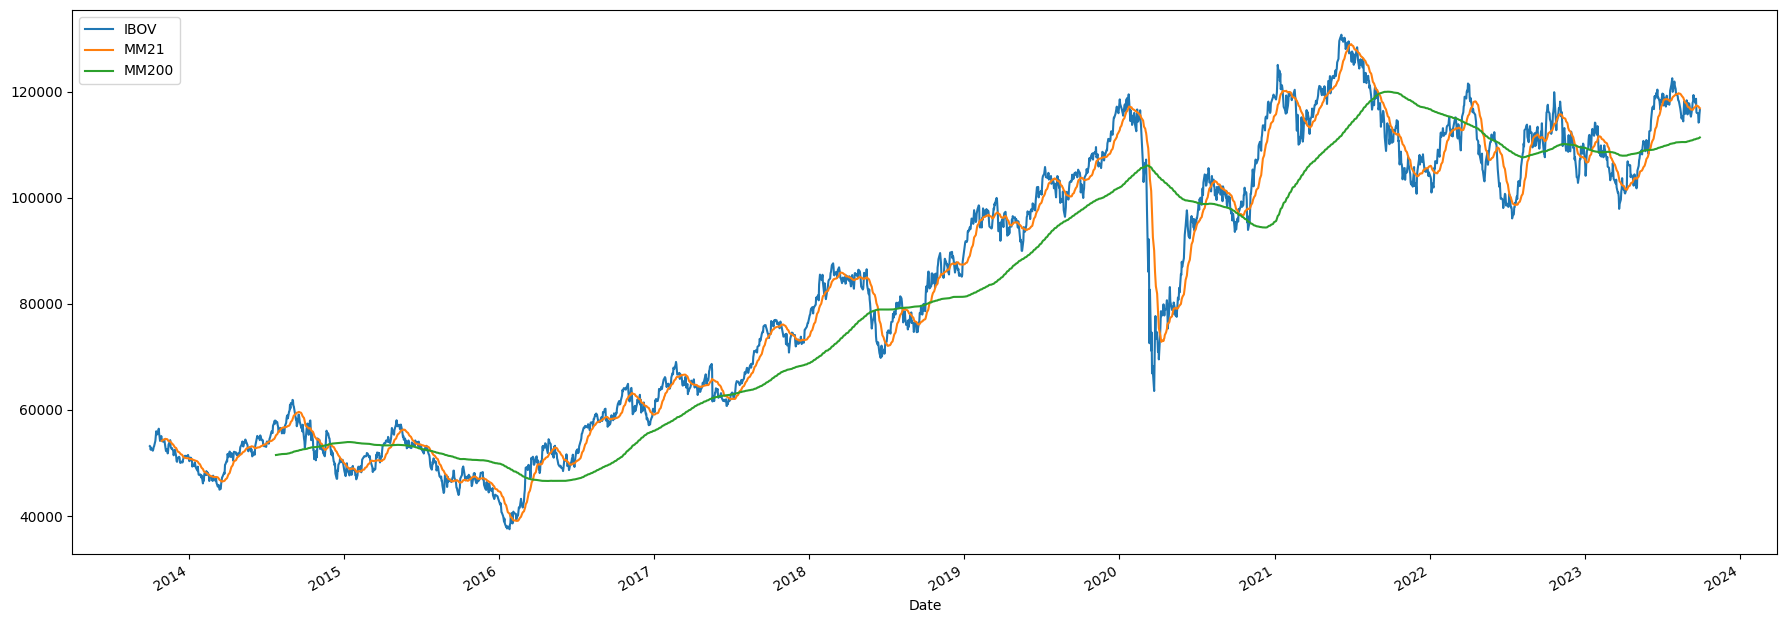

In [128]:
ibov["Close"].plot(figsize=(22,8), label="IBOV")
#  aplica uma função de janela deslizante. calculada uma média móvel 21 dias. Isso significa que para cada ponto no conjunto de dados, é considerada uma janela de 21 dias (incluindo o ponto atual e os 20 dias anteriores)
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

# 1.2 Normalizaçao -  ibov_itub4

Ação bancária  ITUB4

verificação de Volumetria

In [145]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa para ITUB4
# verificando  Volumetria dados full
ibov_itau_full = web.get_data_yahoo('itub4.SA')

[*********************100%%**********************]  1 of 1 completed


In [146]:
ibov_itau_full.isna().sum() #contar a quantidade de valores ausentes (ou NaN - "Not a Number"

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [147]:
print(ibov_itau_full.count)

<bound method DataFrame.count of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2000-12-21   2.815505   2.988535   2.815174   2.960552   1.704020     74224
2000-12-22   2.930748   2.930748   2.814843   2.832229   1.630160     23312
2000-12-25   2.832229   2.832229   2.832229   2.832229   1.630160         0
2000-12-26   2.816664   2.834712   2.790006   2.831401   1.629684      7851
2000-12-27   2.881074   2.927437   2.831401   2.927437   1.684961     26996
...               ...        ...        ...        ...        ...       ...
2023-10-26  27.200001  27.820000  27.090000  27.709999  27.691763  28766600
2023-10-27  27.840000  27.900000  27.190001  27.299999  27.282034  30176000
2023-10-30  27.490000  27.490000  26.990000  27.080000  27.062180  15110200
2023-10-31  27.080000  27.180000  26.660000  26.820000  26.802349  25392800
2023-11-01  26.900000  27.340000  26.860001  27.180000 

[*********************100%%**********************]  1 of 1 completed
Primeira data no gráfico: 2000-12-21 00:00:00
Última data no gráfico: 2023-11-01 00:00:00


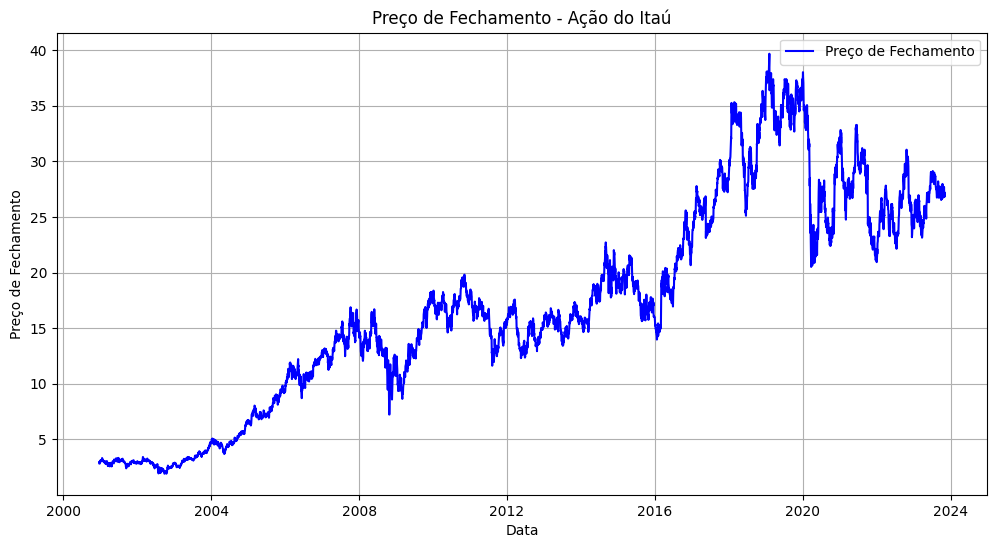

In [148]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar os dados da ação do Itaú (itub4.SA)
ibov_itau_full = yf.download('ITUB4.SA')

# Obter a primeira e a última data
primeira_data = ibov_itau_full.index[0]
ultima_data = ibov_itau_full.index[-1]

# Criar um gráfico com a coluna "Close" em relação à data
plt.figure(figsize=(12, 6))
plt.plot(ibov_itau_full.index, ibov_itau_full['Close'], label='Preço de Fechamento', color='blue')
plt.title('Preço de Fechamento - Ação do Itaú')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)

# Imprimir a primeira e a última data
print("Primeira data no gráfico:", primeira_data)
print("Última data no gráfico:", ultima_data)

# Mostrar o gráfico
plt.show()


In [149]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa para ITUB4
# data de. comercializaçao  # 5 anos # start='2013-10-01', end='2023-10-01')
ibov_itub4 = web.get_data_yahoo('itub4.SA', start='2013-10-01', end='2023-10-01')

[*********************100%%**********************]  1 of 1 completed


In [150]:
ibov_itau_full.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [155]:
print(ibov_itub4 .count)

<bound method DataFrame.count of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-10-01  15.787628  15.962935  15.507137  15.902829  10.307065  18343442
2013-10-02  15.852742  16.008015  15.817680  15.837716  10.264859  16081408
2013-10-03  15.857751  15.932882  15.752566  15.877786  10.290833  13297887
2013-10-04  15.827698  16.038067  15.742549  15.902829  10.307065  11438148
2013-10-07  15.867768  15.992987  15.727523  15.832707  10.261613  12555389
...               ...        ...        ...        ...        ...       ...
2023-09-25  26.940001  27.190001  26.930000  27.000000  26.964729  14178000
2023-09-26  26.969999  27.000000  26.580000  26.600000  26.565250  24245200
2023-09-27  26.809999  26.920000  26.360001  26.549999  26.515314  22994100
2023-09-28  26.530001  27.379999  26.450001  27.250000  27.214403  28652900
2023-09-29  27.500000  27.570000  27.020000  27.209999 

[*********************100%%**********************]  1 of 1 completed
Primeira data: 2013-10-01 00:00:00
Última data: 2023-09-29 00:00:00


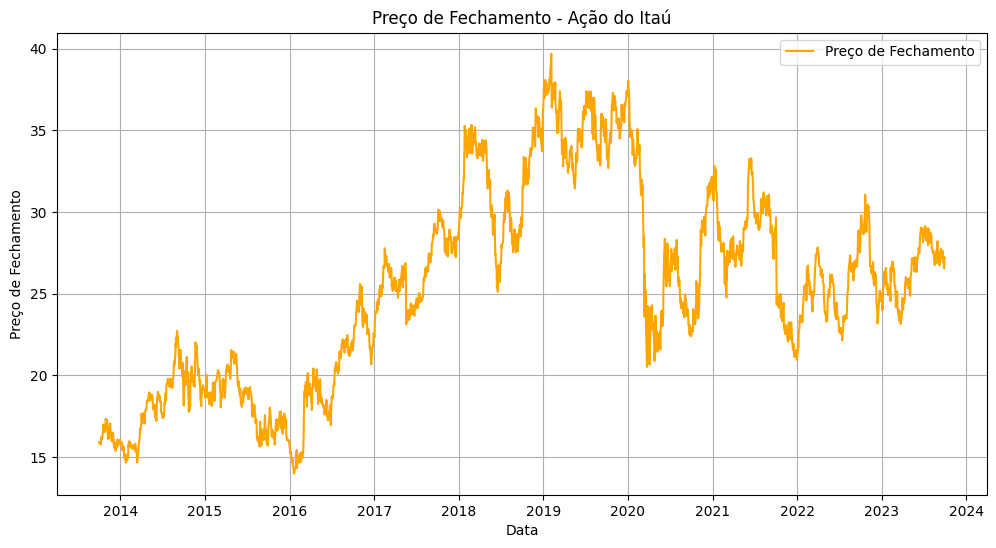

In [153]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar os dados da ação do Itaú (itub4.SA) para o período específico
ibov_itub4 = yf.download('ITUB4.SA', start='2013-10-01', end='2023-10-01')

# Obter a primeira e a última data no conjunto de dados
primeira_data = ibov_itub4.index[0]
ultima_data = ibov_itub4.index[-1]

# Criar um gráfico com a coluna "Close" em relação à data em laranja
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4.index, ibov_itub4['Close'], label='Preço de Fechamento', color='orange')
plt.title('Preço de Fechamento - Ação do Itaú')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)

# Imprimir a primeira e a última data
print(f"Primeira data: {primeira_data}")
print(f"Última data: {ultima_data}")

# Mostrar o gráfico
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


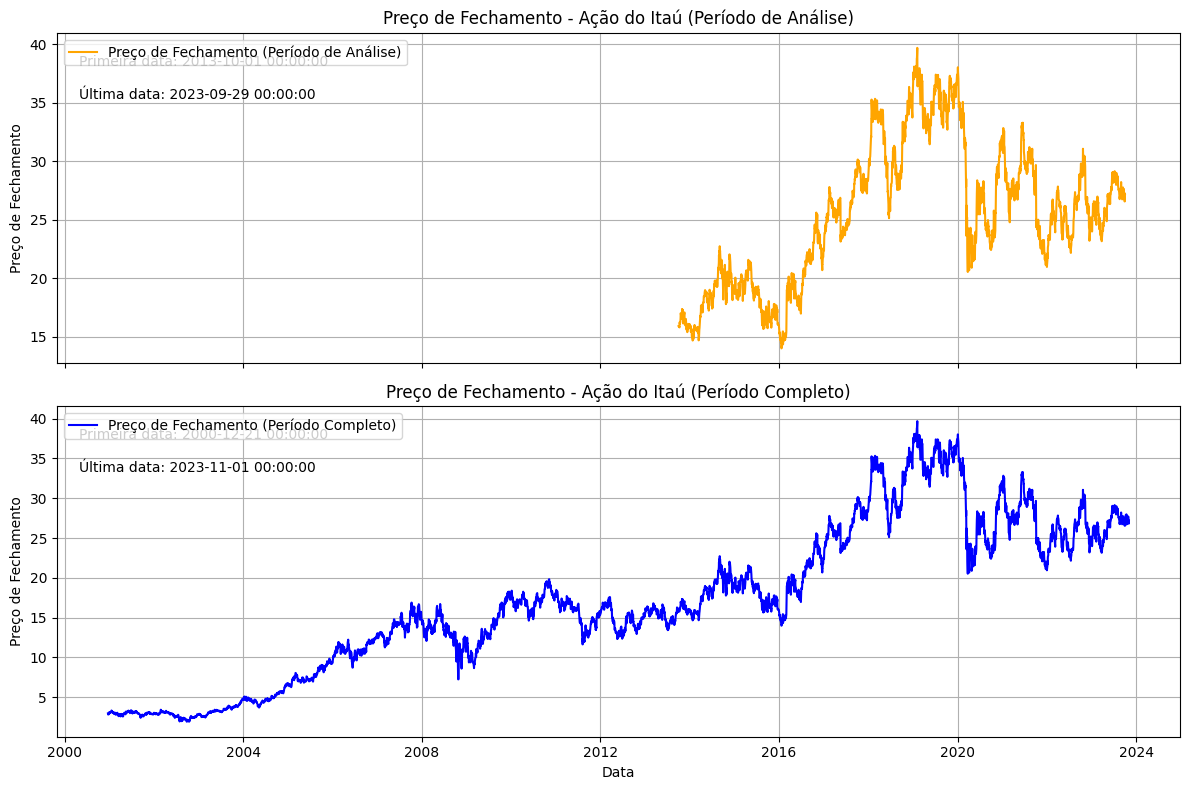

In [154]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar os dados da ação do Itaú (itub4.SA) no período específico
ibov_itub4 = yf.download('ITUB4.SA', start='2013-10-01', end='2023-10-01')

# Baixar os dados da ação do Itaú (itub4.SA) para o período completo
ibov_itau_full = yf.download('ITUB4.SA')

# Obter a primeira e a última data do período específico
primeira_data_period = ibov_itub4.index[0]
ultima_data_period = ibov_itub4.index[-1]

# Obter a primeira e a última data do período completo
primeira_data_full = ibov_itau_full.index[0]
ultima_data_full = ibov_itau_full.index[-1]

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# Plotar o gráfico do período específico em laranja no primeiro subplot
ax1.plot(ibov_itub4.index, ibov_itub4['Close'], label='Preço de Fechamento (Período de Análise)', color='orange')
ax1.set_title('Preço de Fechamento - Ação do Itaú (Período de Análise)')
ax1.set_ylabel('Preço de Fechamento')
ax1.legend()
ax1.grid(True)

# Plotar o gráfico do período completo em azul no segundo subplot
ax2.plot(ibov_itau_full.index, ibov_itau_full['Close'], label='Preço de Fechamento (Período Completo)', color='blue')
ax2.set_title('Preço de Fechamento - Ação do Itaú (Período Completo)')
ax2.set_xlabel('Data')
ax2.set_ylabel('Preço de Fechamento')
ax2.legend()
ax2.grid(True)

# Imprimir as primeiras e últimas datas em cada subplot
ax1.text(0.02, 0.9, f"Primeira data: {primeira_data_period}", transform=ax1.transAxes, fontsize=10, color='black')
ax1.text(0.02, 0.8, f"Última data: {ultima_data_period}", transform=ax1.transAxes, fontsize=10, color='black')
ax2.text(0.02, 0.9, f"Primeira data: {primeira_data_full}", transform=ax2.transAxes, fontsize=10, color='black')
ax2.text(0.02, 0.8, f"Última data: {ultima_data_full}", transform=ax2.transAxes, fontsize=10, color='black')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Mostrar a figura
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Volumetria (Período de Análise):
Date
2013-10-01    18343442
2013-10-02    16081408
2013-10-03    13297887
2013-10-04    11438148
2013-10-07    12555389
                ...   
2023-09-25    14178000
2023-09-26    24245200
2023-09-27    22994100
2023-09-28    28652900
2023-09-29    17625200
Name: Volume, Length: 2485, dtype: int64
Total da Volumetria (Período de Análise): 66931895385
Volumetria (Período Completo):
Date
2000-12-21       74224
2000-12-22       23312
2000-12-25           0
2000-12-26        7851
2000-12-27       26996
                ...   
2023-10-26    28766600
2023-10-27    30176000
2023-10-30    15110200
2023-10-31    25392800
2023-11-01    26217000
Name: Volume, Length: 5735, dtype: int64
Total da Volumetria (Período Completo): 251654608427


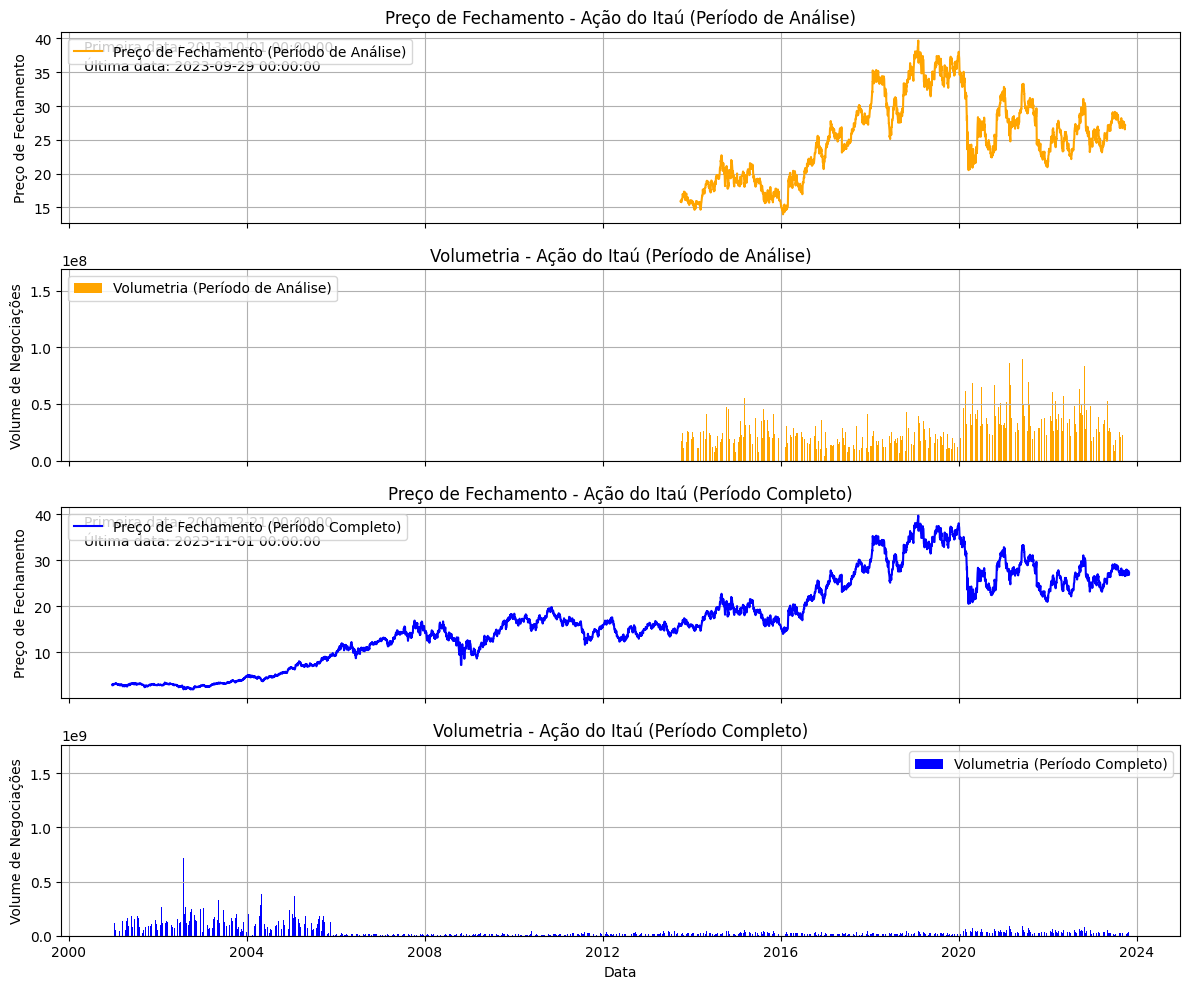

In [164]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar os dados da ação do Itaú (itub4.SA) no período específico
ibov_itub4 = yf.download('ITUB4.SA', start='2013-10-01', end='2023-10-01')

# Baixar os dados da ação do Itaú (itub4.SA) para o período completo
ibov_itau_full = yf.download('ITUB4.SA')

# Obter a primeira e a última data do período específico
primeira_data_period = ibov_itub4.index[0]
ultima_data_period = ibov_itub4.index[-1]

# Obter a primeira e a última data do período completo
primeira_data_full = ibov_itau_full.index[0]
ultima_data_full = ibov_itau_full.index[-1]

# Calcular a volumetria (volume) para ambos os períodos
volumetria_period = ibov_itub4['Volume']
volumetria_full = ibov_itau_full['Volume']

# Calcular o total da volumetria para ambos os DataFrames
total_volumetria_period = volumetria_period.sum()
total_volumetria_full = volumetria_full.sum()

# Criar uma figura com dois subplots
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(12, 10)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(12, 10))
# Plotar o gráfico do preço de fechamento do período de análise
ax1.plot(ibov_itub4.index, ibov_itub4['Close'], label='Preço de Fechamento (Período de Análise)', color='orange')
ax1.set_title('Preço de Fechamento - Ação do Itaú (Período de Análise)')
ax1.set_ylabel('Preço de Fechamento')
ax1.legend()
ax1.grid(True)

# Plotar o gráfico do volume de negociações do período de análise
ax2.bar(ibov_itub4.index, volumetria_period, label='Volumetria (Período de Análise)', color='orange')
ax2.set_title('Volumetria - Ação do Itaú (Período de Análise)')
ax2.set_ylabel('Volume de Negociações')
ax2.legend()
ax2.grid(True)

# Plotar o gráfico do preço de fechamento do período completo
ax3.plot(ibov_itau_full.index, ibov_itau_full['Close'], label='Preço de Fechamento (Período Completo)', color='blue')
ax3.set_title('Preço de Fechamento - Ação do Itaú (Período Completo)')
ax3.set_ylabel('Preço de Fechamento')
ax3.legend()
ax3.grid(True)

# Plotar o gráfico do volume de negociações do período completo
ax4.bar(ibov_itau_full.index, volumetria_full, label='Volumetria (Período Completo)', color='blue')
ax4.set_title('Volumetria - Ação do Itaú (Período Completo)')
ax4.set_xlabel('Data')
ax4.set_ylabel('Volume de Negociações')
ax4.legend()
ax4.grid(True)

# Imprimir as primeiras e últimas datas em cada subplot
ax1.text(0.02, 0.9, f"Primeira data: {primeira_data_period}", transform=ax1.transAxes, fontsize=10, color='black')
ax1.text(0.02, 0.8, f"Última data: {ultima_data_period}", transform=ax1.transAxes, fontsize=10, color='black')
ax3.text(0.02, 0.9, f"Primeira data: {primeira_data_full}", transform=ax3.transAxes, fontsize=10, color='black')
ax3.text(0.02, 0.8, f"Última data: {ultima_data_full}", transform=ax3.transAxes, fontsize=10, color='black')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Imprimir a volumetria e o total da volumetria
print("Volumetria (Período de Análise):")
print(volumetria_period)
print("Total da Volumetria (Período de Análise):", total_volumetria_period)

print("Volumetria (Período Completo):")
print(volumetria_full)
print("Total da Volumetria (Período Completo):", total_volumetria_full)

# Mostrar a figura
plt.show()


#  1.3 Análise de queda

In [166]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa para ITUB4
# data de. comercializaçao  # 10 anos # start='2013-10-01', end='2023-10-01')
ibov_itub4 = web.get_data_yahoo('itub4.SA', start='2013-10-01', end='2023-10-01')

[*********************100%%**********************]  1 of 1 completed


In [167]:
ibov_itub4.head() #datas antigas

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-10-01  15.787628  15.962935  15.507137  15.902829  10.307055  18343442
2013-10-02  15.852742  16.008015  15.817680  15.837716  10.264862  16081408
2013-10-03  15.857751  15.932882  15.752566  15.877786  10.290823  13297887
2013-10-04  15.827698  16.038067  15.742549  15.902829  10.307055  11438148
2013-10-07  15.867768  15.992987  15.727523  15.832707  10.261617  12555389

In [168]:
ibov_itub4.tail() #recente

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-09-25  26.940001  27.190001  26.930000  27.000000  26.964729  14178000
2023-09-26  26.969999  27.000000  26.580000  26.600000  26.565250  24245200
2023-09-27  26.809999  26.920000  26.360001  26.549999  26.515314  22994100
2023-09-28  26.530001  27.379999  26.450001  27.250000  27.214403  28652900
2023-09-29  27.500000  27.570000  27.020000  27.209999  27.174454  17625200

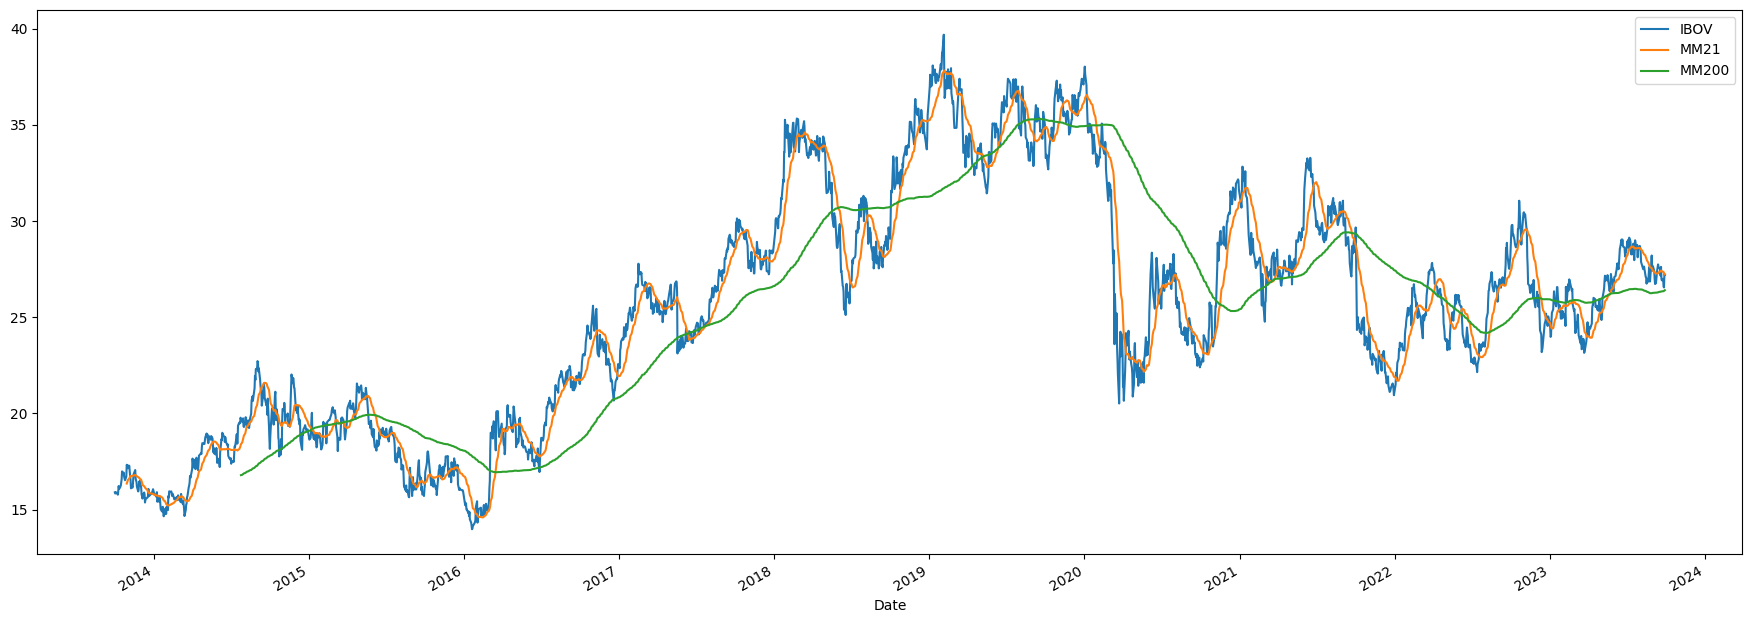

In [169]:
ibov_itub4["Close"].plot(figsize=(22,8), label="IBOV")
#  aplica uma função de janela deslizante. calculada uma média móvel 21 dias.
#Isso significa que para cada ponto no conjunto de dados,
#é considerada uma janela de 21 dias (incluindo o ponto atual e os 20 dias anteriores)
ibov_itub4["Close"].rolling(21).mean().plot(label="MM21")
ibov_itub4["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [170]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np
import pandas_datareader.data as web
 # Importando o YFinance e sobrescrevendo os métodos do pandas_datareader
import yfinance as yf
yf.pdr_override()
ibov= web.get_data_yahoo('^BVSP')



ibov_itub4 = web.get_data_yahoo('itub4.SA', start='2013-10-01', end='2023-10-01')
# Calcular as variações percentuais diárias
ibov_itub4["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4["Daily Change"].min()
start_date = ibov_itub4[ibov_itub4["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4[ibov_itub4["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4.index.min()).days
x2 = (end_date - ibov_itub4.index.min()).days

# Preços correspondentes
y1 = ibov_itub4.loc[start_date]["Close"]
y2 = ibov_itub4.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.147796785290768
Período de queda: 2020-03-12 00:00:00 a 2020-03-12 00:00:00
Função de primeiro grau que representa a queda: y = 0.00501274434610657 x + 11.800000190734863


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np
import pandas_datareader.data as web
 # Importando o YFinance e sobrescrevendo os métodos do pandas_datareader
import yfinance as yf
yf.pdr_override()
ibov= web.get_data_yahoo('^BVSP')



ibov_itub4 = web.get_data_yahoo('itub4.SA', start='2013-10-01', end='2023-10-01')
# Calcular as variações percentuais diárias
ibov_itub4["Daily Change"] = ibov["Close"].pct_change()

top_drawdowns = []

# Encontrar as 5 maiores quedas percentuais
for i in range(5):
    max_drawdown = ibov_itub4["Daily Change"].nsmallest(i + 1).iloc[-1]
    day_of_max_drawdown = ibov_itub4[ibov_itub4["Daily Change"] == max_drawdown].index[0]

    if day_of_max_drawdown in ibov_itub4.index:
        x1 = (day_of_max_drawdown - ibov_itub4.index.min()).days
        y1 = ibov_itub4.loc[day_of_max_drawdown]["Open"]
        y2 = ibov_itub4.loc[day_of_max_drawdown]["Close"]
        coefficients = np.polyfit([x1, x1], [y1, y2], 1)
        m = coefficients[0]
        b = coefficients[1]

        drawdown_info = {
            "Queda": i + 1,
            "Maior queda percentual": max_drawdown,
            "Dia da maior queda": day_of_max_drawdown,
            "Valor de abertura durante a queda": y1,
            "Valor de fechamento durante a queda": y2,
            "Função de primeiro grau que representa a queda": f"y = {m}x + {b}"
        }

        top_drawdowns.append(drawdown_info)

        # Remover o dia da maior queda para encontrar a próxima
        ibov_itub4 = ibov_itub4[ibov_itub4.index != day_of_max_drawdown]
    else:
        print(f"Não foi possível encontrar informações para a queda {i + 1}")

# Exibir informações das 5 maiores quedas
for drawdown_info in top_drawdowns:
    print(f"=== Queda {drawdown_info['Queda']} ===")
    print("Maior queda percentual:", drawdown_info["Maior queda percentual"])
    print("Dia da maior queda:", drawdown_info["Dia da maior queda"])
    print("Valor de abertura durante a queda:", drawdown_info["Valor de abertura durante a queda"])
    print("Valor de fechamento durante a queda:", drawdown_info["Valor de fechamento durante a queda"])
    print("Função de primeiro grau que representa a queda:", drawdown_info["Função de primeiro grau que representa a queda"])
    print("")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
=== Queda 1 ===
Maior queda percentual: -0.147796785290768
Dia da maior queda: 2020-03-12 00:00:00
Valor de abertura durante a queda: 23.200000762939453
Valor de fechamento durante a queda: 23.600000381469727
Função de primeiro grau que representa a queda: y = 0.004970263503017118x + 11.700000286102295

=== Queda 2 ===
Maior queda percentual: -0.12173842056389483
Dia da maior queda: 2020-03-09 00:00:00
Valor de abertura durante a queda: 28.0
Valor de fechamento durante a queda: 27.799999237060547
Função de primeiro grau que representa a queda: y = 0.0059336451762080555x + 13.949999809265131

=== Queda 3 ===
Maior queda percentual: -0.08799230085875032
Dia da maior queda: 2017-05-18 00:00:00
Valor de abertura durante a queda: 21.133333206176758
Valor de fechamento durante a queda: 23.1200008392334
Função de primeiro grau que representa a queda: y = 0.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ibov_itub4["Close"].plot(figsize=(22,8), label="IBOV")
#  aplica uma função de janela deslizante. calculada uma média móvel 21 dias.
#Isso significa que para cada ponto no conjunto de dados,
#é considerada uma janela de 21 dias (incluindo o ponto atual e os 20 dias anteriores)
ibov_itub4["Close"].rolling(21).mean().plot(label="MM21")
ibov_itub4["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

# 2. Derivadas (2)


In [ ]:
#encontrando a maior  queda do periodo essa não é derivada - para comparaçao na sessao
import pandas as pd
import numpy as np
import pandas_datareader.data as web
 # Importando o YFinance e sobrescrevendo os métodos do pandas_datareader
import yfinance as yf
yf.pdr_override()
ibov= web.get_data_yahoo('^BVSP')



ibov_itub4 = web.get_data_yahoo('itub4.SA', start='2013-10-01', end='2023-10-01')
# Calcular as variações percentuais diárias
ibov_itub4["Daily Change"] = ibov["Close"].pct_change()

top_drawdowns = []

# Encontrar as 5 maiores quedas percentuais
for i in range(5):
    max_drawdown = ibov_itub4["Daily Change"].nsmallest(i + 1).iloc[-1]
    day_of_max_drawdown = ibov_itub4[ibov_itub4["Daily Change"] == max_drawdown].index[0]

    if day_of_max_drawdown in ibov_itub4.index:
        x1 = (day_of_max_drawdown - ibov_itub4.index.min()).days
        y1 = ibov_itub4.loc[day_of_max_drawdown]["Open"]
        y2 = ibov_itub4.loc[day_of_max_drawdown]["Close"]
        coefficients = np.polyfit([x1, x1], [y1, y2], 1)
        m = coefficients[0]
        b = coefficients[1]

        drawdown_info = {
            "Queda": i + 1,
            "Maior queda percentual": max_drawdown,
            "Dia da maior queda": day_of_max_drawdown,
            "Valor de abertura durante a queda": y1,
            "Valor de fechamento durante a queda": y2,
            "Função de primeiro grau que representa a queda": f"y = {m}x + {b}"
        }

        top_drawdowns.append(drawdown_info)

        # Remover o dia da maior queda para encontrar a próxima
        ibov_itub4 = ibov_itub4[ibov_itub4.index != day_of_max_drawdown]
    else:
        print(f"Não foi possível encontrar informações para a queda {i + 1}")

# Exibir informações das 5 maiores quedas
for drawdown_info in top_drawdowns:
    print(f"=== Queda {drawdown_info['Queda']} ===")
    print("Maior queda percentual:", drawdown_info["Maior queda percentual"])
    print("Dia da maior queda:", drawdown_info["Dia da maior queda"])
    print("Valor de abertura durante a queda:", drawdown_info["Valor de abertura durante a queda"])
    print("Valor de fechamento durante a queda:", drawdown_info["Valor de fechamento durante a queda"])
    print("Função de primeiro grau que representa a queda:", drawdown_info["Função de primeiro grau que representa a queda"])
    print("")


In [25]:
import pandas as pd. diferença do data frame nao rodar
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar os dados da ação do Itaú (itub4.SA) para o período específico
ibov_itub4_D12 = yf.download('ITUB4.SA', start='2013-10-01', end='2023-10-01')
# Calcular as variações percentuais diárias
ibov_itub4["Daily Change"] = ibov_itub4["Close"].pct_change()

# Calcular a derivada dos preços de fechamento em relação ao tempo
ibov_itub4["Derivative"] = ibov_itub4["Close"].diff()

top_drawdowns = []

# Encontrar as 5 maiores quedas percentuais
for i in range(5):
    max_drawdown = ibov_itub4["Daily Change"].nsmallest(i + 1).iloc[-1]
    day_of_max_drawdown = ibov_itub4[ibov_itub4["Daily Change"] == max_drawdown].index[0]

    if day_of_max_drawdown in ibov_itub4.index:
        x1 = (day_of_max_drawdown - ibov_itub4.index.min()).days
        y1 = ibov_itub4.loc[day_of_max_drawdown]["Open"]
        y2 = ibov_itub4.loc[day_of_max_drawdown]["Close"]
        coefficients = np.polyfit([x1, x1], [y1, y2], 1)
        m = coefficients[0]
        b = coefficients[1]

        drawdown_info = {
            "Queda": i + 1,
            "Maior queda percentual": max_drawdown,
            "Dia da maior queda": day_of_max_drawdown,
            "Valor de abertura durante a queda": y1,
            "Valor de fechamento durante a queda": y2,
            "Função de primeiro grau que representa a queda": f"y = {m}x + {b}"
        }

        top_drawdowns.append(drawdown_info)

        # Remover o dia da maior queda para encontrar a próxima
        ibov_itub412 = ibov_itub4[ibov_itub4.index != day_of_max_drawdown]
    else:
        print(f"Não foi possível encontrar informações para a queda {i + 1}")

# Exibir informações das 5 maiores quedas
for drawdown_info in top_drawdowns:
    print(f"=== Queda {drawdown_info['Queda']} ===")
    print("Maior queda percentual:", drawdown_info["Maior queda percentual"])
    print("Dia da maior queda:", drawdown_info["Dia da maior queda"])
    print("Valor de abertura durante a queda:", drawdown_info["Valor de abertura durante a queda"])
    print("Valor de fechamento durante a queda:", drawdown_info["Valor de fechamento durante a queda"])
    print("Função de primeiro grau que representa a queda:", drawdown_info["Função de primeiro grau que representa a queda"])
    print("")


SyntaxError: ignored

# Origem diferente - oldNova seção

Derivadas dos preços diarios

In [22]:

import pandas as pd
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar os dados da ação do Itaú (itub4.SA) para o período específico
ibov_itub4_D = yf.download('ITUB4.SA', start='2013-10-01', end='2023-10-01')
# Calcular as variações percentuais diárias


# Calcule as diferenças dos preços de fechamento diários
ibov_itub4_D["PriceDiff"] = ibov_itub4_D["Close"].diff()

# Calcule a derivada (taxa de variação) dividindo as diferenças pelo índice de tempo (dias)
ibov_itub4_D["Derivative"] = ibov_itub4_D["PriceDiff"] / ibov_itub4_D.index.to_series().diff().dt.days

# 'Derivative' agora conterá as derivadas dos preços diários em relação ao tempo


[*********************100%%**********************]  1 of 1 completed


In [23]:
ibov_itub4_D.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2013-10-01  15.787628  15.962935  15.507137  15.902829  10.307065  18343442   
2013-10-02  15.852742  16.008015  15.817680  15.837716  10.264858  16081408   
2013-10-03  15.857751  15.932882  15.752566  15.877786  10.290826  13297887   
2013-10-04  15.827698  16.038067  15.742549  15.902829  10.307065  11438148   
2013-10-07  15.867768  15.992987  15.727523  15.832707  10.261606  12555389   

            PriceDiff  Derivative  
Date                               
2013-10-01        NaN         NaN  
2013-10-02  -0.065113   -0.065113  
2013-10-03   0.040070    0.040070  
2013-10-04   0.025043    0.025043  
2013-10-07  -0.070122   -0.023374

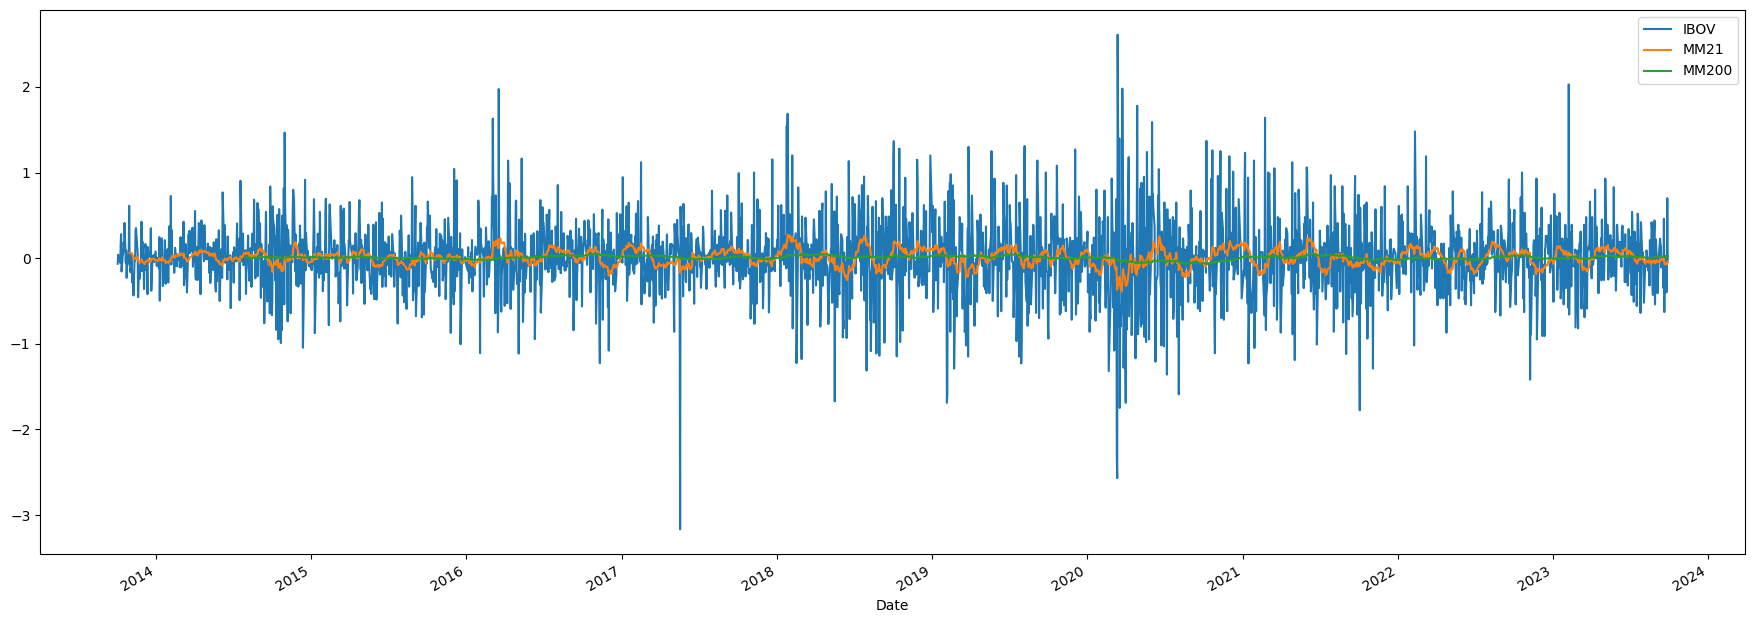

In [26]:
ibov_itub4_D["Derivative"].plot(figsize=(22,8), label="IBOV")
#  aplica uma função de janela deslizante. calculada uma média móvel 21 dias.
#Isso significa que para cada ponto no conjunto de dados,
#é considerada uma janela de 21 dias (incluindo o ponto atual e os 20 dias anteriores)
ibov_itub4_D["Derivative"].rolling(21).mean().plot(label="MM21")
ibov_itub4_D["Derivative"].rolling(200).mean().plot(label="MM200")
plt.legend()

0gráfico que exibe três séries de dados:

1. A série original `ibov_itub4_D["Derivative"]`, que representa a derivada dos preços de fechamento em relação ao tempo.

2. A média móvel de 21 dias da série original, representada por `ibov_itub4_D["Derivative"].rolling(21).mean()`. Isso suaviza a série original e destaca tendências de curto prazo.

3. A média móvel de 200 dias da série original, representada por `ibov_itub4_D["Derivative"].rolling(200).mean()`. Isso suaviza ainda mais a série e ajuda a destacar tendências de longo prazo.



O gráfico resultante ajudará a visualizar como as mudanças nas derivadas dos preços de fechamento se comportam ao longo do tempo,
 juntamente com as tendências de curto e longo prazo. Isso é útil para a análise de séries temporais  e demonstra padrao de comportamento

In [ ]:
apos serie temporal definida criando Janela de interpolaçao  , intervalos da carta controle

# 2.1 plot da derivada

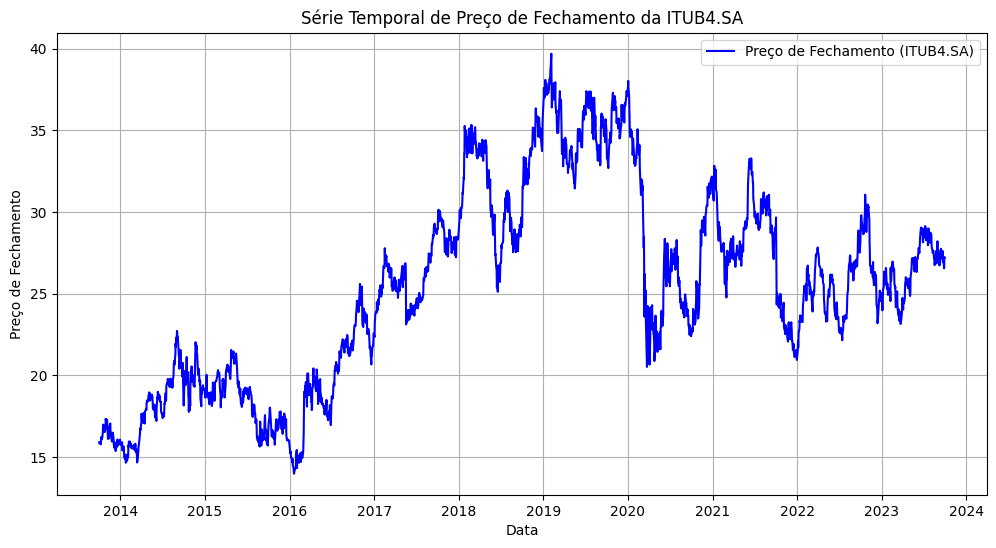

In [27]:
#serie temporal
import matplotlib.pyplot as plt

# Extrair a coluna de preços de fechamento da série temporal
close_prices = ibov_itub4_D["Close"]

# Plotar o gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Preço de Fechamento (ITUB4.SA)', color='b')
plt.title('Série Temporal de Preço de Fechamento da ITUB4.SA')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()


Lembrando a conceitualização da série temporal é uma coleção de observações ou medidas registradas em intervalos de tempo regulares, como dias, meses, anos, horas, minutos, segundos, etc. Essas observações são coletadas em sequência, em ordem cronológica, permitindo o acompanhamento de como uma determinada variável ou fenômeno evolui ao longo do tempo. o data set ibov_itub4_D retrada a variavel "preço de fechamento " ( CLose ) no tempo

# 2.2  Analise da serie temporal - caracteristicas  

In [ ]:
analise da serie temporal

[*********************100%%**********************]  1 of 1 completed


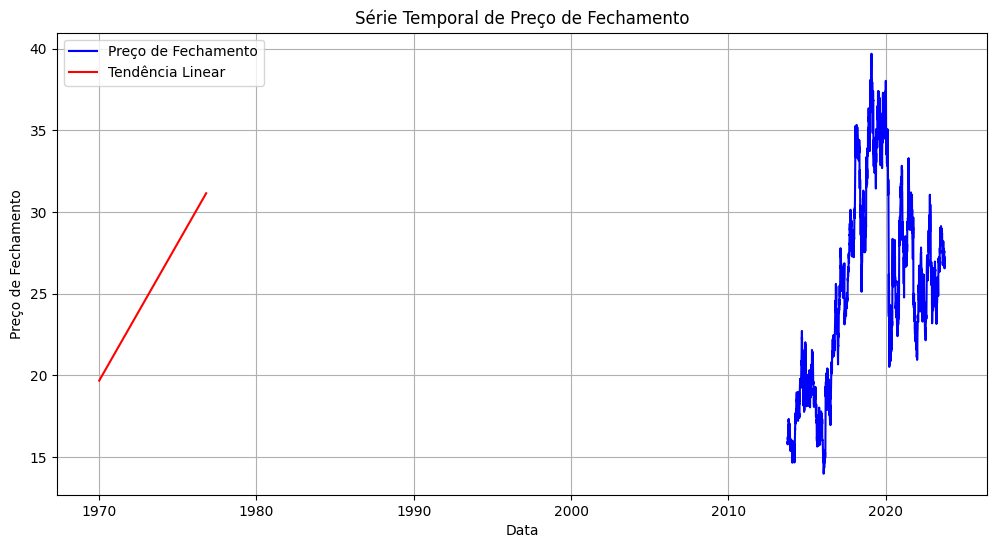

In [29]:
# tendencia
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Baixar os dados da ação do Itaú (ITUB4.SA) para o período específico
ibov_itub4_D = yf.download('ITUB4.SA', start='2013-10-01', end='2023-10-01')

# Plotar o gráfico de preços de fechamento ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4['Close'], label='Preço de Fechamento', color='blue')
plt.title('Série Temporal de Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')

# Calcular a tendência linear
x = np.arange(len(ibov_itub4))
y = ibov_itub4['Close']
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)
plt.plot(x, trend_line(x), label='Tendência Linear', color='red')

plt.legend()
plt.grid(True)
plt.show()


código ajusta uma linha de tendência linear (uma reta) aos preços de fechamento da ação do Itaú e a plota no mesmo gráfico. A direção geral da linha de tendência indica a tendência da série. Se a linha estiver inclinada para cima, indica uma tendência de alta

In [33]:
#novos importes
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

[*********************100%%**********************]  1 of 1 completed
ADF Statistic: -2.252469578491316
p-value: 0.18775573759312086
A série não é estacionária. Realize a diferenciação.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2485
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1882.719
Date:                            Fri, 03 Nov 2023   AIC                           3775.439
Time:                                    02:13:13   BIC                           3804.503
Sample:                                         0   HQIC                          3785.997
                                           - 2485                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1162      0.328     -0.354      0.723      -0.759       0.527
ma.L1          0.0710      0.331   

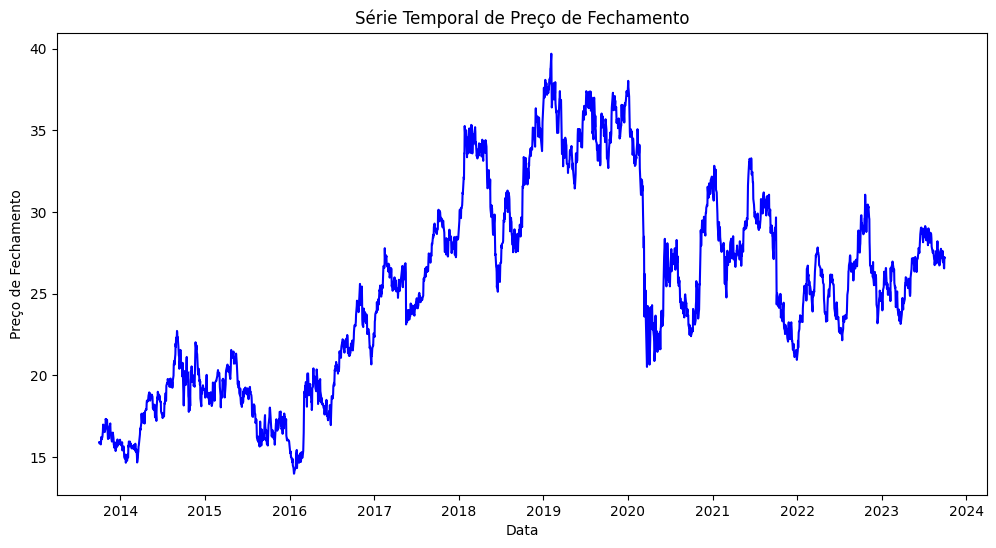

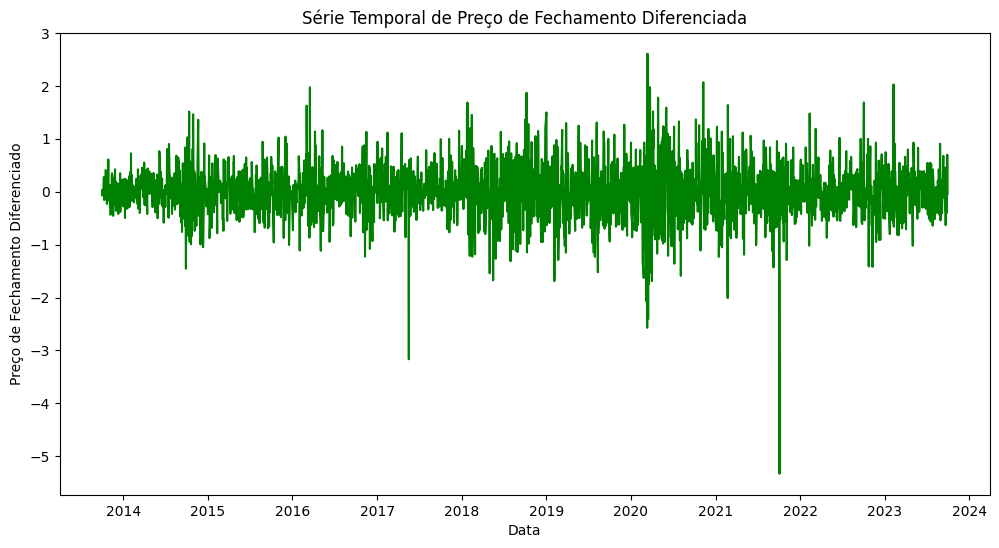

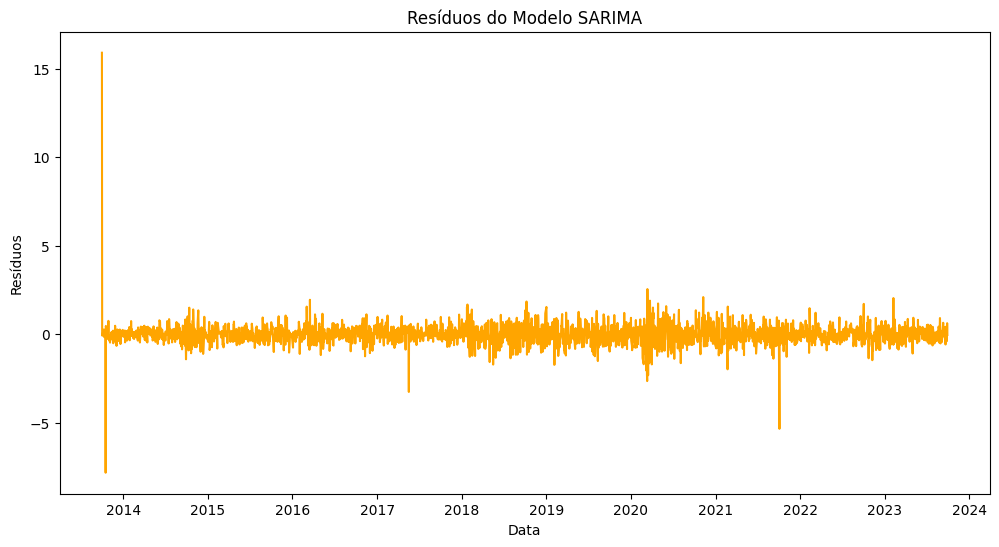

In [34]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Baixar os dados da ação do Itaú (ITUB4.SA) para o período específico
ibov_itub4 = yf.download('ITUB4.SA', start='2013-10-01', end='2023-10-01')

# Plotar o gráfico de preços de fechamento ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4['Close'], label='Preço de Fechamento', color='blue')
plt.title('Série Temporal de Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')

# Verificar a estacionaridade da série
result = adfuller(ibov_itub4['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] <= 0.05:
    print('A série é estacionária.')
else:
    print('A série não é estacionária. Realize a diferenciação.')

# Realizar a diferenciação para tornar a série estacionária
d = 1
ibov_itub4_diff = ibov_itub4['Close'].diff(d).dropna()

# Plotar a série diferenciada
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4_diff, label='Preço de Fechamento (Diferenciado)', color='green')
plt.title('Série Temporal de Preço de Fechamento Diferenciada')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Diferenciado')

# Ajustar o modelo SARIMA
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12  # Valores de p, d, q, P, D, Q e s para o modelo SARIMA
model = SARIMAX(ibov_itub4['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Print das estatísticas do modelo
print(model_fit.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
plt.plot(model_fit.resid, label='Resíduos', color='orange')
plt.title('Resíduos do Modelo SARIMA')
plt.xlabel('Data')
plt.ylabel('Resíduos')

plt.show()


Valores da estatística ADF (Augmented Dickey-Fuller) e do p-valor são usados para testar a estacionaridade de uma série temporal. A hipótese nula do teste ADF é que a série temporal não é estacionária, e a hipótese alternativa é que a série é estacionária.

A estatística ADF é uma medida que reflete o quanto a série é não estacionária. Quanto mais negativo for o valor da estatística ADF, mais forte é a evidência contra a hipótese nula de não estacionariedade. No entanto, o valor exato não nos diz muito sem considerar o p-valor.

O p-valor é a probabilidade de obter um valor da estatística Um p-valor baixo (menor que 0,05) sugere que a série é estacionária, pois a probabilidade de obter a estatística ADF observada sob a hipótese nula é baixa.

No ITUB4 o valor da estatística ADF é -2.252469578491316 e o p-valor é 0.18775573759312086.
O p-valor é maior que 0,05, o que significa que não há evidência estatística significativa para rejeitar a hipótese nula de não estacionariedade. Portanto, a série não é considerada estacionária. = SERIE NAO ESTACIONARIA

Para tornar a série estacionária, PASOS DA DIFERENCIAÇÃO  --->  teste ADF novamente para verificar se a série diferenciada é estacionária.

ADF Statistic (Diferenciado): -10.282132383616995
p-value (Diferenciado): 3.7556140040634676e-18
A série diferenciada é estacionária.


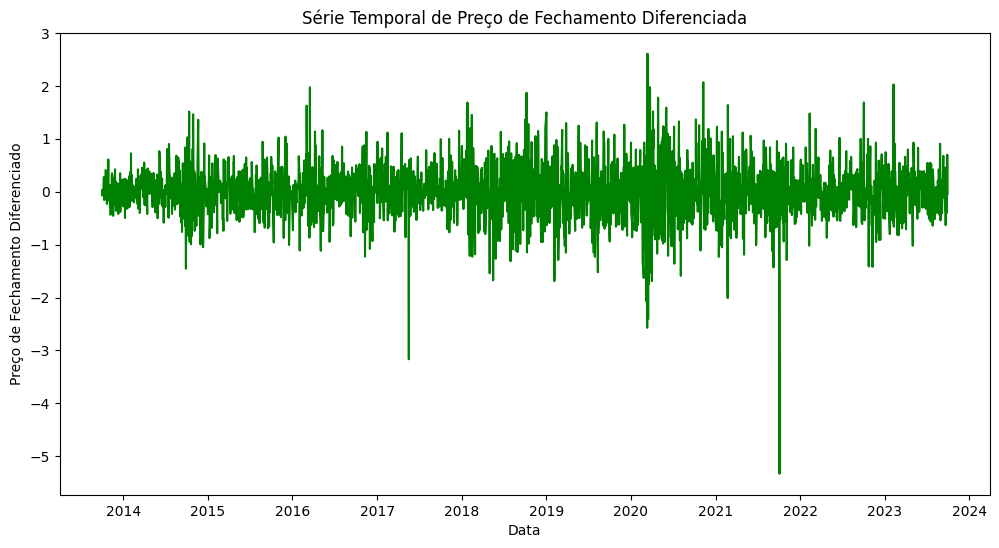

In [36]:
# Realizar a diferenciação para tornar a série estacionária
d = 1
ibov_itub4_diff = ibov_itub4_D['Close'].diff(d).dropna()

# Plotar a série diferenciada
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4_diff, label='Preço de Fechamento (Diferenciado)', color='green')
plt.title('Série Temporal de Preço de Fechamento Diferenciada')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Diferenciado')

# Verificar a estacionaridade da série diferenciada
result_diff = adfuller(ibov_itub4_diff)
print(f'ADF Statistic (Diferenciado): {result_diff[0]}')
print(f'p-value (Diferenciado): {result_diff[1]}')
if result_diff[1] <= 0.05:
    print('A série diferenciada é estacionária.')
else:
    print('A série diferenciada não é estacionária.')



 A série diferenciada não  armazena explicitamente em uma variável.
  A função ibov_itub4_D['Close'].diff(d).dropna()  calcula a série diferenciada e a exibe, mas não a armazena em uma variável nomeada. para  recalcular o teste ADF, é preciso  armazenar a série diferenciada em uma variável.

 teste ADF "adfuller "
  pela funçao https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html modelagem SARIMAX


A série temporal se torna estacionária após passar por um processo de diferenciação. Na diferenciaçao é calculando a variação entre os pontos de dados consecutivos da série temporal original. O valor "d = 1" indica o calculo da primeira diferença.
A diferenciação é feita para eliminar tendências e sazonalidades da série. Quando uma série se torna estacionária,  significa que as propriedades estatísticas da série (média, variância, autocorrelação) permanecem constantes ao longo do tempo, tornando-a mais adequada para a modelagem de séries temporais como o modelo ARIMA ou SARIMA.

In [ ]:

import pandas as pd

# Suponha que 'df' seja o DataFrame com as colunas 'Date' (datas) e 'Close' (preços de fechamento diários)


#como há uma ordenaçao em classificaçao pela data , separo o data set,
# Calcule as diferenças dos preços de fechamento diários
ibov_itub4["PriceDiff"] = ibov_itub4["Close"].diff()

# Calcule a derivada (taxa de variação) dividindo as diferenças pelos intervalos de tempo (dias)
ibov_itub4["Derivative"] = ibov_itub4["PriceDiff"] / ibov_itub4.index.to_series().diff().dt.days

# 'Derivative' agora conterá as derivadas dos preços diários em relação ao tempo


perio da massa de dados :


In [ ]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4["Daily Change"].min()
start_date = ibov_itub4[ibov_itub4["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4[ibov_itub4["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4.index.min()).days
x2 = (end_date - ibov_itub4.index.min()).days

# Preços correspondentes
y1 = ibov_itub4.loc[start_date]["Close"]
y2 = ibov_itub4.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.147796785290768
Período de queda: 2020-03-12 00:00:00 a 2020-03-12 00:00:00
Função de primeiro grau que representa a queda: y = 0.0016806722960739015 x + 11.800000190734858


In [ ]:
ibov_itub4_1 = web.get_data_yahoo('itub4.SA', start='2020-04-12', end='2023-06-21')



[*********************100%%**********************]  1 of 1 completed


In [ ]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_1["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_1["Daily Change"].min()
start_date = ibov_itub4_1[ibov_itub4_1["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_1[ibov_itub4_1["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_1.index.min()).days
x2 = (end_date - ibov_itub4_1.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_1.loc[start_date]["Close"]
y2 = ibov_itub4_1.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.05449775959233372
Período de queda: 2020-04-24 00:00:00 a 2020-04-24 00:00:00
Função de primeiro grau que representa a queda: y = 0.9490908709439363 x + 10.439999580383295


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ibov_itub4_2 = web.get_data_yahoo('itub4.SA', start='2020-04-25', end='2023-06-21')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_2["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_2["Daily Change"].min()
start_date = ibov_itub4_2[ibov_itub4_2["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_2[ibov_itub4_2["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_2.index.min()).days
x2 = (end_date - ibov_itub4_2.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_2.loc[start_date]["Close"]
y2 = ibov_itub4_2.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.05120086233031296
Período de queda: 2021-02-22 00:00:00 a 2021-02-22 00:00:00
Função de primeiro grau que representa a queda: y = 0.04254152925307568 x + 12.805000305175778


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ibov_itub4_2 = web.get_data_yahoo('itub4.SA', start='2021-02-23', end='2023-06-21')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_2["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_2["Daily Change"].min()
start_date = ibov_itub4_2[ibov_itub4_2["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_2[ibov_itub4_2["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_2.index.min()).days
x2 = (end_date - ibov_itub4_2.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_2.loc[start_date]["Close"]
y2 = ibov_itub4_2.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.03984305828023815
Período de queda: 2021-03-08 00:00:00 a 2021-03-08 00:00:00
Função de primeiro grau que representa a queda: y = 1.0288461538461537 x + 13.374999999999991


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ibov_itub4_3 = web.get_data_yahoo('itub4.SA', start='2021-03-09', end='2023-06-21')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_3["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_3["Daily Change"].min()
start_date = ibov_itub4_3[ibov_itub4_3["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_3[ibov_itub4_3["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_3.index.min()).days
x2 = (end_date - ibov_itub4_3.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_3.loc[start_date]["Close"]
y2 = ibov_itub4_3.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.03780468146840987
Período de queda: 2021-09-08 00:00:00 a 2021-09-08 00:00:00
Função de primeiro grau que representa a queda: y = 0.07846994347911063 x + 14.359999656677239


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ibov_itub4_4 = web.get_data_yahoo('itub4.SA', start='2021-09-10', end='2023-06-21')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_4["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_4["Daily Change"].min()
start_date = ibov_itub4_4[ibov_itub4_4["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_4[ibov_itub4_4["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_4.index.min()).days
x2 = (end_date - ibov_itub4_4.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_4.loc[start_date]["Close"]
y2 = ibov_itub4_4.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.03390006710077398
Período de queda: 2021-11-26 00:00:00 a 2021-11-26 00:00:00
Função de primeiro grau que representa a queda: y = 0.1481168796489765 x + 11.404999732971186


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ibov_itub4_5 = web.get_data_yahoo('itub4.SA', start='2021-11-27', end='2023-06-21')

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


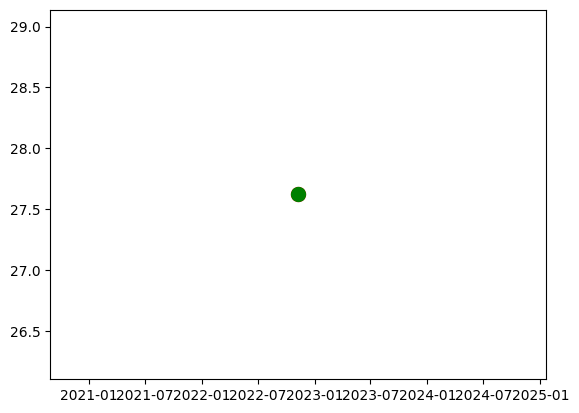

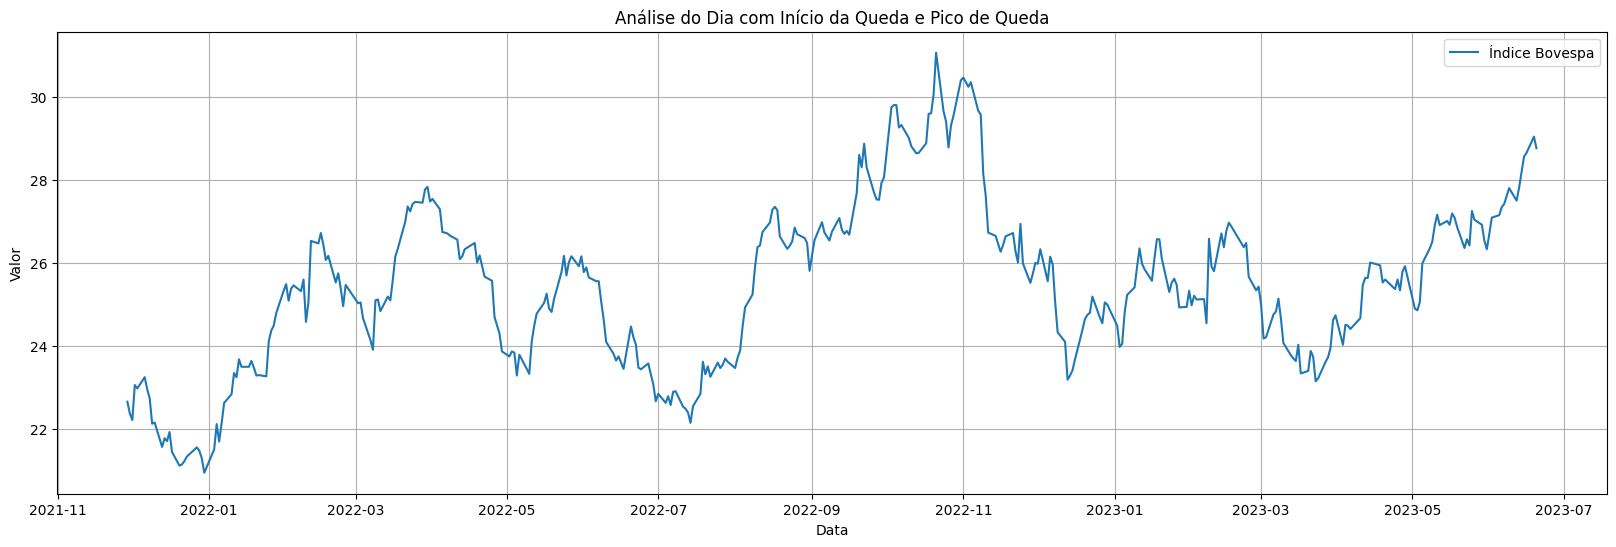

Maior queda percentual: -0.03350061630568757
Período de queda: 2022-11-10 00:00:00 a 2022-11-10 00:00:00
Função de primeiro grau que representa a queda: y = 0.03991329601045288 x + 13.81000041961669


In [ ]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calcular as variações percentuais diárias
ibov_itub4_5["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_5["Daily Change"].min()
start_date = ibov_itub4_5[ibov_itub4_5["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_5[ibov_itub4_5["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_5.index.min()).days
x2 = (end_date - ibov_itub4_5.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_5.loc[start_date]["Close"]
y2 = ibov_itub4_5.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

# Criar um array de valores x para a função de primeiro grau
x = np.array([x1, x2])

# Calcular os valores correspondentes de y usando a função de primeiro grau
y = m * x + b

# Encontrar o ponto exato (data e valor) do início da queda
data_inicio_queda = ibov_itub4_5[ibov_itub4_5["Daily Change"] == max_drawdown].index[0]
valor_inicio_queda = ibov_itub4_5.loc[data_inicio_queda]["Close"]

# Encontrar o ponto exato (data e valor) de maior queda
ponto_maior_queda = ibov_itub4_5[ibov_itub4_5["Daily Change"] == max_drawdown]

# Criar um gráfico do dia analisado com destaque para o início da queda e pico de queda
plt.scatter(data_inicio_queda, valor_inicio_queda, color='red', label='Início da Queda', s=100, marker='o')
plt.scatter(ponto_maior_queda.index[0], ponto_maior_queda["Close"].values[0], color='green', label='Pico de Queda', s=100, marker='o')

# Criar um gráfico do dia analisado com destaque para o início da queda e pico de queda
plt.figure(figsize=(20, 6))
plt.plot(ibov_itub4_5.index, ibov_itub4_5["Close"], label="Índice Bovespa")
plt.title("Análise do Dia com Início da Queda e Pico de Queda")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Text(2022-11-10 00:00:00, 27.6200008392334, '(2022-11-10 00:00:00, 27.62)')

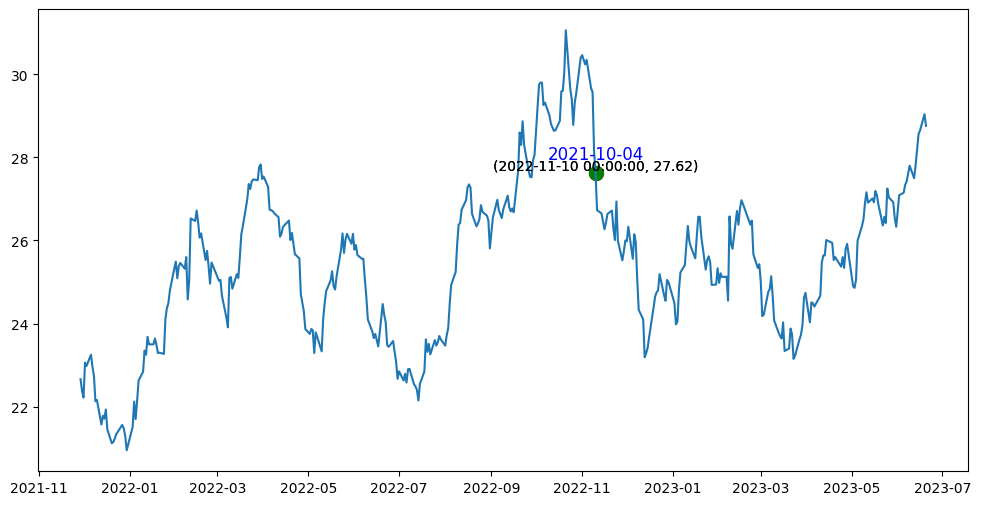

In [ ]:

# Filtrar o DataFrame para exibir somente o período de queda
ibov_periodo_queda = ibov_itub4_5[(ibov_itub4_5.index >= data_inicio_queda) & (ibov_itub4_5.index <= ponto_maior_queda.index[0])]

# Criar um gráfico do período de queda com destaque para o início da queda e o pico de queda
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4_5.index, ibov_itub4_5["Close"], label="Índice Bovespa")
plt.plot(ibov_periodo_queda.index, ibov_periodo_queda["Close"], label="Período de Queda", color='orange')
plt.scatter(data_inicio_queda, valor_inicio_queda, color='red', label='Início da Queda', s=100, marker='o')
plt.scatter(ponto_maior_queda.index[0], ponto_maior_queda["Close"].values[0], color='green', label='Pico de Queda', s=100, marker='o')

# Adicionar anotação para o dia '2021-10-04'
plt.annotate('2021-10-04', (data_inicio_queda, valor_inicio_queda), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='blue')

# Adicionar rótulo para os pontos
plt.text(data_inicio_queda, valor_inicio_queda, f'({data_inicio_queda}, {valor_inicio_queda:.2f})', ha='center', va='bottom')
plt.text(ponto_maior_queda.index[0], ponto_maior_queda["Close"].values[0], f'({ponto_maior_queda.index[0]}, {ponto_maior_queda["Close"].values[0]:.2f})', ha='center', va='bottom')


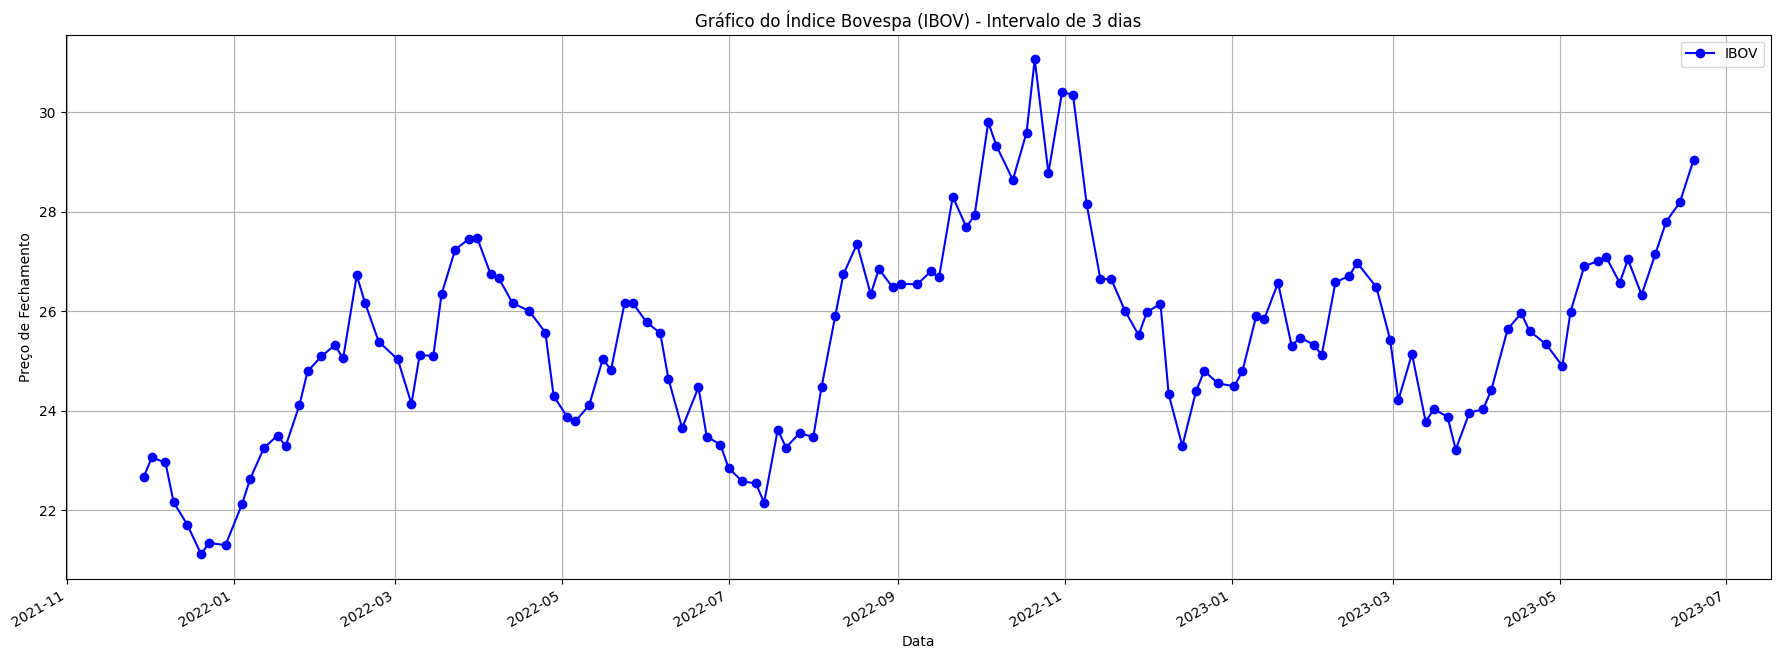

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você já tenha um DataFrame chamado "ibov" com os dados do índice Bovespa, incluindo a coluna "Close"

# Selecionar os dados a cada 3 dias
ibov_3_day_interval = ibov_itub4_5["Close"].iloc[::3]

# Plotar o gráfico
plt.figure(figsize=(22, 8))
ibov_3_day_interval.plot(marker='o', linestyle='-', color='b', label="IBOV")
plt.title("Gráfico do Índice Bovespa (IBOV) ")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.grid(True)
plt.show()

procurando outras açoes para comparar\

#carteira

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [ ]:

tickers = "BBDC4.SA, VALE3.SA, PRIO3.sa, itub4.sa "

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
carteira.dropna(inplace=True)
carteira

BBDC4.SA   ITUB4.SA   PRIO3.SA   VALE3.SA
Date                                                  
2018-10-29  16.176537  26.521410   2.294000  36.580734
2018-10-30  16.805229  27.299171   2.334000  37.111187
2018-10-31  16.587597  27.166786   2.380000  39.067677
2018-11-01  17.535460  27.555790   2.396000  39.611904
2018-11-05  17.912367  27.853745   2.360000  39.632568
...               ...        ...        ...        ...
2023-10-23  14.180000  26.990000  48.840000  62.560001
2023-10-24  14.180000  26.990000  48.849998  63.990002
2023-10-25  14.140000  27.040001  48.360001  63.930000
2023-10-26  14.500000  27.709999  48.000000  65.300003
2023-10-27  14.350000  27.299999  47.770000  67.570000

[1240 rows x 4 columns]

In [ ]:
#dropna() remover linhas ou colunas que contenham valores ausentes (NaN)
ibov.dropna(inplace=True)
ibov

Date
2018-10-29     83797.0
2018-10-30     86886.0
2018-10-31     87424.0
2018-11-01     88419.0
2018-11-05     89598.0
                ...   
2023-10-23    112785.0
2023-10-24    113762.0
2023-10-25    112830.0
2023-10-26    114777.0
2023-10-27    113301.0
Name: Adj Close, Length: 1240, dtype: float64

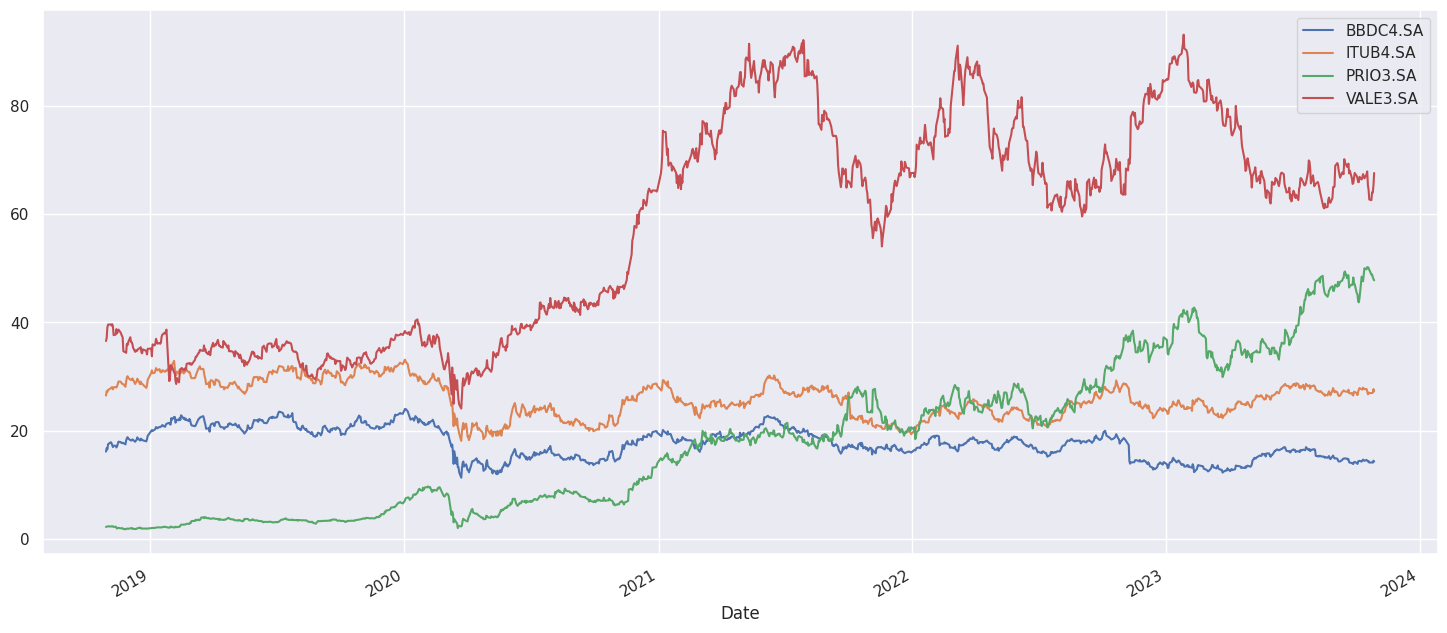

In [ ]:
sns.set()
carteira.plot(figsize=(18,8));


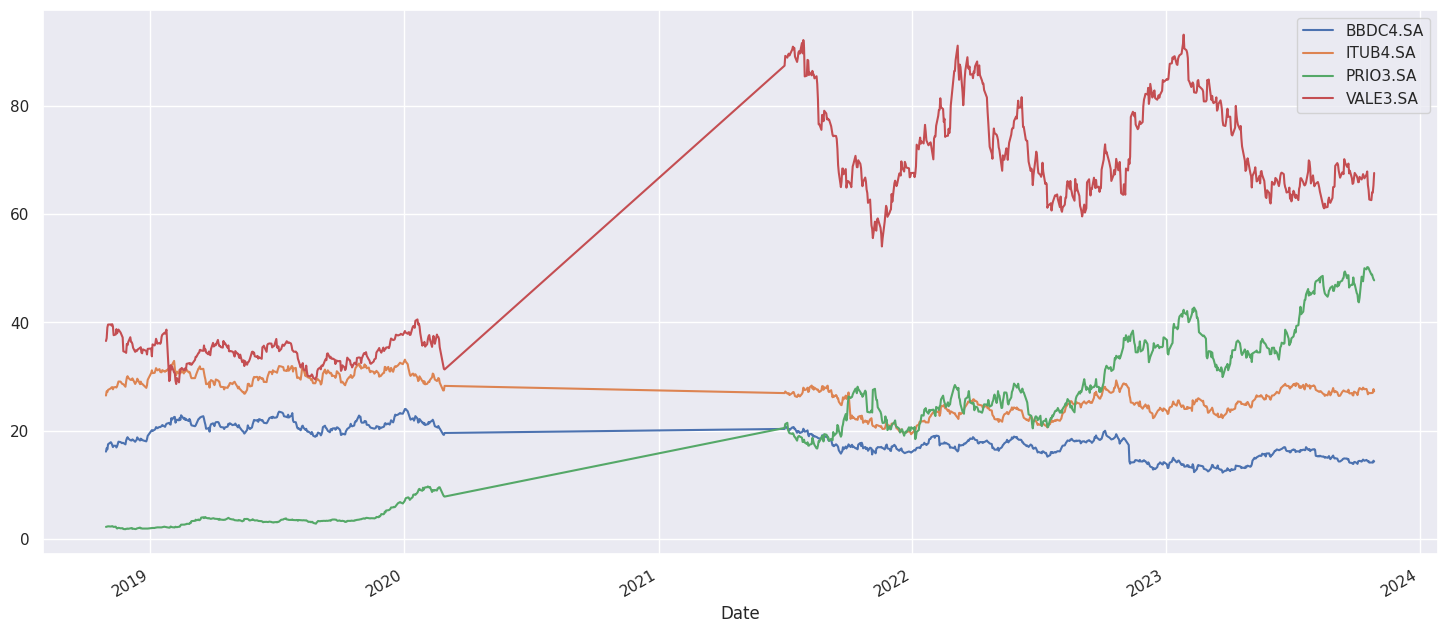

In [ ]:
import pandas as pd

# Supondo que "carteira" é o DataFrame com os dados financeiros

# Definir o período da pandemia
inicio_pandemia = pd.Timestamp('2020-03-01')
fim_pandemia = pd.Timestamp('2021-06-30')

# Filtrar os dados para remover o período da pandemia
carteira_sem_pandemia = carteira[(carteira.index < inicio_pandemia) | (carteira.index > fim_pandemia)]

# Agora você pode usar o DataFrame "carteira_sem_pandemia" para suas análises
sns.set()
carteira_sem_pandemia.plot(figsize=(18,8));

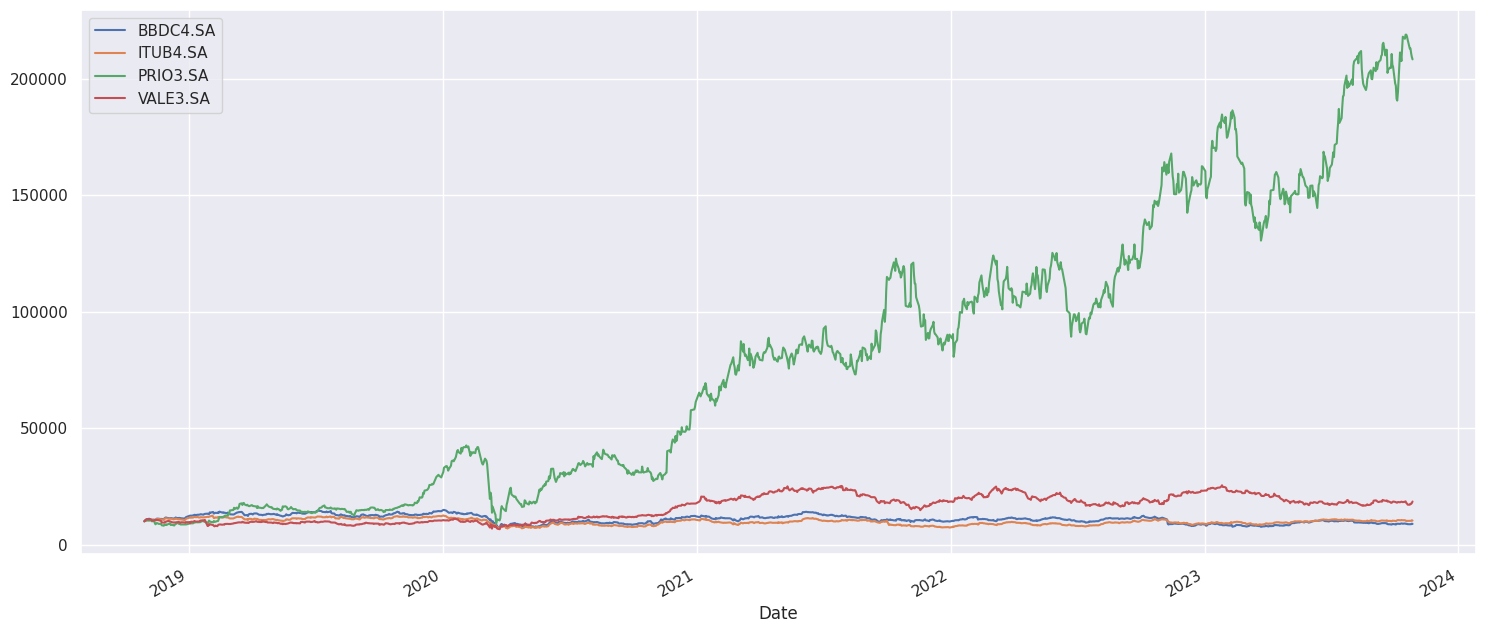

In [ ]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)
carteira_normalizada.plot(figsize=(18,8));

In [ ]:
acoes = "BBDC4.SA, VALE3.SA, PRIO3.sa, itub4.sa  ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']
retorno = dados_yahoo.pct_change()
retorno

[*********************100%%**********************]  4 of 4 completed


BBDC4.SA  ITUB4.SA  PRIO3.SA  VALE3.SA
Date                                              
2018-10-29       NaN       NaN       NaN       NaN
2018-10-30  0.038864  0.029326  0.017437  0.014501
2018-10-31 -0.012950 -0.004849  0.019709  0.052719
2018-11-01  0.057143  0.014319  0.006723  0.013931
2018-11-05  0.021494  0.010813 -0.015025  0.000522
...              ...       ...       ...       ...
2023-10-23  0.001412  0.001113 -0.017304 -0.001914
2023-10-24  0.000000  0.000000  0.000205  0.022858
2023-10-25 -0.002821  0.001853 -0.010031 -0.000938
2023-10-26  0.025460  0.024778 -0.007444  0.021430
2023-10-27 -0.010345 -0.014796 -0.004792  0.034763

[1240 rows x 4 columns]

In [ ]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado


BBDC4.SA  ITUB4.SA   PRIO3.SA  VALE3.SA
Date                                               
2018-10-29  1.000000  1.000000   1.000000  1.000000
2018-10-30  1.038864  1.029326   1.017437  1.014501
2018-10-31  1.025411  1.024335   1.037489  1.067985
2018-11-01  1.084006  1.039002   1.044464  1.082863
2018-11-05  1.107305  1.050237   1.028771  1.083428
...              ...       ...        ...       ...
2023-10-23  0.876578  1.017669  21.290323  1.710190
2023-10-24  0.876578  1.017669  21.294682  1.749282
2023-10-25  0.874106  1.019554  21.081082  1.747641
2023-10-26  0.896360  1.044817  20.924151  1.785093
2023-10-27  0.887087  1.029357  20.823889  1.847147

[1240 rows x 4 columns]

In [ ]:
#acoes1 = "ITSA4.SA ^BVSP"
#dados_yahoo = yf.download(tickets=tickets, period="5y")['Adj Close']
#retorno_itub4 = dados_yahoo.pct_change()
#retorno_itub4

#tickers1 = "ITSA4.SA "

#carteira = yf.download(tickers1, period="5y")["Adj Close"]

#ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-ihkrz2uk
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-ihkrz2uk
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75753 sha256=385c2d472c6db2a3acb47f91c999d7ff8194bfb2ff1bd958df11958911cbb0e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-n1uompe9/wheels/25/2f/dd/558b6be9405213c9f6fdb1c5a062028a4da70862268f4116e6
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39755 sha256=c995dc2df5edd8fea97979eb4f08db6c55a76ef3529c5df76d8f2ac9083928b4
  Stored in d

/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import yfinance as yf
yf.pdr_override()

In [ ]:
#bibliotecas
!pip install pandoc
import pandoc
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [ ]:
# '2000-12-21'#2018-10-29
ibov_itub4 = web.get_data_yahoo('itub4.SA', start='2018-10-29', end='2023-10-29')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# exc

#tickers = "ITUB4.SA "
#carteira = yf.download(tickers, period="5y")["Adj Close"]
#ibov = yf.download("^BVSP", period="5y")["Adj Close"]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


serie temporal

# Serie Temporal

[*********************100%%**********************]  1 of 1 completed


<ipython-input-6-33e7eeedf12a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub['Y(t)'] = itub['Close'].shift(1)


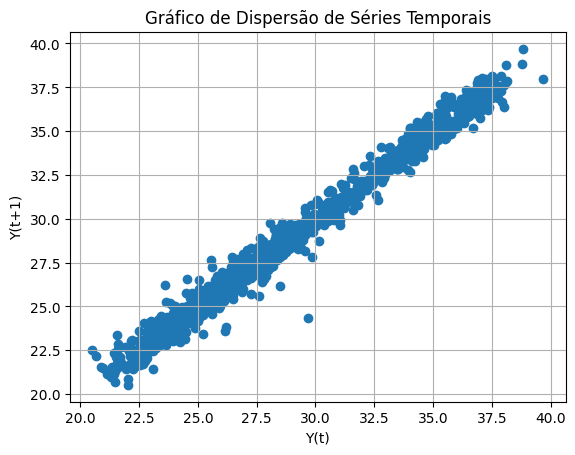

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baixar as cotações do Yahoo Finance para o ativo ITUB4.SA (5ano)
import yfinance as yf
itub = yf.download('ITUB4.SA', period='5y')

# Extrair a coluna "Close" (preço de fechamento)
itub = itub[['Close']]

# Criar uma coluna "Y(t)" com os valores de fechamento deslocados de 1 período
itub['Y(t)'] = itub['Close'].shift(1)

# Criar um gráfico de dispersão
plt.scatter(itub['Y(t)'], itub['Close'])
plt.xlabel('Y(t)')
plt.ylabel('Y(t+1)')
plt.title('Gráfico de Dispersão de Séries Temporais')
plt.grid(True)

# Exibir o gráfico
plt.show()
# Figura 19 – Gráfico de atraso. Fonte: Autor
#se observa uma linha diagonal, o que mostra um relacionamento entre
#as variáveis vizinhas, confirmando que nossos dados são uma série temporal.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-32-04cffc3a66cf>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_itub4_D['Y(t)'] = ibov_itub4_D['Close'].shift(1)


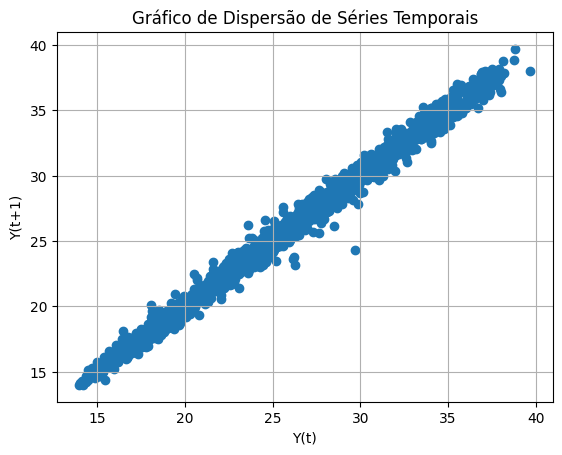

In [32]:
#D
import pandas as pd
import numpy as np
import pandas_datareader.data as web
 # Importando o YFinance e sobrescrevendo os métodos do pandas_datareader
import yfinance as yf
yf.pdr_override()
ibov= web.get_data_yahoo('^BVSP')



ibov_itub4_D = web.get_data_yahoo('itub4.SA', start='2013-10-01', end='2023-10-01')
# Calcular as variações percentuais diárias
ibov_itub4_D["Daily Change"] = ibov["Close"].pct_change()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baixar as cotações do Yahoo Finance para o ativo ITUB4.SA (5ano)


# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4_D = ibov_itub4_D[['Close']]

# Criar uma coluna "Y(t)" com os valores de fechamento deslocados de 1 período
ibov_itub4_D['Y(t)'] = ibov_itub4_D['Close'].shift(1)

# Criar um gráfico de dispersão
plt.scatter(ibov_itub4_D['Y(t)'], ibov_itub4_D['Close'])
plt.xlabel('Y(t)')
plt.ylabel('Y(t+1)')
plt.title('Gráfico de Dispersão de Séries Temporais')
plt.grid(True)

# Exibir o gráfico
plt.show()
# Figura –  REPRESENTAÇAO Gráfico de atraso. Fonte: A AutorA
#se observa uma linha diagonal, o que mostra um relacionamento entre
#as variáveis vizinhas, confirmando que nossos dados são uma série temporal.

[*********************100%%**********************]  1 of 1 completed


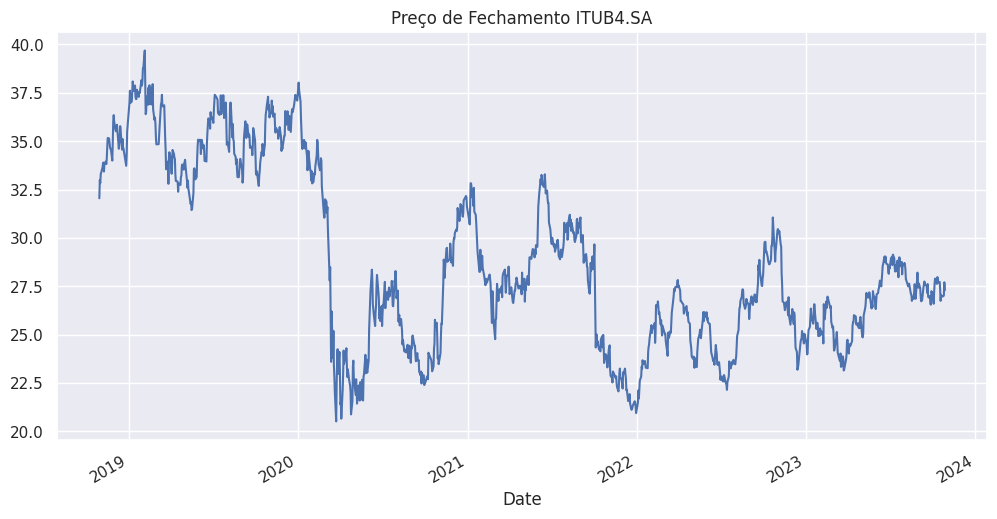

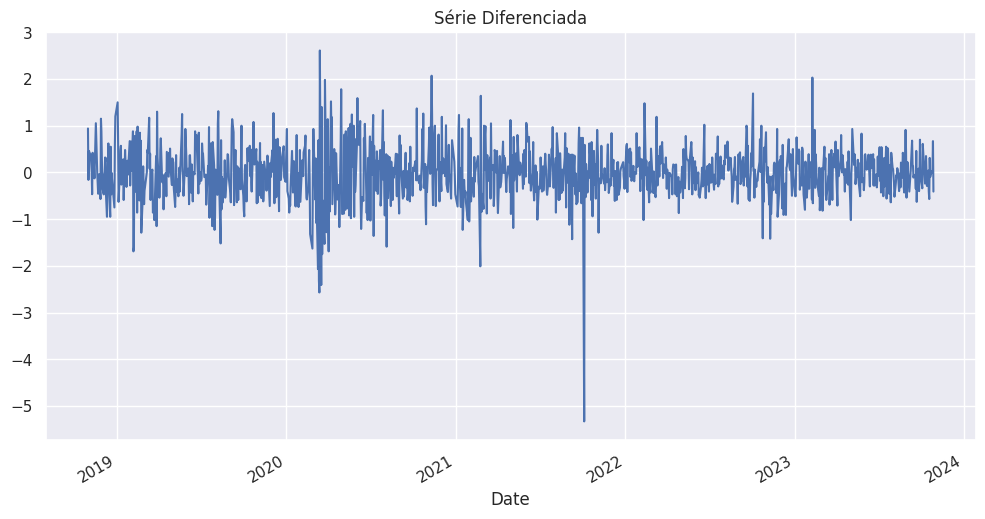

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1076.908
Date:                Sun, 29 Oct 2023   AIC                           2159.816
Time:                        01:49:16   BIC                           2175.182
Sample:                             0   HQIC                          2165.595
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2529      0.360     -0.702      0.483      -0.959       0.453
ma.L1          0.1986      0.366      0.542      0.588      -0.519       0.916
sigma2         0.3330      0.007     51.036      0.0

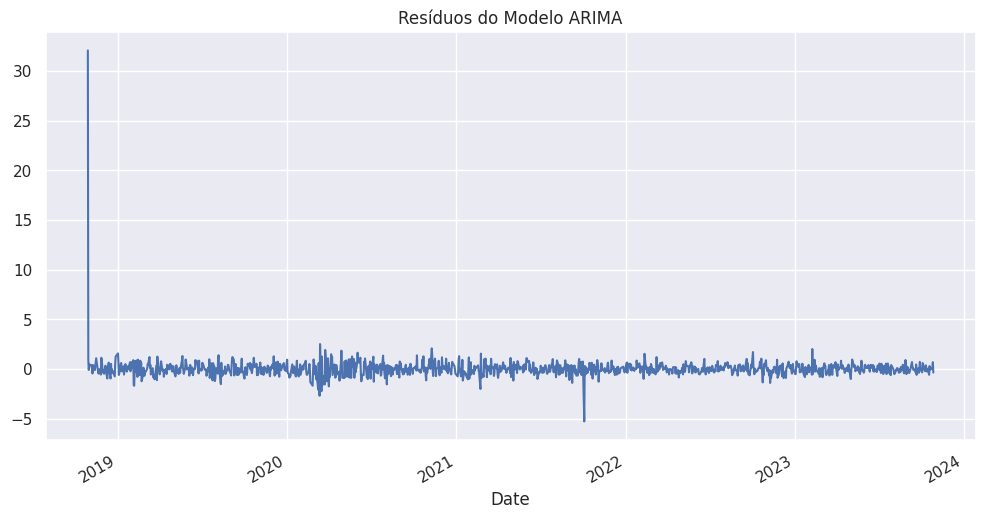

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: ignored

In [ ]:
#start='2000-12-21', end='2023-06-29'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Baixar as cotações do Yahoo Finance para o Índice Bovespa (ITUB4.SA)
import yfinance as yf
ibov_itub4 = yf.download('ITUB4.SA', start='2018-10-29', end='2023-10-29')
ibov_itub4.dropna(inplace=True)

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# Plotar os dados de fechamento
plt.figure(figsize=(12, 6))
ibov_itub4['Close'].plot(title='Preço de Fechamento ITUB4.SA')
plt.show()

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada')
plt.show()

# Ajustar o modelo ARIMA
order = (1, 1, 1)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar previsões com o modelo
#n_forecast = 30  # Número de períodos a serem previstos
#forecast, stderr, conf_int = results.forecast(steps=n_forecast)

###
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Suponha que você tenha seus dados em um DataFrame chamado 'data'
# Substitua os valores dos parâmetros adequadamente
p, d, q = 1, 1, 1  # Ordem do modelo ARIMA
P, D, Q, s = 1, 1, 1, 12  # Ordem do modelo sazonal ARIMA

# Ajuste do modelo SARIMA
model = sm.tsa.SARIMAX(ibov_itub4['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
# Realizar previsões com o modelo SARIMA
n_forecast = 30  # Número de períodos a serem previstos
forecast = results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Exibir as previsões
print(f"Previsões: {forecast_mean}")
print(f"Intervalos de confiança: \n{forecast_conf_int}")

#####


# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4.index, ibov_itub4['Close'], label='Observações')
#plt.plot(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast), label='Previsões', linestyle='--')
#plt.fill_between(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast) - stderr, np.append(ibov_itub4['Close'][-1], forecast) + stderr, color='gray', alpha=0.2, label='Incerteza')
plt.title('Previsões com Modelo ARIMA')
plt.legend()
plt.show()

forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')


#plt.plot(forecast_dates, forecast_mean, label='Previsões', linestyle='--')
#plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')



forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')


plt.plot(forecast_dates, forecast_mean, label='Previsões', linestyle='--')
#plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')

n_forecast = 30  # Número de períodos a serem previstos
forecast = results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()



plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')



In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1076.908
Date:                Sun, 29 Oct 2023   AIC                           2159.816
Time:                        01:52:49   BIC                           2175.182
Sample:                             0   HQIC                          2165.595
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2529      0.360     -0.702      0.483      -0.959       0.453
ma.L1          0.1986      0.366      0.542      0.588      -0.519       0.916
sigma2         0.3330      0.007     51.036      0.0

In [ ]:
import pandas as pd

# Crie um DataFrame a partir dos resultados do modelo
results_df = pd.DataFrame(results.summary().tables[1])

# Imprima o DataFrame
print(results_df)


        0           1          2          3       4          5          6
0                coef    std err          z   P>|z|     [0.025     0.975]
1   ar.L1     -0.2529      0.360     -0.702   0.483     -0.959      0.453
2   ma.L1      0.1986      0.366      0.542   0.588     -0.519      0.916
3  sigma2      0.3330      0.007     51.036   0.000      0.320      0.346


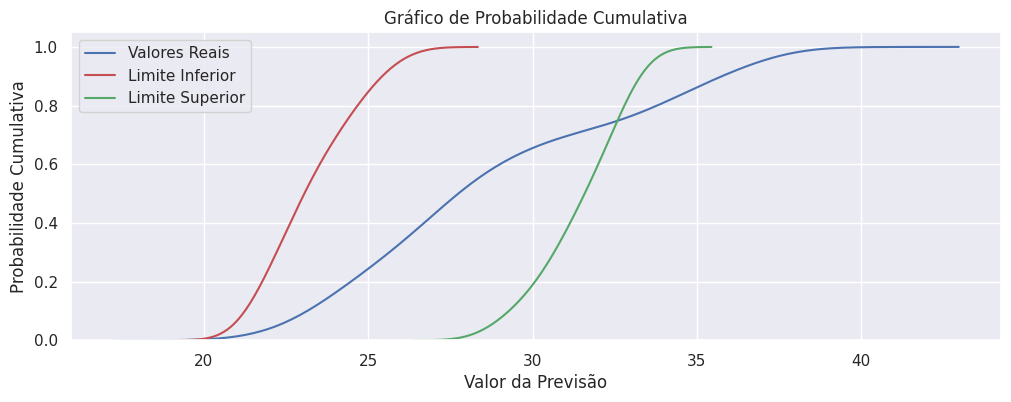

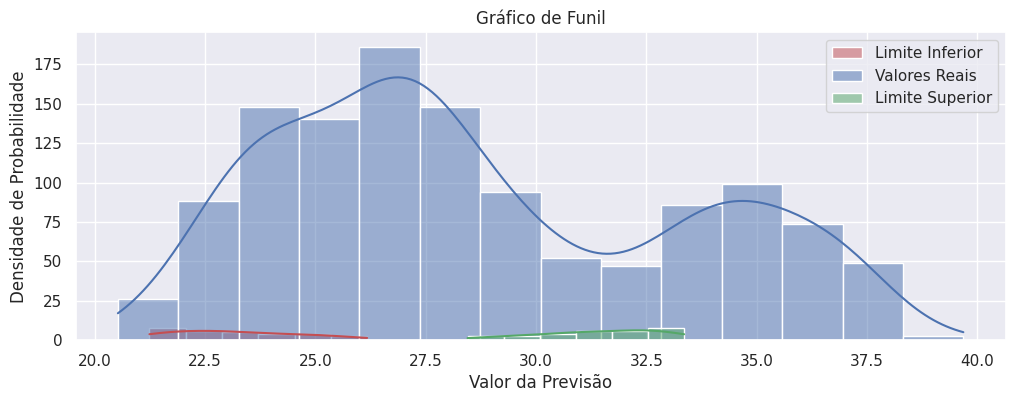

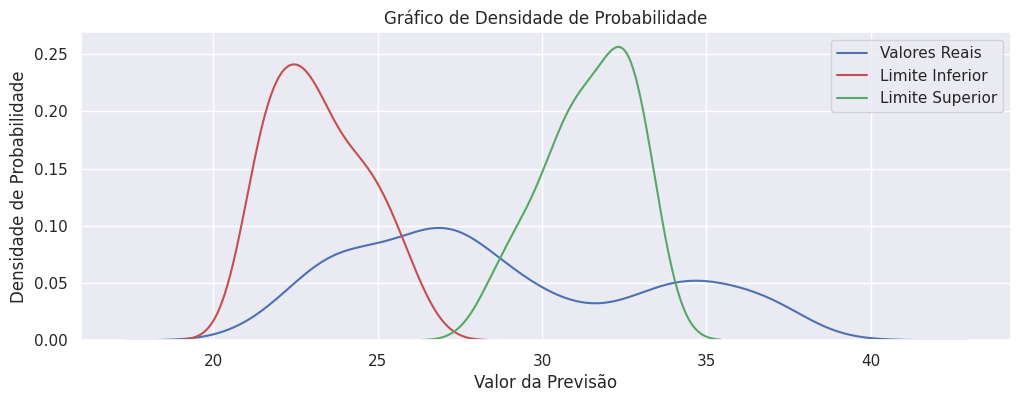

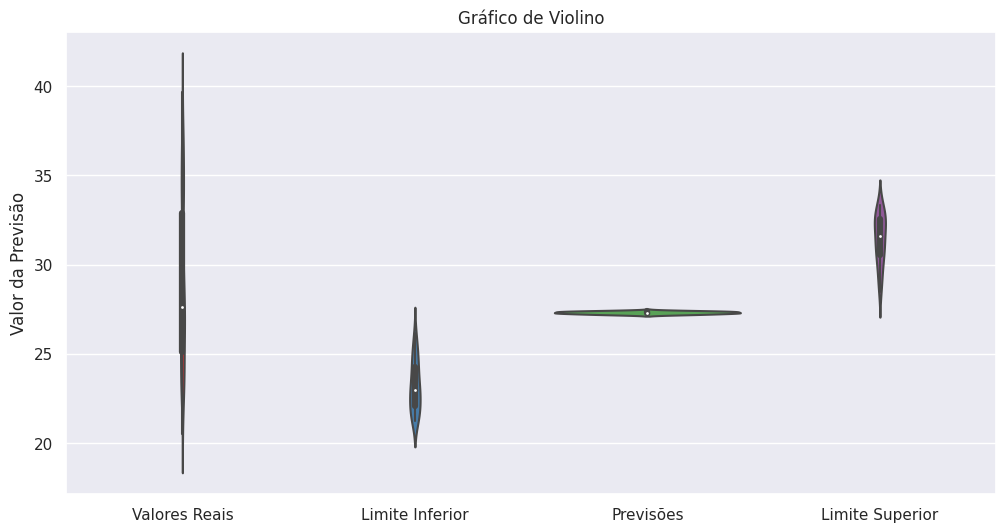

Conclusões para Gráfico de Faixa de Incerteza no Gráfico de Linha:
- Valores Reais (Close): Média = 28.708043, Mediana (50%) = 27.615001
- Limite Inferior: Média = 23.207905, Mediana (50%) = 22.960603
- Limite Superior: Média = 31.429025, Mediana (50%) = 31.596082
- A média dos Valores Reais é 5.500138 maior do que a média do Limite Inferior.
- O desvio padrão dos Valores Reais é 4.537839
- O desvio padrão do Limite Inferior é 1.400998
- O desvio padrão do Limite Superior é 1.347569
- O valor mínimo dos Valores Reais é 20.520000
- O valor máximo dos Valores Reais é 39.689999
- O valor mínimo do Limite Inferior é 21.235321
- O valor máximo do Limite Inferior é 26.170986
- O valor mínimo do Limite Superior é 28.447952
- O valor máximo do Limite Superior é 33.359122
- O intervalo interquartil (IQR) dos Valores Reais é 7.772501
- O intervalo interquartil (IQR) do Limite Inferior é 2.229060
- O intervalo interquartil (IQR) do Limite Superior é 2.002158
Média e Mediana (50%):
Valores Reais -

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Gráfico de Probabilidade Cumulativa
plt.figure(figsize=(12, 4))
sns.kdeplot(ibov_itub4['Close'], cumulative=True, color='b', label='Valores Reais', common_norm=False)
sns.kdeplot(forecast_conf_int.iloc[:, 0], cumulative=True, color='r', label='Limite Inferior', common_norm=False)
sns.kdeplot(forecast_conf_int.iloc[:, 1], cumulative=True, color='g', label='Limite Superior', common_norm=False)
plt.xlabel('Valor da Previsão')
plt.ylabel('Probabilidade Cumulativa')
plt.title('Gráfico de Probabilidade Cumulativa')
plt.legend()
plt.show()

# Gráfico de Funil
plt.figure(figsize=(12, 4))
sns.histplot(forecast_conf_int.iloc[:, 0], kde=True, color='r', label='Limite Inferior', common_norm=False)
sns.histplot(ibov_itub4['Close'], kde=True, color='b', label='Valores Reais', common_norm=False)
sns.histplot(forecast_conf_int.iloc[:, 1], kde=True, color='g', label='Limite Superior', common_norm=False)
plt.xlabel('Valor da Previsão')
plt.ylabel('Densidade de Probabilidade')
plt.title('Gráfico de Funil')
plt.legend()
plt.show()

# Gráfico de Densidade de Probabilidade
plt.figure(figsize=(12, 4))
sns.kdeplot(ibov_itub4['Close'], color='b', label='Valores Reais')
sns.kdeplot(forecast_conf_int.iloc[:, 0], color='r', label='Limite Inferior')
sns.kdeplot(forecast_conf_int.iloc[:, 1], color='g', label='Limite Superior')
plt.xlabel('Valor da Previsão')
plt.ylabel('Densidade de Probabilidade')
plt.title('Gráfico de Densidade de Probabilidade')
plt.legend()
plt.show()


# Cálculos para análise dos limites
valores_reais = ibov_itub4['Close']
limite_inferior = forecast_conf_int.iloc[:, 0]
limite_superior = forecast_conf_int.iloc[:, 1]
plt.show()


# Gráfico de Violino
data_to_plot = [valores_reais, limite_inferior, forecast_mean, limite_superior]
labels = ['Valores Reais', 'Limite Inferior', 'Previsões', 'Limite Superior']

plt.figure(figsize=(12, 6))
sns.violinplot(data=data_to_plot, palette='Set1')
plt.xticks(np.arange(4), labels)
plt.ylabel('Valor da Previsão')
plt.title('Gráfico de Violino')
plt.show()


media_valores_reais = np.mean(valores_reais)
mediana_valores_reais = np.median(valores_reais)
media_limite_inferior = np.mean(limite_inferior)
mediana_limite_inferior = np.median(limite_inferior)
media_limite_superior = np.mean(limite_superior)
mediana_limite_superior = np.median(limite_superior)

desvio_padrao_valores_reais = np.std(valores_reais)
desvio_padrao_limite_inferior = np.std(limite_inferior)
desvio_padrao_limite_superior = np.std(limite_superior)

q1_valores_reais, q3_valores_reais = np.percentile(valores_reais, [25, 75])
q1_limite_inferior, q3_limite_inferior = np.percentile(limite_inferior, [25, 75])
q1_limite_superior, q3_limite_superior = np.percentile(limite_superior, [25, 75])

minimo_valores_reais = np.min(valores_reais)
maximo_valores_reais = np.max(valores_reais)
minimo_limite_inferior = np.min(limite_inferior)
maximo_limite_inferior = np.max(limite_inferior)
minimo_limite_superior = np.min(limite_superior)
maximo_limite_superior = np.max(limite_superior)

# Função para imprimir conclusões
def print_conclusion(title, valores_reais_stats, limite_inferior_stats, limite_superior_stats):
    print(f"Conclusões para {title}:")
    print("- Valores Reais (Close): Média = {:.6f}, Mediana (50%) = {:.6f}".format(valores_reais_stats[0], valores_reais_stats[1]))
    print("- Limite Inferior: Média = {:.6f}, Mediana (50%) = {:.6f}".format(limite_inferior_stats[0], limite_inferior_stats[1]))
    print("- Limite Superior: Média = {:.6f}, Mediana (50%) = {:.6f}".format(limite_superior_stats[0], limite_superior_stats[1]))

    media_diff = valores_reais_stats[0] - limite_inferior_stats[0]
    if media_diff > 0:
        print(f"- A média dos Valores Reais é {media_diff:.6f} maior do que a média do Limite Inferior.")
    elif media_diff < 0:
        print(f"- A média dos Valores Reais é {abs(media_diff):.6f} menor do que a média do Limite Inferior.")
    else:
        print("- A média dos Valores Reais e a média do Limite Inferior são iguais.")

    print("- O desvio padrão dos Valores Reais é {:.6f}".format(valores_reais_stats[2]))
    print("- O desvio padrão do Limite Inferior é {:.6f}".format(limite_inferior_stats[2]))
    print("- O desvio padrão do Limite Superior é {:.6f}".format(limite_superior_stats[2]))

    print("- O valor mínimo dos Valores Reais é {:.6f}".format(valores_reais_stats[3]))
    print("- O valor máximo dos Valores Reais é {:.6f}".format(valores_reais_stats[4]))
    print("- O valor mínimo do Limite Inferior é {:.6f}".format(limite_inferior_stats[3]))
    print("- O valor máximo do Limite Inferior é {:.6f}".format(limite_inferior_stats[4]))
    print("- O valor mínimo do Limite Superior é {:.6f}".format(limite_superior_stats[3]))
    print("- O valor máximo do Limite Superior é {:.6f}".format(limite_superior_stats[4]))

    iqr_valores_reais = q3_valores_reais - q1_valores_reais
    iqr_limite_inferior = q3_limite_inferior - q1_limite_inferior
    iqr_limite_superior = q3_limite_superior - q1_limite_superior

    print("- O intervalo interquartil (IQR) dos Valores Reais é {:.6f}".format(iqr_valores_reais))
    print("- O intervalo interquartil (IQR) do Limite Inferior é {:.6f}".format(iqr_limite_inferior))
    print("- O intervalo interquartil (IQR) do Limite Superior é {:.6f}".format(iqr_limite_superior))


# Imprimir conclusões
print_conclusion("Gráfico de Faixa de Incerteza no Gráfico de Linha", [media_valores_reais, mediana_valores_reais, desvio_padrao_valores_reais, minimo_valores_reais, maximo_valores_reais],
                 [media_limite_inferior, mediana_limite_inferior, desvio_padrao_limite_inferior, minimo_limite_inferior, maximo_limite_inferior],
                 [media_limite_superior, mediana_limite_superior, desvio_padrao_limite_superior, minimo_limite_superior, maximo_limite_superior])


print("Média e Mediana (50%):")
print(f"Valores Reais - Média: {media_valores_reais}, Mediana: {mediana_valores_reais}")
print(f"Limite Inferior - Média: {media_limite_inferior}, Mediana: {mediana_limite_inferior}")
print(f"Limite Superior - Média: {media_limite_superior}, Mediana: {mediana_limite_superior}")


# Imprimir os valores
print("Valores Reais:")
print(ibov_itub4['Close'].describe())

print("Limite Inferior:")
print(forecast_conf_int.iloc[:, 0].describe())

print("Limite Superior:")
print(forecast_conf_int.iloc[:, 1].describe())

[*********************100%%**********************]  1 of 1 completed


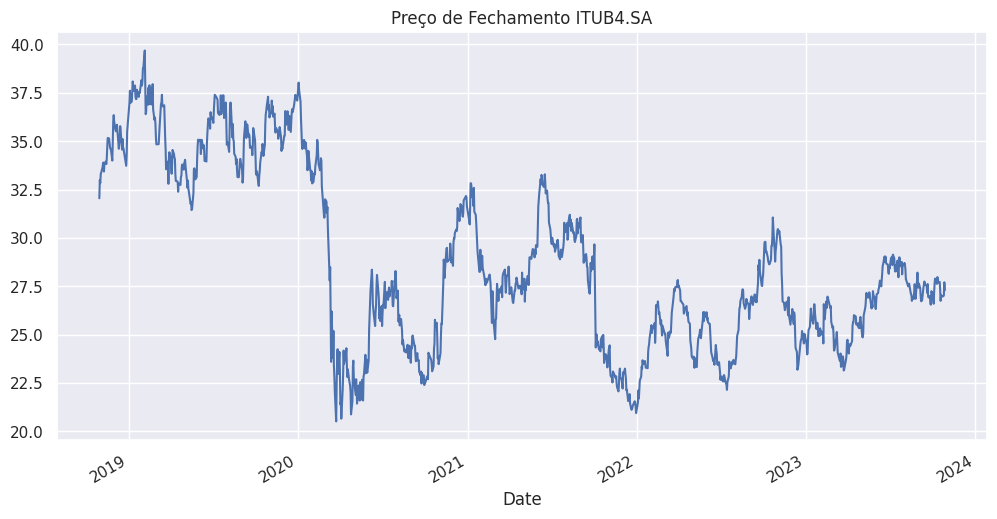

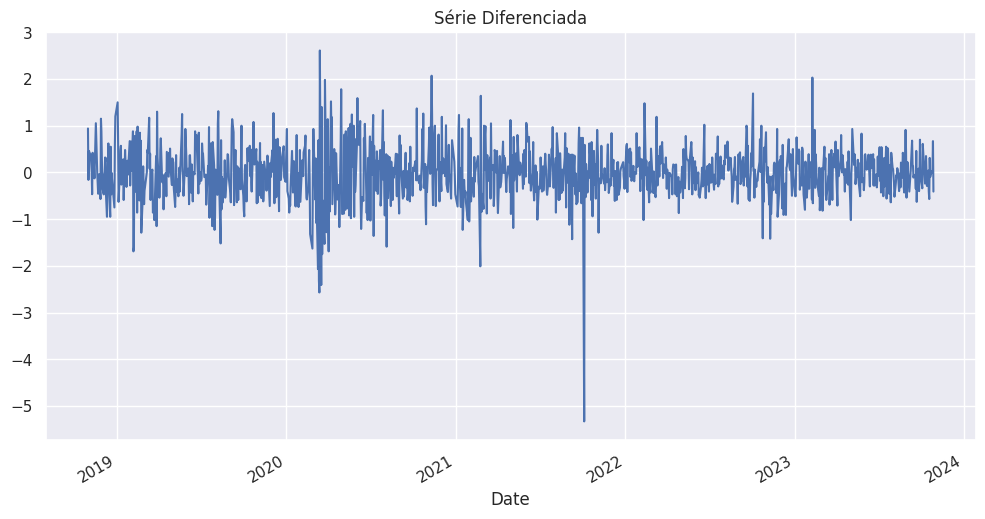

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1077.063
Date:                Sun, 29 Oct 2023   AIC                           2166.127
Time:                        02:10:52   BIC                           2196.864
Sample:                             0   HQIC                          2177.686
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8710      1.919     15.048      0.000      25.111      32.631
ar.L1          0.8984      0.813      1.105      0.269      -0.695       2.492
ar.L2          0.0927      0.807      0.115      0.9

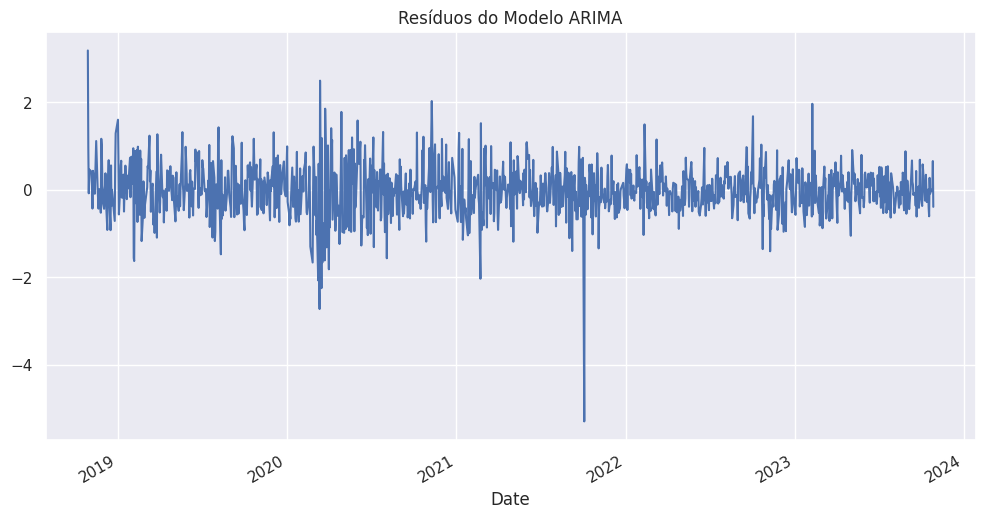

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Previsões: 1240    27.317943
1241    27.298233
1242    27.290878
1243    27.296591
1244    27.301578
1245    27.285207
1246    27.286760
1247    27.275044
1248    27.257341
1249    27.269782
1250    27.249354
1251    27.233245
1252    27.211101
1253    27.212479
1254    27.214264
1255    27.237430
1256    27.241327
1257    27.244814
1258    27.268325
1259    27.264319
1260    27.253646
1261    27.242546
1262    27.213661
1263    27.191426
1264    27.192530
1265    27.175520
1266    27.169602
1267    27.177347
1268    27.182603
1269    27.168305
Name: predicted_mean, dtype: float64
Intervalos de confiança: 
      lower Close  upper Close
1240    26.187632    28.448253
1241    25.742095    28.854372
1242    25.406960    29.174797
1243    25.136919    29.456262
1244    24.899598    29.703559
1245    24.664660    29.905754
1246    24.465583    30.107937
1247    24.267384    30.282704
1248    24.074717    30.439965
1249    23.921805    30.617759
1250    23.744204    30.754504
1251    23.577

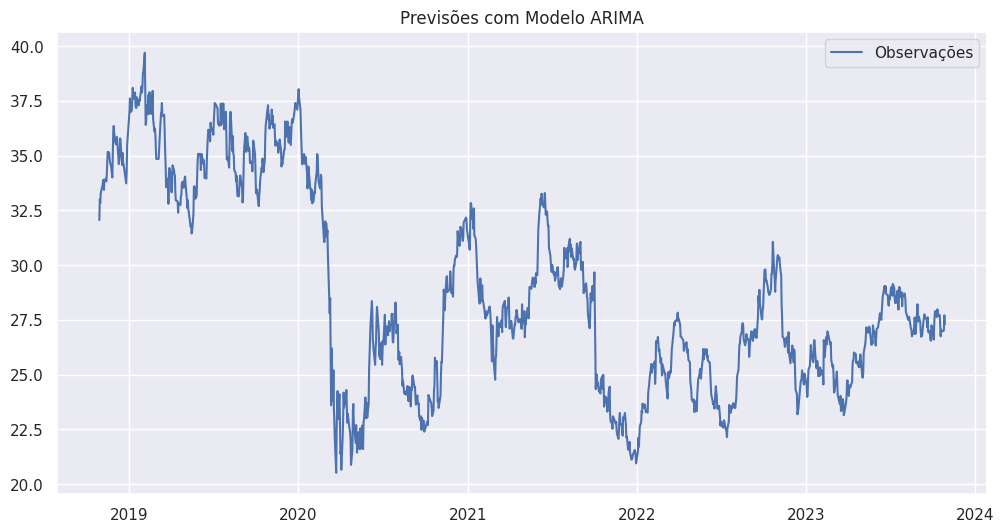

ValueError: ignored

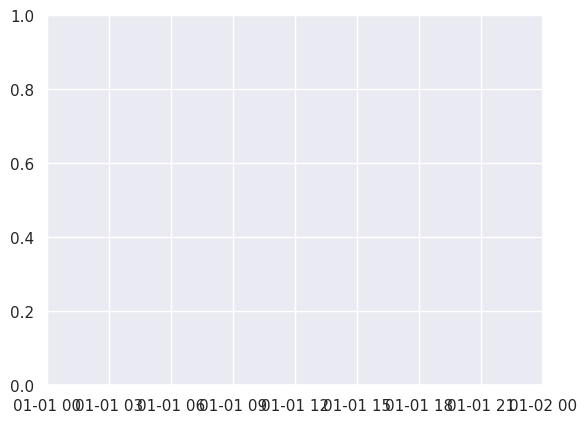

In [ ]:
#2.0.2
#start='2000-12-21', end='2023-06-29'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Baixar as cotações do Yahoo Finance para o Índice Bovespa (ITUB4.SA)
import yfinance as yf
ibov_itub4 = yf.download('ITUB4.SA', start='2018-10-29', end='2023-10-29')
ibov_itub4.dropna(inplace=True)

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# Plotar os dados de fechamento
plt.figure(figsize=(12, 6))
ibov_itub4['Close'].plot(title='Preço de Fechamento ITUB4.SA')
plt.show()

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada')
plt.show()

# Ajustar o modelo ARIMA
order = (2, 0, 2)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar previsões com o modelo
#n_forecast = 30  # Número de períodos a serem previstos
#forecast, stderr, conf_int = results.forecast(steps=n_forecast)

###
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Suponha que você tenha seus dados em um DataFrame chamado 'data'
# Substitua os valores dos parâmetros adequadamente
p, d, q = 2, 0, 2  # Ordem do modelo ARIMA
P, D, Q, s = 2, 0, 2, 12  # Ordem do modelo sazonal ARIMA

# Ajuste do modelo SARIMA
model = sm.tsa.SARIMAX(ibov_itub4['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
# Realizar previsões com o modelo SARIMA
n_forecast = 30  # Número de períodos a serem previstos
forecast = results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Exibir as previsões
print(f"Previsões: {forecast_mean}")
print(f"Intervalos de confiança: \n{forecast_conf_int}")

#####


# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4.index, ibov_itub4['Close'], label='Observações')
#plt.plot(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast), label='Previsões', linestyle='--')
#plt.fill_between(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast) - stderr, np.append(ibov_itub4['Close'][-1], forecast) + stderr, color='gray', alpha=0.2, label='Incerteza')
plt.title('Previsões com Modelo ARIMA')
plt.legend()
plt.show()

forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')


#plt.plot(forecast_dates, forecast_mean, label='Previsões', linestyle='--')
#plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')



forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')


plt.plot(forecast_dates, forecast_mean, label='Previsões', linestyle='--')
#plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')

n_forecast = 30  # Número de períodos a serem previstos
forecast = results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()



plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')



[*********************100%%**********************]  1 of 1 completed


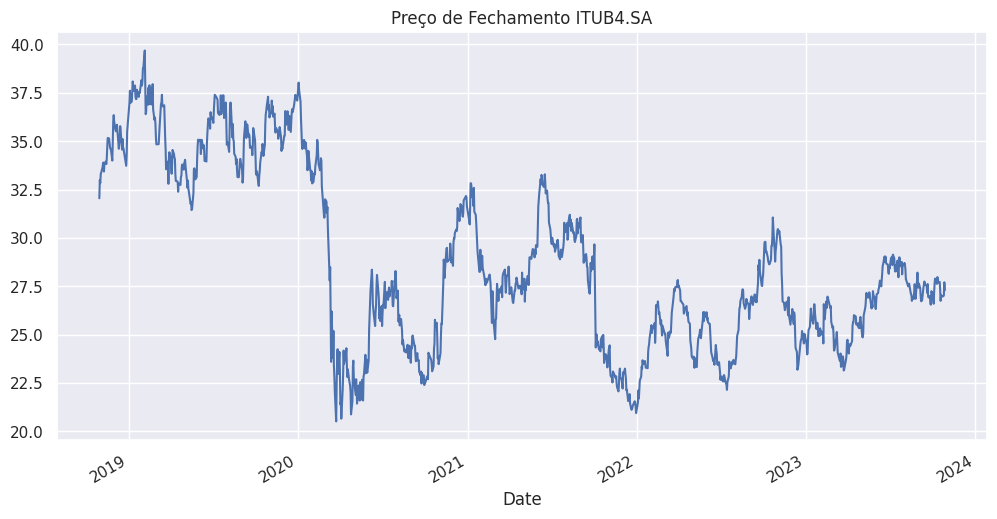

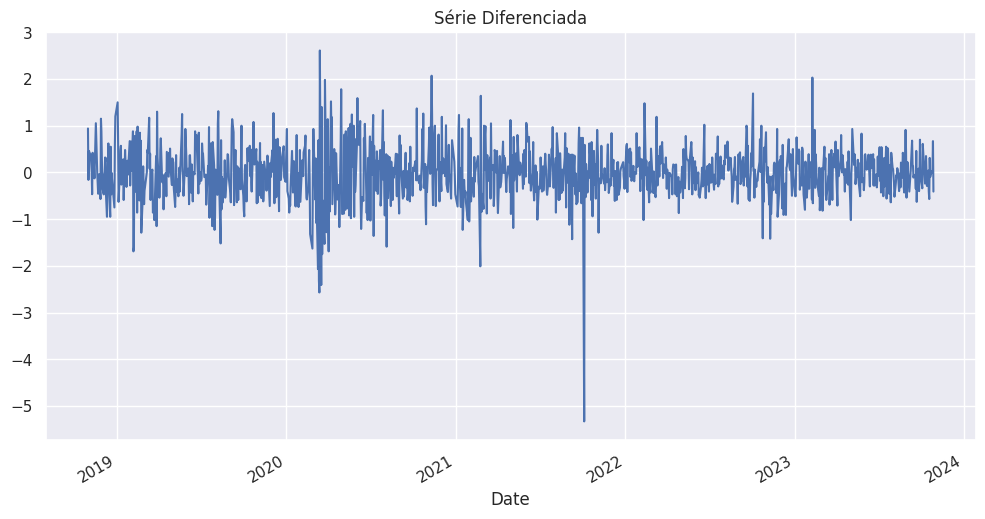

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1079.609
Date:                Sun, 29 Oct 2023   AIC                           2169.219
Time:                        02:14:06   BIC                           2194.825
Sample:                             0   HQIC                          2178.849
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0514      0.021    -50.230      0.000      -1.092      -1.010
ar.L2         -0.0552      0.020     -2.795      0.005      -0.094      -0.017
ma.L1         -0.0001    447.383  -2.98e-07      1.0

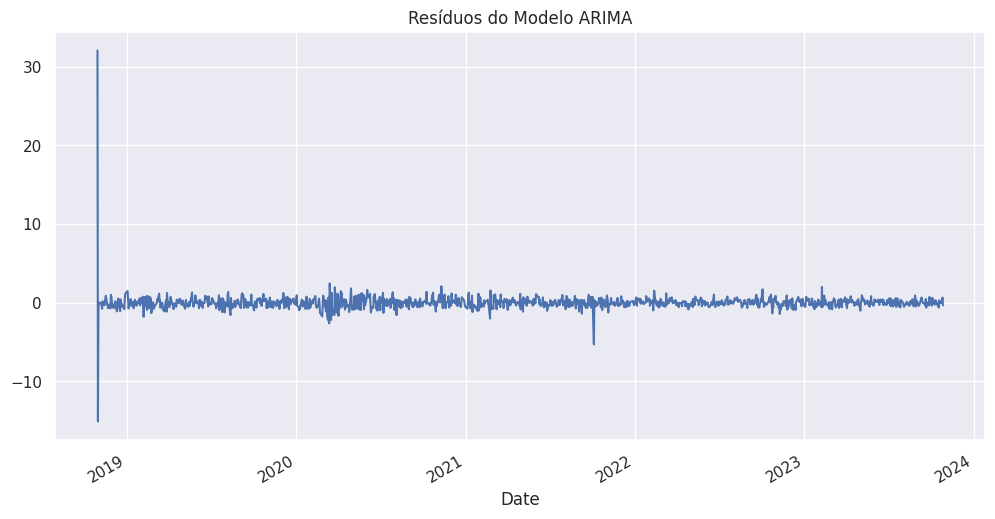

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Previsões: 1240    27.460221
1241    27.450470
1242    27.315479
1243    27.464677
1244    27.382065
1245    27.457363
1246    27.538509
1247    27.624935
1248    27.602205
1249    27.663233
1250    27.657761
1251    27.585593
1252    27.717918
1253    27.725872
1254    27.579755
1255    27.764626
1256    27.709269
1257    27.773354
1258    27.864001
1259    27.955687
1260    27.933961
1261    27.997800
1262    27.954835
1263    27.903548
1264    28.037674
1265    28.047335
1266    27.899726
1267    28.088502
1268    28.033182
1269    28.099804
Name: predicted_mean, dtype: float64
Intervalos de confiança: 
      lower Close  upper Close
1240    26.324098    28.596345
1241    25.883873    29.017067
1242    25.409386    29.221571
1243    25.268346    29.661008
1244    24.927990    29.836139
1245    24.767894    30.146831
1246    24.631294    30.445724
1247    24.513228    30.736641
1248    24.297463    30.906947
1249    24.174140    31.152327
1250    23.992447    31.323074
1251    23.750

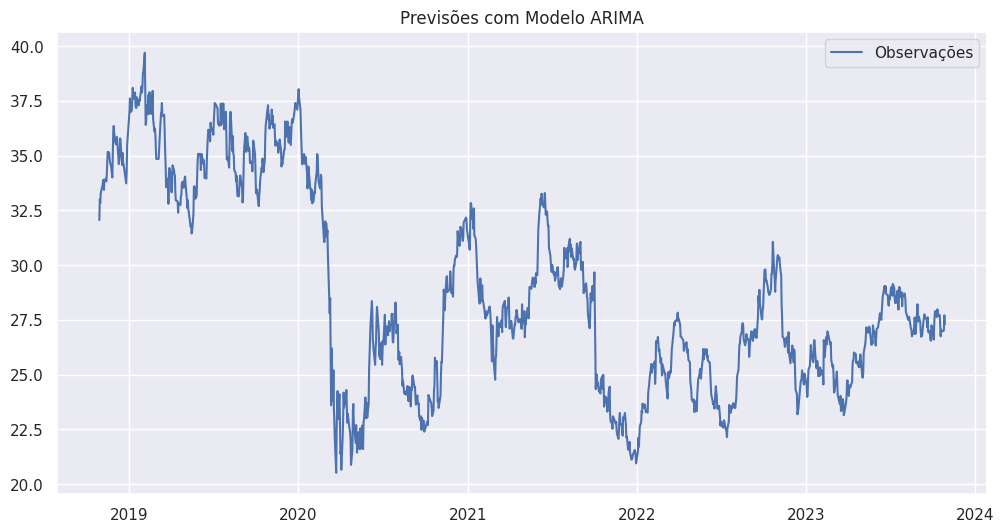

ValueError: ignored

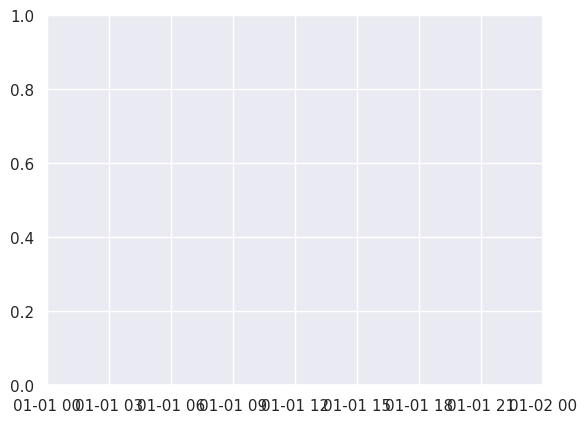

In [ ]:
#2.0.2
#start='2000-12-21', end='2023-06-29'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Baixar as cotações do Yahoo Finance para o Índice Bovespa (ITUB4.SA)
import yfinance as yf
ibov_itub4 = yf.download('ITUB4.SA', start='2018-10-29', end='2023-10-29')
ibov_itub4.dropna(inplace=True)

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# Plotar os dados de fechamento
plt.figure(figsize=(12, 6))
ibov_itub4['Close'].plot(title='Preço de Fechamento ITUB4.SA')
plt.show()

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada')
plt.show()

# Ajustar o modelo ARIMA
order = (2, 2, 2)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar previsões com o modelo
#n_forecast = 30  # Número de períodos a serem previstos
#forecast, stderr, conf_int = results.forecast(steps=n_forecast)

###
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Suponha que você tenha seus dados em um DataFrame chamado 'data'
# Substitua os valores dos parâmetros adequadamente
p, d, q = 2, 2, 2  # Ordem do modelo ARIMA
P, D, Q, s = 2, 2, 2, 12  # Ordem do modelo sazonal ARIMA

# Ajuste do modelo SARIMA
model = sm.tsa.SARIMAX(ibov_itub4['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
# Realizar previsões com o modelo SARIMA
n_forecast = 30  # Número de períodos a serem previstos
forecast = results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Exibir as previsões
print(f"Previsões: {forecast_mean}")
print(f"Intervalos de confiança: \n{forecast_conf_int}")

#####


# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4.index, ibov_itub4['Close'], label='Observações')
#plt.plot(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast), label='Previsões', linestyle='--')
#plt.fill_between(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast) - stderr, np.append(ibov_itub4['Close'][-1], forecast) + stderr, color='gray', alpha=0.2, label='Incerteza')
plt.title('Previsões com Modelo ARIMA')
plt.legend()
plt.show()

forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')


#plt.plot(forecast_dates, forecast_mean, label='Previsões', linestyle='--')
#plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')



forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')


plt.plot(forecast_dates, forecast_mean, label='Previsões', linestyle='--')
#plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')

n_forecast = 30  # Número de períodos a serem previstos
forecast = results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()



plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')



[*********************100%%**********************]  1 of 1 completed


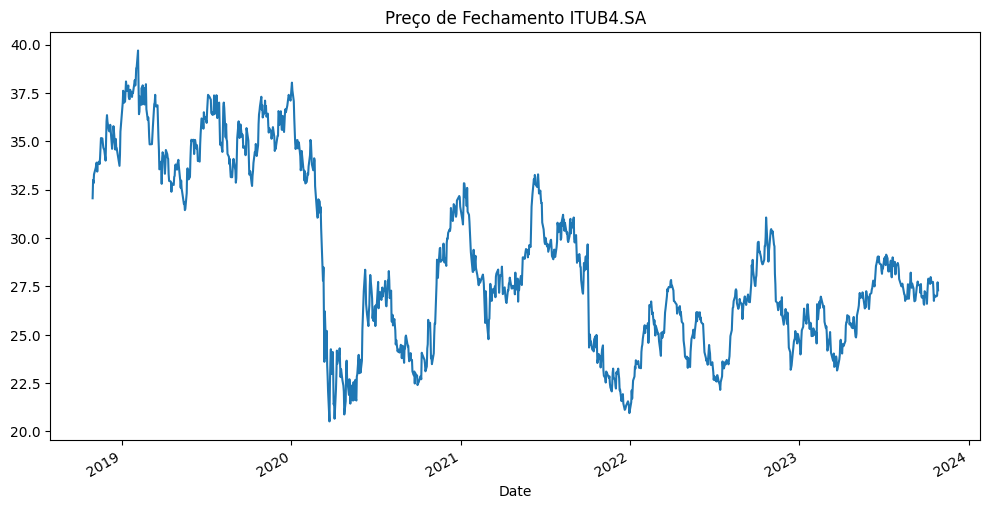

<ipython-input-4-8b61144f4d3d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()


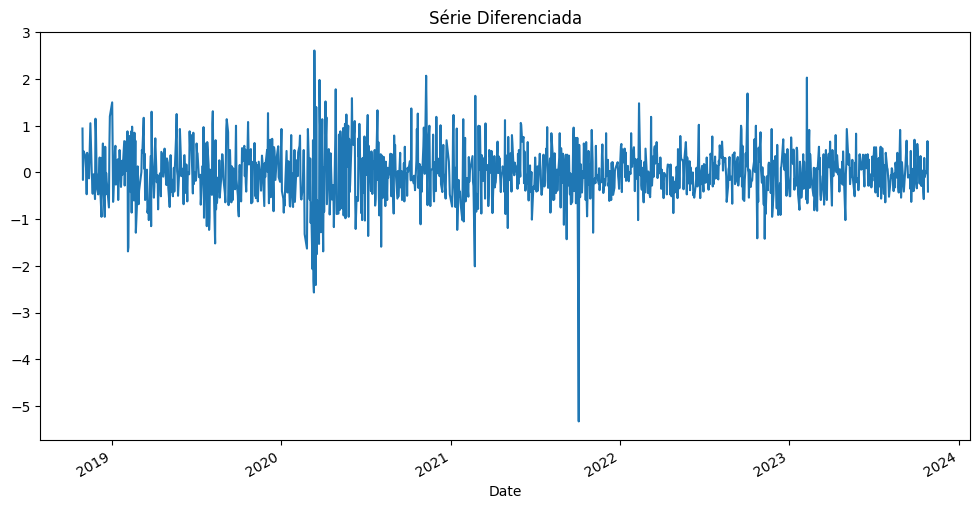

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1076.874
Date:                Sun, 29 Oct 2023   AIC                           2159.747
Time:                        23:01:22   BIC                           2175.114
Sample:                             0   HQIC                          2165.527
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0526      0.020     -2.682      0.007      -0.091      -0.014
ma.L2          0.0206      0.021      0.982      0.326      -0.020       0.062
sigma2         0.3330      0.007     50.989      0.0

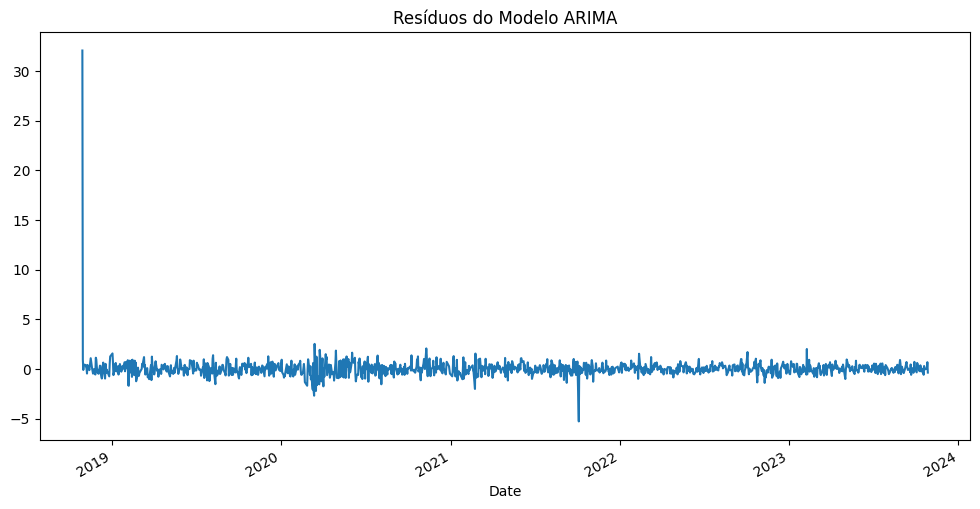

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/di

Previsões: 1240    27.435879
1241    27.413835
1242    27.252335
1243    27.390912
1244    27.300378
1245    27.352234
1246    27.417870
1247    27.468922
1248    27.412300
1249    27.450706
1250    27.393616
1251    27.313889
1252    27.412528
1253    27.400690
1254    27.230667
1255    27.400492
1256    27.327046
1257    27.365712
1258    27.430458
1259    27.491321
1260    27.440319
1261    27.482452
1262    27.395192
1263    27.329087
1264    27.432291
1265    27.416640
1266    27.246963
1267    27.410847
1268    27.328483
1269    27.372376
Name: predicted_mean, dtype: float64
Intervalos de confiança: 
      lower Close  upper Close
1240    26.281312    28.590447
1241    25.824583    29.003087
1242    25.311456    29.193214
1243    25.152988    29.628835
1244    24.800460    29.800297
1245    24.615287    30.089182
1246    24.462845    30.372895
1247    24.310843    30.627001
1248    24.063456    30.761143
1249    23.921472    30.979941
1250    23.692773    31.094459
1251    23.449

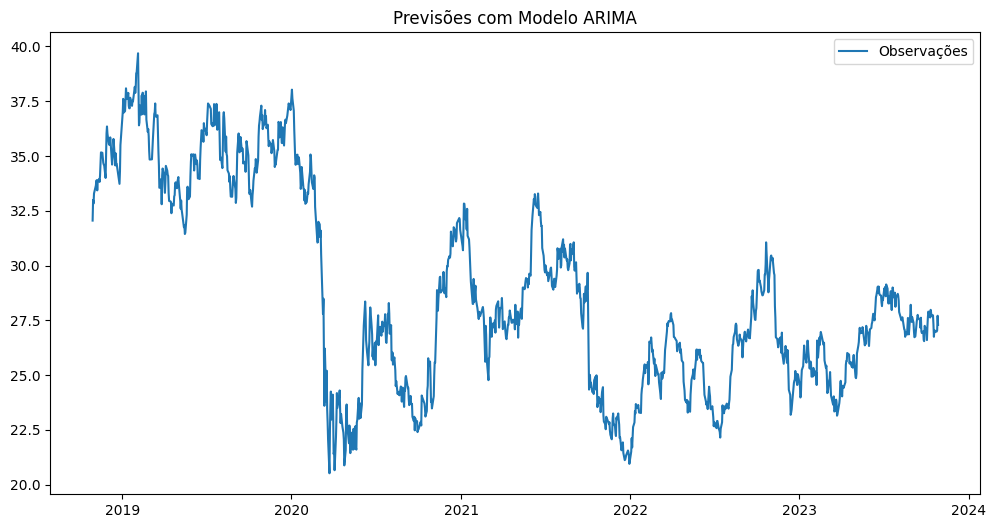

<ipython-input-4-8b61144f4d3d>:79: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')
<ipython-input-4-8b61144f4d3d>:87: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')


ValueError: ignored

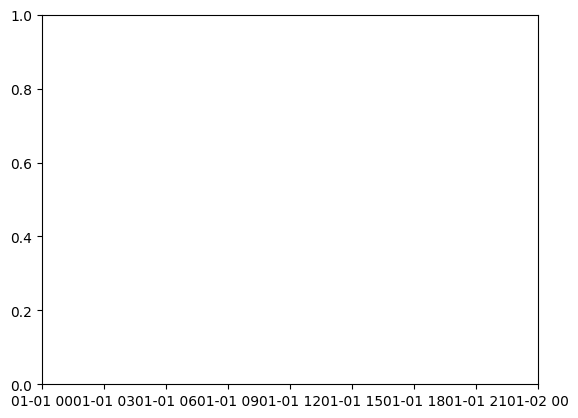

In [ ]:
#2.0.2
#start='2000-12-21', end='2023-06-29'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Baixar as cotações do Yahoo Finance para o Índice Bovespa (ITUB4.SA)
import yfinance as yf
ibov_itub4 = yf.download('ITUB4.SA', start='2018-10-29', end='2023-10-29')
ibov_itub4.dropna(inplace=True)

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# Plotar os dados de fechamento
plt.figure(figsize=(12, 6))
ibov_itub4['Close'].plot(title='Preço de Fechamento ITUB4.SA')
plt.show()

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada')
plt.show()

# Ajustar o modelo ARIMA
order = (0, 1, 2)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar previsões com o modelo
#n_forecast = 30  # Número de períodos a serem previstos
#forecast, stderr, conf_int = results.forecast(steps=n_forecast)

###
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Suponha que você tenha seus dados em um DataFrame chamado 'data'
# Substitua os valores dos parâmetros adequadamente
p, d, q = 0, 1, 2  # Ordem do modelo ARIMA
P, D, Q, s = 2, 2, 2, 12  # Ordem do modelo sazonal ARIMA

# Ajuste do modelo SARIMA
model = sm.tsa.SARIMAX(ibov_itub4['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
# Realizar previsões com o modelo SARIMA
n_forecast = 30  # Número de períodos a serem previstos
forecast = results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Exibir as previsões
print(f"Previsões: {forecast_mean}")
print(f"Intervalos de confiança: \n{forecast_conf_int}")

#####


# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4.index, ibov_itub4['Close'], label='Observações')
#plt.plot(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast), label='Previsões', linestyle='--')
#plt.fill_between(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast) - stderr, np.append(ibov_itub4['Close'][-1], forecast) + stderr, color='gray', alpha=0.2, label='Incerteza')
plt.title('Previsões com Modelo ARIMA')
plt.legend()
plt.show()

forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')


#plt.plot(forecast_dates, forecast_mean, label='Previsões', linestyle='--')
#plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')



forecast_dates = pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast, closed='right')


plt.plot(forecast_dates, forecast_mean, label='Previsões', linestyle='--')
#plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')

n_forecast = 30  # Número de períodos a serem previstos
forecast = results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()



plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Incerteza')



# Arima order

[*********************100%%**********************]  1 of 1 completed


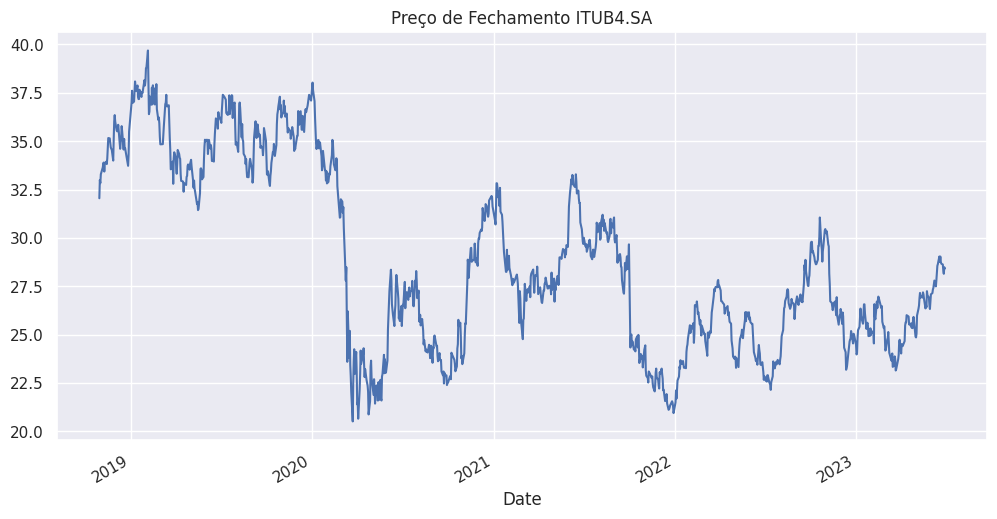

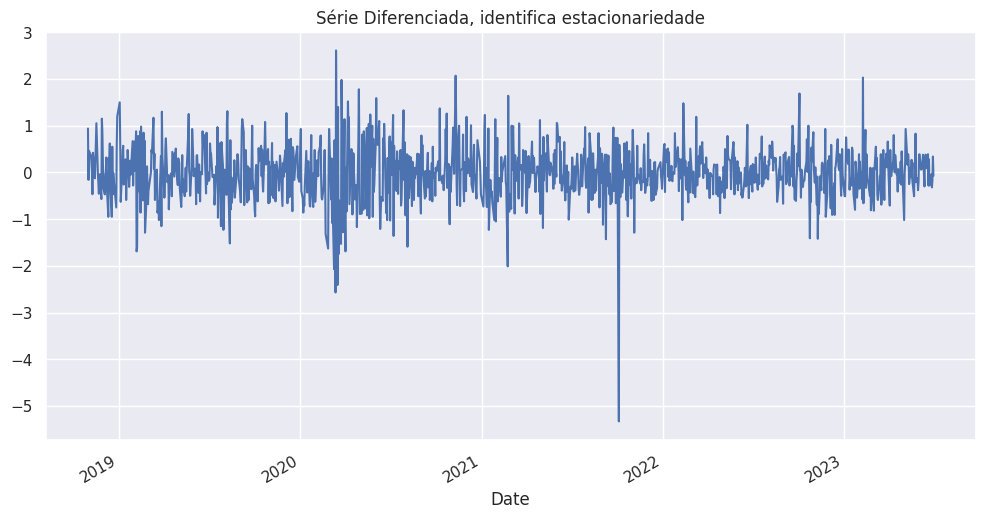

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1029.741
Date:                Sun, 29 Oct 2023   AIC                           2065.481
Time:                        01:48:39   BIC                           2080.639
Sample:                             0   HQIC                          2071.202
                               - 1157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2892      0.375     -0.772      0.440      -1.024       0.445
ma.L1          0.2363      0.381      0.620      0.536      -0.511       0.984
sigma2         0.3477      0.007     48.774      0.0

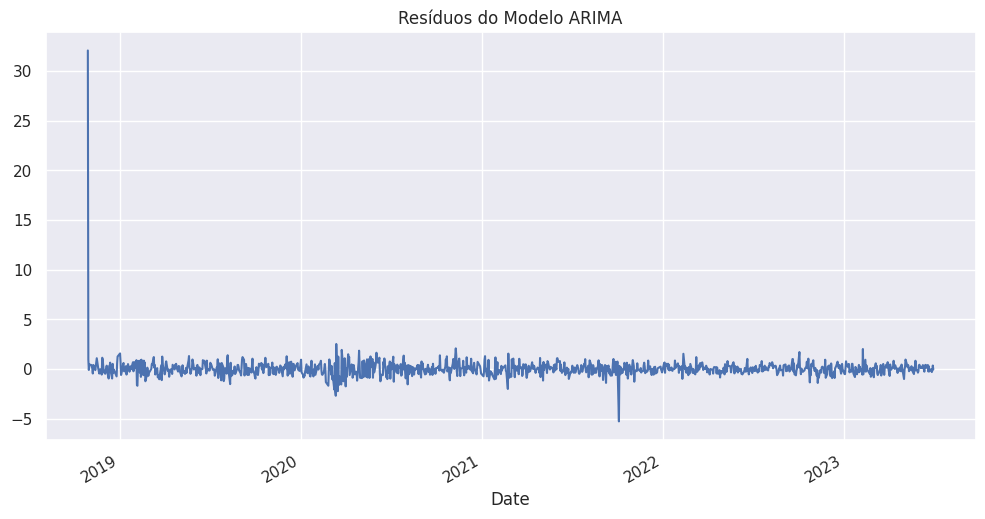

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: ignored

In [ ]:
#start='2000-12-21', end='2023-06-21'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Baixar as cotações do Yahoo Finance para o Índice Bovespa (ITUB4.SA)
import yfinance as yf
ibov_itub4 = yf.download('ITUB4.SA', start='2018-10-29', end='2023-07-01')

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# Plotar os dados de fechamento
plt.figure(figsize=(12, 6))
ibov_itub4['Close'].plot(title='Preço de Fechamento ITUB4.SA')
plt.show()

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada, identifica estacionariedade')
plt.show()

# Ajustar o modelo ARIMA
order = (1, 1, 1)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar previsões com o modelo
n_forecast = 30  # Número de períodos a serem previstos
forecast, stderr, conf_int = results.forecast(steps=n_forecast)

# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4.index, ibov_itub4['Close'], label='Observações')
plt.plot(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast), label='Previsões', linestyle='--')
plt.fill_between(pd.date_range(start=ibov_itub4.index[-1], periods=n_forecast + 1, closed='right'), np.append(ibov_itub4['Close'][-1], forecast) - stderr, np.append(ibov_itub4['Close'][-1], forecast) + stderr, color='gray', alpha=0.2, label='Incerteza')
plt.title('Previsões com Modelo ARIMA')
plt.legend()
plt.show()


In [ ]:
verificar a estacionariedade do modelo # valor p > que 5 % é estacionaria
teste 1 ordem 1,1,1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1076.908
Date:                Sun, 29 Oct 2023   AIC                           2159.816
Time:                        02:21:51   BIC                           2175.182
Sample:                             0   HQIC                          2165.595
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2529      0.360     -0.702      0.483      -0.959       0.453
ma.L1          0.1986      0.366      0.542      0.588      -0.519       0.916
sigma2         0.3330      0.007     51.036      0.0

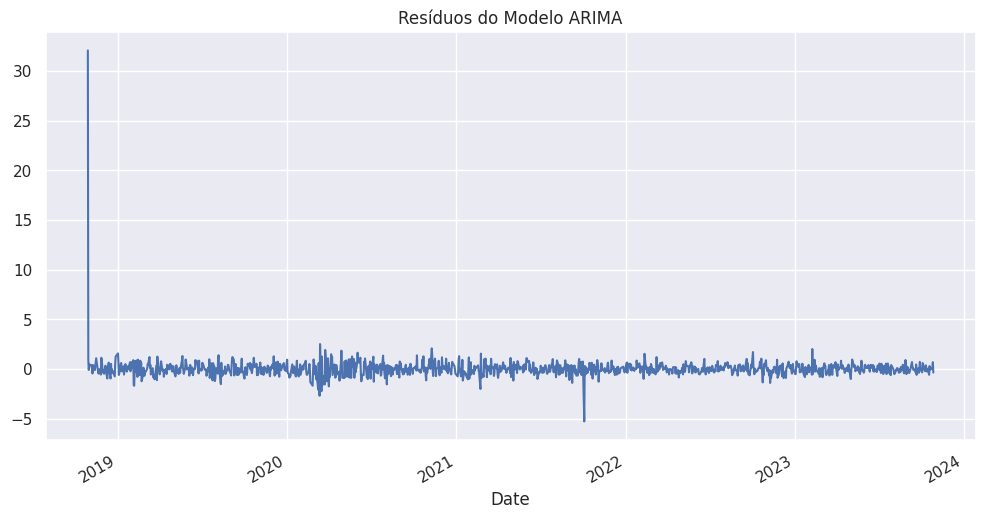

Resultado do Teste de Dickey-Fuller Aumentado:
Estatística do teste: -64.33692906676654
Valor p: 0.0
Valores críticos: {'1%': -3.435638861796935, '5%': -2.863875547501718, '10%': -2.5680134763122906}
Os resíduos são estacionários (rejeita-se a hipótese nula).


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]


# Ajustar o modelo ARIMA
order = (1, 1, 1)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar o teste de estacionariedade (ADF) nos resíduos
adf_test_result = adfuller(results.resid, autolag='AIC')

# Imprimir o resultado do teste
print("Resultado do Teste de Dickey-Fuller Aumentado:")
print("Estatística do teste:", adf_test_result[0])
print("Valor p:", adf_test_result[1])
print("Valores críticos:", adf_test_result[4])

# Interpretar o resultado
if adf_test_result[1] <= 0.05:
    print("Os resíduos são estacionários (rejeita-se a hipótese nula).")
else:
    print("Os resíduos não são estacionários (não se rejeita a hipótese nula).")


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]


# Ajustar o modelo ARIMA
order = (2, 0, 2)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar o teste de estacionariedade (ADF) nos resíduos
adf_test_result = adfuller(results.resid, autolag='AIC')

# Imprimir o resultado do teste
print("Resultado do Teste de Dickey-Fuller Aumentado:")
print("Estatística do teste:", adf_test_result[0])
print("Valor p:", adf_test_result[1])
print("Valores críticos:", adf_test_result[4])

# Interpretar o resultado
if adf_test_result[1] <= 0.05:
    print("Os resíduos são estacionários (rejeita-se a hipótese nula).")
else:
    print("Os resíduos não são estacionários (não se rejeita a hipótese nula).")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1240
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1079.609
Date:                Sun, 29 Oct 2023   AIC                           2169.219
Time:                        02:21:57   BIC                           2194.825
Sample:                             0   HQIC                          2178.849
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0514      0.021    -50.230      0.000      -1.092      -1.010
ar.L2         -0.0552      0.020     -2.795      0.005      -0.094      -0.017
ma.L1         -0.0001    447.383  -2.98e-07      1.0

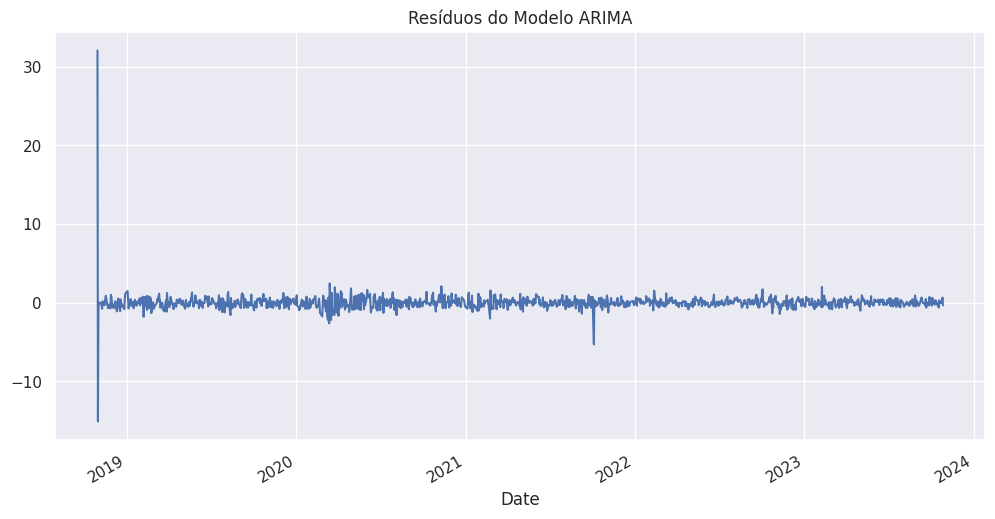

Resultado do Teste de Dickey-Fuller Aumentado:
Estatística do teste: -81.26210463401601
Valor p: 0.0
Valores críticos: {'1%': -3.435638861796935, '5%': -2.863875547501718, '10%': -2.5680134763122906}
Os resíduos são estacionários (rejeita-se a hipótese nula).


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]


# Ajustar o modelo ARIMA
order = (2, 2, 2)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar o teste de estacionariedade (ADF) nos resíduos
adf_test_result = adfuller(results.resid, autolag='AIC')

# Imprimir o resultado do teste
print("Resultado do Teste de Dickey-Fuller Aumentado:")
print("Estatística do teste:", adf_test_result[0])
print("Valor p:", adf_test_result[1])
print("Valores críticos:", adf_test_result[4])

# Interpretar o resultado
if adf_test_result[1] <= 0.05:
    print("Os resíduos são estacionários (rejeita-se a hipótese nula).")
else:
    print("Os resíduos não são estacionários (não se rejeita a hipótese nula).")


In [ ]:
#teste KPSS
from statsmodels.tsa.stattools import kpss


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# ...

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada')
plt.show()

# Ajustar o modelo ARIMA
order = (1, 1, 1)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar o teste KPSS nos dados diferenciados
kpss_test_result = kpss(ibov_itub4['CloƒseDiff'])

# Imprimir o resultado do teste
print("Resultado do Teste KPSS:")
print("Estatística do teste:", kpss_test_result[0])
print("Valor p:", kpss_test_result[1])
print("Nível de significância crítico (5%):", kpss_test_result[3])

# Interpretar o resultado
if kpss_test_result[1] <= kpss_test_result[3]:
    print("Os dados são estacionários em torno de uma tendência determinística (não rejeita-se a hipótese nula).")
else:
    print("Os dados não são estacionários em torno de uma tendência determinística (rejeita-se a hipótese nula).")


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# ...

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada')
plt.show()

# Ajustar o modelo ARIMA
order = (2, 0, 2)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar o teste KPSS nos dados diferenciados
kpss_test_result = kpss(ibov_itub4['CloseDiff'])

# Imprimir o resultado do teste
print("Resultado do Teste KPSS:")
print("Estatística do teste:", kpss_test_result[0])
print("Valor p:", kpss_test_result[1])
print("Nível de significância crítico (5%):", kpss_test_result[3])

# Interpretar o resultado
if kpss_test_result[1] <= kpss_test_result[3]:
    print("Os dados são estacionários em torno de uma tendência determinística (não rejeita-se a hipótese nula).")
else:
    print("Os dados não são estacionários em torno de uma tendência determinística (rejeita-se a hipótese nula).")


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# ...

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada')
plt.show()

# Ajustar o modelo ARIMA
order = (2, 1, 2)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar o teste KPSS nos dados diferenciados
kpss_test_result = kpss(ibov_itub4['CloseDiff'])

# Imprimir o resultado do teste
print("Resultado do Teste KPSS:")
print("Estatística do teste:", kpss_test_result[0])
print("Valor p:", kpss_test_result[1])
print("Nível de significância crítico (5%):", kpss_test_result[3])

# Interpretar o resultado
if kpss_test_result[1] <= kpss_test_result[3]:
    print("Os dados são estacionários em torno de uma tendência determinística (não rejeita-se a hipótese nula).")
else:
    print("Os dados não são estacionários em torno de uma tendência determinística (rejeita-se a hipótese nula).")


menores erros em ordem 1, 1, 1

In [ ]:
import pandas as pd
import numpy as np



# Calcular as variações percentuais diárias
ibov_itub4["Daily Change"] = ibov_itub4["Close"].pct_change()

# Encontrar as 5 maiores quedas
top_drawdowns = ibov_itub4.nsmallest(5, "Daily Change")

for i, row in top_drawdowns.iterrows():
    max_drawdown = row["Daily Change"]
    start_date = ibov_itub4.loc[ibov_itub4["Daily Change"] == max_drawdown].index[0]
    end_date = ibov_itub4.loc[ibov_itub4["Daily Change"] == max_drawdown].index[-1]

    # Converter as datas para valores numéricos (dias inteiros)
    x1 = (start_date - ibov_itub4.index.min()).days
    x2 = (end_date - ibov_itub4.index.min()).days

    # Preços correspondentes
    y1 = ibov_itub4.loc[start_date, "Close"]
    y2 = ibov_itub4.loc[end_date, "Close"]

    # Calcular os coeficientes da função de primeiro grau (y = mx + b)
    coefficients = np.polyfit([x1, x2], [y1, y2], 1)

    # Coeficiente angular (m) da função de primeiro grau
    m = coefficients[0]

    # Coeficiente linear (b) da função de primeiro grau
    b = coefficients[1]

    print(f"Maior queda percentual ({i}): {max_drawdown}")
    print(f"Período de queda ({i}): {start_date} a {end_date}")
    print(f"Função de primeiro grau que representa a queda ({i}): y = {m}x + {b}")
    print()



In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# ...

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada')
plt.show()

# Remover linhas com valores ausentes (NaN) nos dados diferenciados
ibov_itub4_cleaned = ibov_itub4.dropna(subset=['CloseDiff'])

# Ajustar o modelo ARIMA
order = (1, 1, 1)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4_cleaned['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar o teste KPSS nos dados diferenciados (após remoção de NaN)
kpss_test_result = kpss(ibov_itub4_cleaned['CloseDiff'])

# Imprimir o resultado do teste
print("Resultado do Teste KPSS:")
print("Estatística do teste:", kpss_test_result[0])
print("Valor p:", kpss_test_result[1])
print("Nível de significância crítico (5%):", kpss_test_result[3])

# Interpretar o resultado
if kpss_test_result[1] <= kpss_test_result[3]:
    print("Os dados são estacionários em torno de uma tendência determinística (não rejeita-se a hipótese nula).")
else:
    print("Os dados não são estacionários em torno de uma tendência determinística (rejeita-se a hipótese nula).")


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt

# Extrair a coluna "Close" (preço de fechamento)
ibov_itub4 = ibov_itub4[['Close']]

# ...

# Diferenciar os dados para torná-los estacionários (se necessário)
ibov_itub4['CloseDiff'] = ibov_itub4['Close'].diff()
plt.figure(figsize=(12, 6))
ibov_itub4['CloseDiff'].plot(title='Série Diferenciada')
plt.show()

# Remover linhas com valores ausentes (NaN) nos dados diferenciados
ibov_itub4_cleaned = ibov_itub4.dropna(subset=['CloseDiff'])

# Ajustar o modelo ARIMA
order = (1, 1, 1)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(ibov_itub4_cleaned['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar os resíduos do modelo
plt.figure(figsize=(12, 6))
results.resid.plot(title='Resíduos do Modelo ARIMA')
plt.show()

# Realizar o teste KPSS nos dados diferenciados (após remoção de NaN)
kpss_test_result = kpss(ibov_itub4_cleaned['CloseDiff'])

# Imprimir o resultado do teste
print("Resultado do Teste KPSS:")
print("Estatística do teste:", kpss_test_result[0])
print("Valor p:", kpss_test_result[1])
print("Valores críticos (1%, 2.5%, 5%, 10%):", kpss_test_result[3])

# Interpretar o resultado
if kpss_test_result[1] <= kpss_test_result[3]['5%']:
    print("Os dados são estacionários em torno de uma tendência determinística (não rejeita-se a hipótese nula).")
else:
    print("Os dados não são estacionários em torno de uma tendência determinística (rejeita-se a hipótese nula).")


# autocorrelacao


[*********************100%%**********************]  1 of 1 completed
Ordem de Diferenciação (d): 0


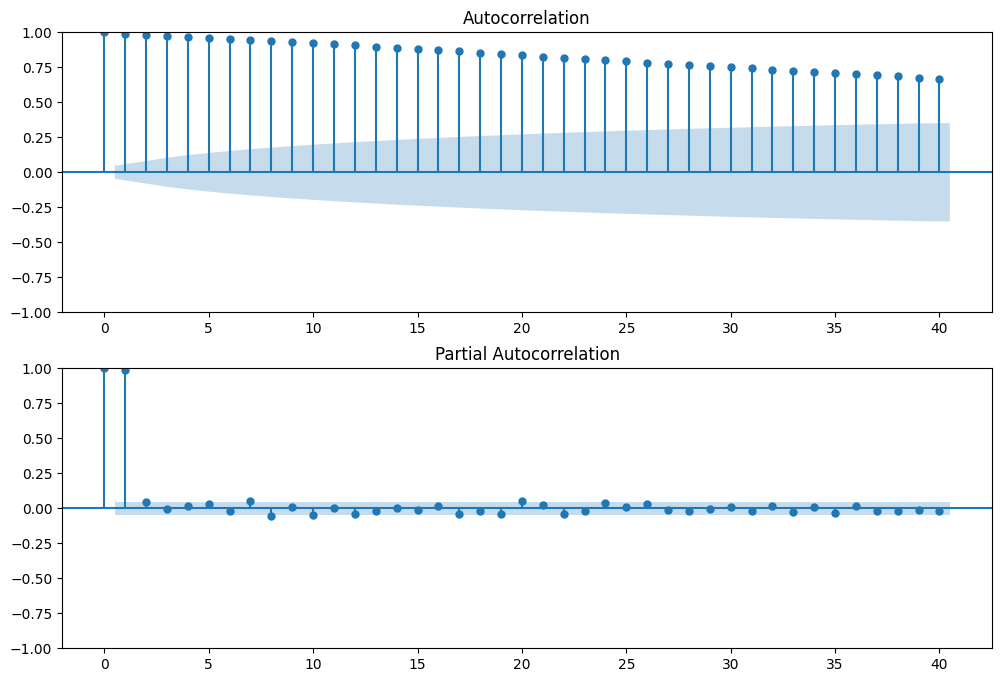

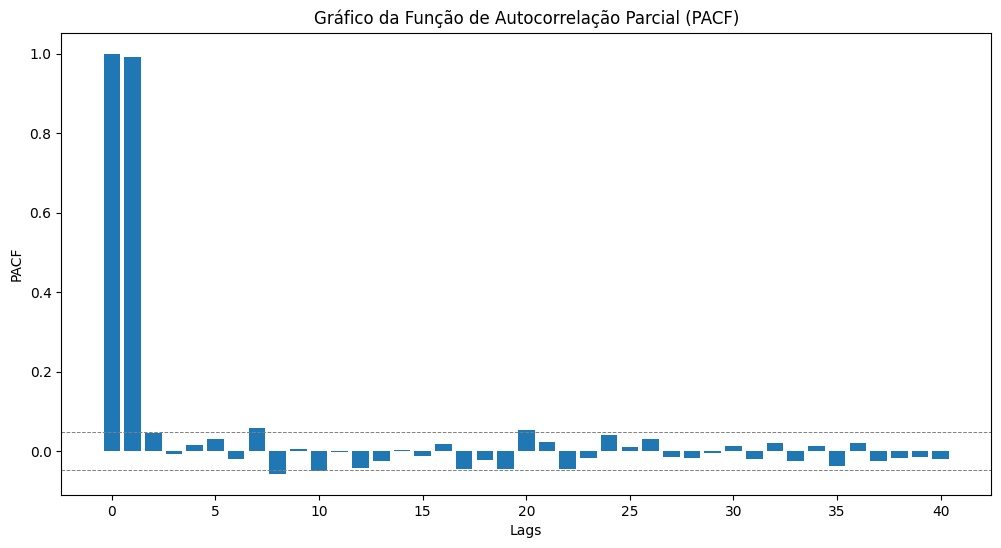

NotImplementedError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Baixar as cotações do Yahoo Finance para o ativo ITUB4.SA
import yfinance as yf
itub = yf.download('ITUB4.SA', start='2016-07-01', end='2023-07-01')

# Extrair a coluna "Close" (preço de fechamento)
itub = itub[['Close']]

# Função para identificar a ordem de diferenciação (d)
def find_d_order(data):
    result = adfuller(data)
    d = 0
    while result[1] > 0.05:
        data = data.diff().dropna()
        d += 1
        result = adfuller(data)
    return d

d = find_d_order(itub['Close'])
print(f'Ordem de Diferenciação (d): {d}')

# Plotar ACF e PACF para identificar p e q
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(itub['Close'], lags=40, ax=ax1)
plot_pacf(itub['Close'], lags=40, ax=ax2)

# Calcule a PACF
pacf_values = sm.tsa.pacf(itub['Close'], nlags=40)

# Plotar o gráfico da PACF
plt.figure(figsize=(12, 6))
plt.bar(range(len(pacf_values)), pacf_values)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Gráfico da Função de Autocorrelação Parcial (PACF)')
plt.axhline(y=2/np.sqrt(len(itub['Close'])), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-2/np.sqrt(len(itub['Close'])), linestyle='--', color='gray', linewidth=0.7)

plt.show()

# Identificar a ordem autorregressiva (p) e de médias móveis (q)
p = 1  # Baseado no gráfico PACF
q = 1  # Baseado no gráfico ACF

# Ajustar o modelo ARIMA com a ordem determinada
model = ARIMA(itub['Close'], order=(p, d, q))
results = model.fit()

# Previsões com o modelo ARIMA
n_forecast = 252 * 3  # 252 dias úteis em um ano * 3 anos
forecast, stderr, conf_int = results.forecast(steps=n_forecast)

# Avaliação do modelo
mse = mean_squared_error(itub['Close'][-n_forecast:], forecast)
r2 = r2_score(itub['Close'][-n_forecast:], forecast)
print(f'Erro Quadrático Médio (MSE): {mse:.4f}')
print(f'Coeficiente de Determinação (R²): {r2:.4f}')


[*********************100%%**********************]  1 of 1 completed


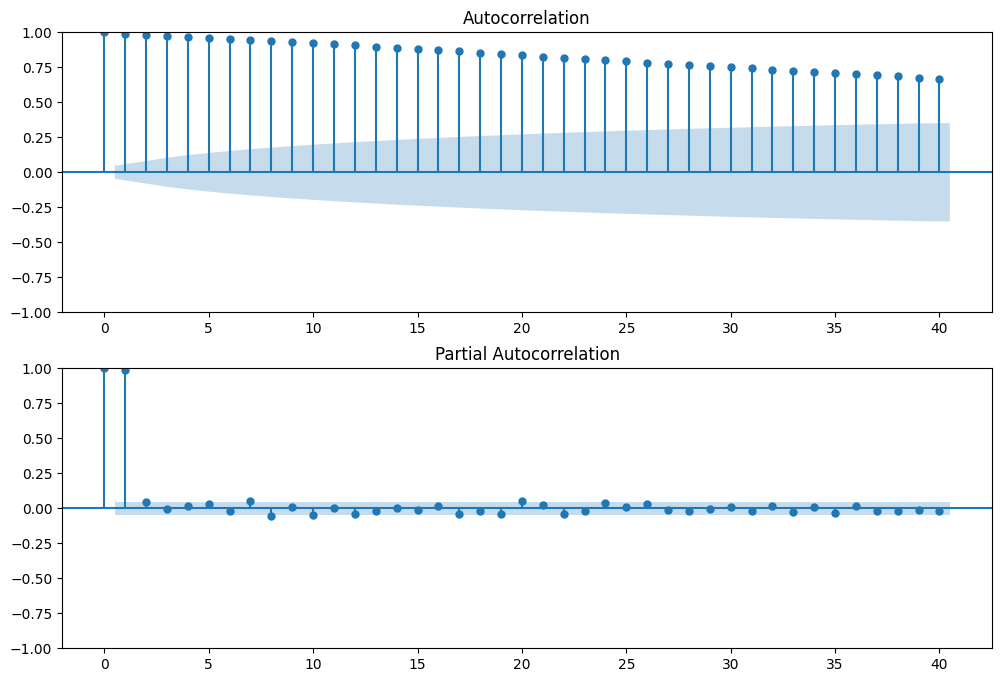

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

# Baixar as cotações do Yahoo Finance para o ativo ITUB4.SA
import yfinance as yf
itub = yf.download('ITUB4.SA', start='2016-07-01', end='2023-07-01')

# Extrair a coluna "Close" (preço de fechamento)
itub = itub[['Close']]

# Função para identificar a ordem de diferenciação (d)
#def find_d_order(data):
#    result = adfuller(data)
#    d = 0
#    while result[1] > 0.05:
#        data = data.diff().dropna()
#        d += 1
#        result = adfuller(data)
#    return d
d =1
Dd = find_d_order(itub['Close'])
print(f'Ordem de Diferenciação (d): {d}')

# Plotar ACF e PACF para identificar p, d e q
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(itub['Close'], lags=40, ax=ax1)
plot_pacf(itub['Close'], lags=40, ax=ax2)
plt.show()

# Identificar a ordem autorregressiva (p) e de médias móveis (q)
p = 1  # Baseado no gráfico PACF
d = 1  # Ordem de diferenciação (se necessário)
q = 1  # Baseado no gráfico ACF

# Identificar a ordem de sazonalidade (P, D, Q, s)
P = 1  # Ordem autorregressiva sazonal
D = 1  # Ordem de diferenciação sazonal
Q = 1  # Ordem de médias móveis sazonal
s = 252  # Período de sazonalidade (252 dias úteis em um ano)

# Ajustar o modelo SARIMA com a ordem determinada
model = SARIMAX(itub['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Previsões com o modelo SARIMA
n_forecast = 252 * 3  # 252 dias úteis em um ano * 3 anos
forecast = results.get_forecast(steps=n_forecast)

# Avaliação do modelo
mse = mean_squared_error(itub['Close'][-n_forecast:], forecast.predicted_mean)
r2 = r2_score(itub['Close'][-n_forecast:], forecast.predicted_mean)
print(f'Erro Quadrático Médio (MSE): {mse:.4f}')
print(f'Coeficiente de Determinação (R²): {r2:.4f}')



In [ ]:
import pandas as pd. #start='2000-12-21', end='2023-06-29' - '2018-10-29', end='2023-10-29
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

# Baixar as cotações do Yahoo Finance para o ativo ITUB4.SA
import yfinance as yf
itub = yf.download('ITUB4.SA', start='2018-10-29', end='2023-10-29')

# Extrair a coluna "Close" (preço de fechamento)
itub = itub[['Close']]

# Função para identificar a ordem de diferenciação (d)
def find_d_order(data):
    result = adfuller(data)
    d = 0
    while result[1] > 0.05:
        data = data.diff().dropna()
        d += 1
        result = adfuller(data)
    return d

d = find_d_order(itub['Close'])
print(f'Ordem de Diferenciação (d): {d}')

# Plotar ACF e PACF para identificar p, d e q
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(itub['Close'], lags=40, ax=ax1)
plot_pacf(itub['Close'], lags=40, ax=ax2)
plt.show()

# Identificar a ordem autorregressiva (p) e de médias móveis (q) com base no PACF
pacf_values = sm.tsa.pacf(itub['Close'], nlags=40)
significant_lag = np.argmax(np.abs(pacf_values) > 2/np.sqrt(len(itub['Close'])))

p = significant_lag  # Usando o atraso significativo

d = 1  # Ordem de diferenciação (se necessário)

q = 1  # Baseado no gráfico ACF

# Identificar a ordem de sazonalidade (P, D, Q, s)
P = 1  # Ordem autorregressiva sazonal
D = 1  # Ordem de diferenciação sazonal
Q = 1  # Ordem de médias móveis sazonal
s = 252  # Período de sazonalidade (252 dias úteis em um ano)

# Ajustar o modelo SARIMA com a ordem determinada
#model = SARIMAX(itub['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
#results = model.fit()

# Previsões com o modelo SARIMA
n_forecast = 252 * 3  # 252 dias úteis em um ano * 3 anos
forecast = results.get_forecast(steps=n_forecast)

# Avaliação do modelo
mse = mean_squared_error(itub['Close'][-n_forecast:], forecast.predicted_mean)
r2 = r2_score(itub['Close'][-n_forecast:], forecast.predicted_mean)
print(f'Erro Quadrático Médio (MSE): {mse:.4f}')
print(f'Coeficiente de Determinação (R²): {r2:.4f}')


In [ ]:
##1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

# Baixar as cotações do Yahoo Finance para o ativo ITUB4.SA
import yfinance as yf
itub = yf.download('ITUB4.SA', start='2016-07-01', end='2023-07-01')

# Extrair a coluna "Close" (preço de fechamento)
itub = itub[['Close']]

# Função para identificar a ordem de diferenciação (d)
def find_d_order(data):
    result = adfuller(data)
    d = 0
    while result[1] > 0.05:
        data = data.diff().dropna()
        d += 1
        result = adfuller(data)
    return d

d = find_d_order(itub['Close'])
print(f'Ordem de Diferenciação (d): {d}')

# Plotar ACF e PACF para identificar p e q
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(itub['Close'], lags=40, ax=ax1)
plot_pacf(itub['Close'], lags=40, ax=ax2)
plt.show()

# Identificar a ordem autorregressiva (p) e de médias móveis (q)
p = 1  # Baseado no gráfico PACF
q = 1  # Baseado no gráfico ACF

# Ajustar o modelo SARIMA com a ordem determinada
model = SARIMAX(itub['Close'], order=(p, d, q))
results = model.fit()

# Previsões com o modelo SARIMA
n_forecast = 252 * 3  # 252 dias úteis em um ano * 3 anos
forecast = results.get_forecast(steps=n_forecast)

# Avaliação do modelo
mse = mean_squared_error(itub['Close'][-n_forecast:], forecast.predicted_mean)
r2 = r2_score(itub['Close'][-n_forecast:], forecast.predicted_mean)
print(f'Erro Quadrático Médio (MSE): {mse:.4f}')
print(f'Coeficiente de Determinação (R²): {r2:.4f}')


# regressao linear

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2019-01-01")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Remover dados faltantes (NaN)
carteira = carteira.dropna()


# Plot dos dados
sns.set()
carteira.plot(subplots=True, figsize=(22, 9))


retornos = carteira.pct_change()[1:]
retornos

retornos.describe()



# Regressão Linear
X = carteira["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = carteira["IBOV"].values  # IBOV como variável dependente (y)

regressor = LinearRegression()
regressor.fit(X, y)

# Coeficientes da regressão
coef_angular = regressor.coef_[0]
coef_linear = regressor.intercept_

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dolar e IBOV\nCoeficiente Angular: {coef_angular:.4f}, Coeficiente Linear: {coef_linear:.4f}')
plt.xlabel('Dolar')
plt.ylabel('IBOV')
plt.show()

In [ ]:
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
  # Importando o YFinance e sobrescrevendo os métodos do pandas_datareader
import yfinance as yf
yf.pdr_override()
# Baixando as cotações do Yahoo Finance para o Índice Bovespa
ibov = web.get_data_yahoo('itub4.SA', start='2016-07-01', end='2023-07-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



# Extraia as datas e os valores de fechamento do DataFrame
dates = ibov['Date']
close_values = ibov['Close']

# Converta as datas em valores numéricos (dias desde a primeira data)
numeric_dates = (dates - dates.min()).dt.days

# Calcule a inclinação (coeficiente angular) e o intercepto da reta de regressão
slope, intercept = np.polyfit(numeric_dates, close_values, 1)

# Crie a função da reta
def linear_regression(date):
    # Converta a data para um valor numérico
    numeric_date = (date - dates.min()).days
    return slope * numeric_date + intercept

# Calcule os valores previstos usando a função da reta
predicted_values = [linear_regression(date) for date in dates]

# Calcule o erro quadrático médio (MSE)
mse = mean_squared_error(close_values, predicted_values)

# Calcule o coeficiente de determinação (R²)
r2 = r2_score(close_values, predicted_values)

# Exiba o erro quadrático médio (MSE) e o coeficiente de determinação (R²)
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# Crie um gráfico de dispersão dos dados originais e a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(dates, close_values, label="Dados Originais", alpha=0.5)
plt.plot(dates, predicted_values, color='red', label="Reta de Regressão")

# Adicione rótulos aos eixos
plt.xlabel("Data")
plt.ylabel("Fechamento")

# Adicione uma legenda
plt.legend()

# Exiba o gráfico de dispersão
plt.show()

# Calcule os resíduos
residuos = close_values - predicted_values

# Crie um gráfico de dispersão dos resíduos
plt.figure(figsize=(10, 4))
plt.scatter(dates, residuos, label="Resíduos", alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--', label="Linha de Zero Resíduo")

# Adicione rótulos aos eixos
plt.xlabel("Data")
plt.ylabel("Resíduos")




KeyError: ignored

In [ ]:
# Exiba a equação da reta
print(f"Equação da reta: y = {slope:.4f}x + {intercept:.4f}")

NameError: ignored

# Nova seção

In [ ]:
import numpy as np
import os
import sys
import time
import pandas as pd
import pickle
import logging
from tqdm._tqdm_notebook import tqdm_notebook
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<ipython-input-12-af9d45ca9bab>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


In [ ]:
#bibliotecas
!pip install pandoc
import pandoc

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33261 sha256=8742f20696b8f2b6dcda9d1b421cd080445d7547a4e009b857af6f381324c5ab
  Stored in directory: /root/.cache/pip/wheels/76/27/c2/c26175310aadcb8741b77657a1bb49c50cc7d4cdbf9eee0005
Successfully built pandoc


In [ ]:
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web


In [ ]:
  # Importando o YFinance e sobrescrevendo os métodos do pandas_datareader
import yfinance as yf
yf.pdr_override()

In [ ]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa
ibov = web.get_data_yahoo('itub4.SA', start='2016-07-01', end='2023-07-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ibov.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2016-07-01  18.430304  18.781818  18.181818  18.733334  13.689623  32739135
2016-07-04  18.836363  18.921211  18.612122  18.721212  13.680764   6073980
2016-07-05  18.545454  18.690908  18.424242  18.587877  13.583333  11628705
2016-07-06  18.424242  18.715151  18.212120  18.660606  13.636491  12469215
2016-07-07  18.757574  19.121212  18.545454  18.848484  13.773770  15292530

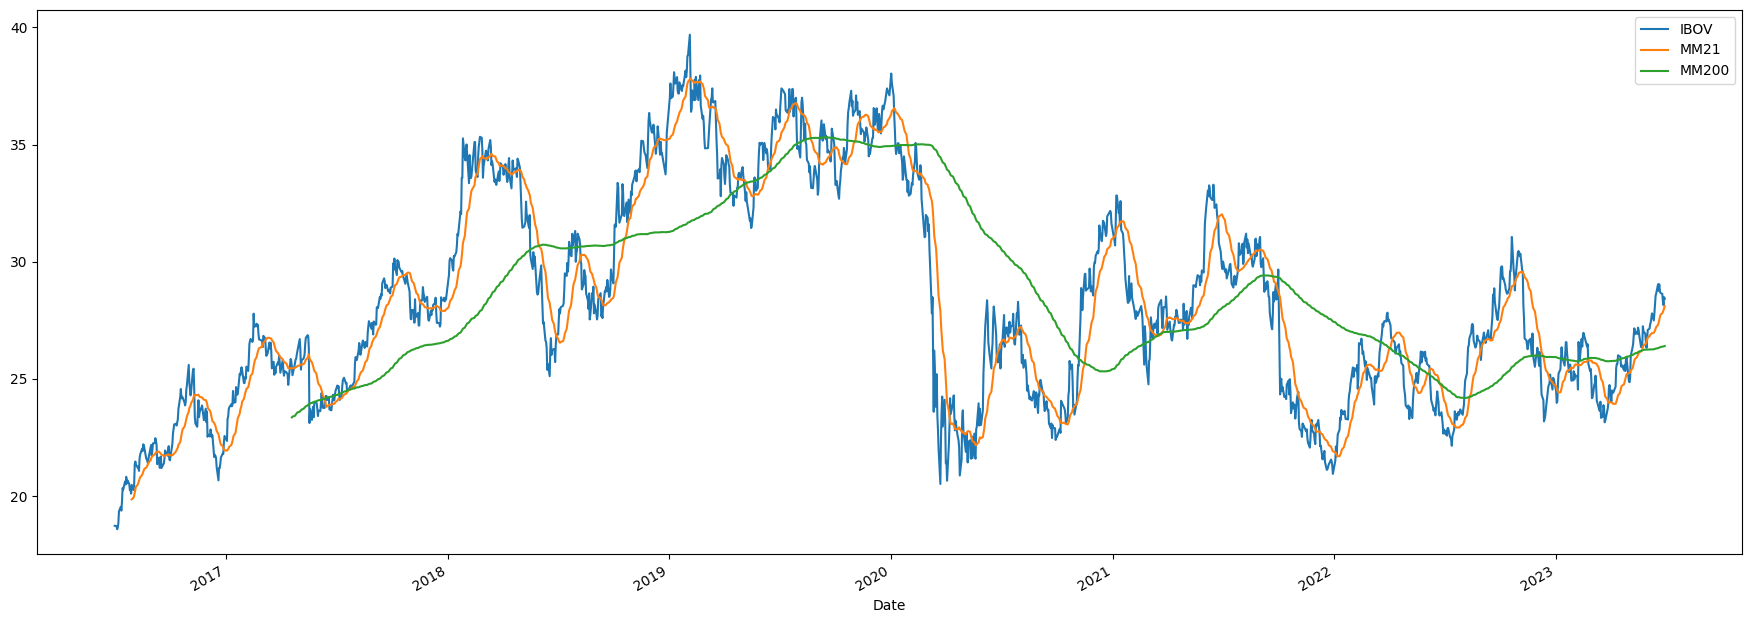

In [ ]:
ibov["Close"].plot(figsize=(22,8), label="IBOV")
#  aplica uma função de janela deslizante. calculada uma média móvel 21 dias. Isso significa que para cada ponto no conjunto de dados, é considerada uma janela de 21 dias (incluindo o ponto atual e os 20 dias anteriores)
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [ ]:
ibov.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

In [ ]:
df_train, df_test = train_test_split(ibov,
                                     train_size=0.8,
                                     test_size=0.2,
                                     shuffle=False)
print("Train--Test size", len(df_train), len(df_test))

Train--Test size 1394 349


In [ ]:
train_cols = ["Open", "High", "Low", "Close", "Volume"]
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
params = {
"batch_size": 20,
"epochs": 60,
"lr": 0.00010000,
"time_steps": 15
}
TIME_STEPS = params["time_steps"]
BATCH_SIZE = params["batch_size"]
def trim_dataset(mat, batch_size):
    no_of_rows_drop = mat.shape[0]%batch_size
    if no_of_rows_drop > 0:
        return mat[:-no_of_rows_drop]
    else:
        return mat
def build_timeseries(mat, y_col_index):
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    return x, y
x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
print("Train size", x_t.shape, y_t.shape)
x_temp, y_temp = build_timeseries(x_test, 3)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)
print("Test size", x_test_t.shape, y_test_t.shape, x_val.shape, y_val.shape)


  0%|          | 0/1379 [00:00<?, ?it/s]

Train size (1360, 15, 5) (1360,)


  0%|          | 0/334 [00:00<?, ?it/s]

Test size (160, 15, 5) (160,) (160, 15, 5) (160,)


In [ ]:
def create_model():
    lstm_model = Sequential()
    lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]),
                        dropout=0.0,
                        recurrent_dropout=0.0,
                        stateful=True,
                        kernel_initializer='random_uniform'))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(20,activation='relu'))
    lstm_model.add(Dense(1,activation='sigmoid'))
    optimizer = optimizers.RMSprop(lr=params["lr"])
    lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)
    return lstm_model
print("Building model...")
model = create_model()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                       patience=40, min_delta=0.0001)

history = model.fit(x_t, y_t, epochs=params["epochs"], verbose=2, batch_size=BATCH_SIZE,
                        shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                        trim_dataset(y_val, BATCH_SIZE)), callbacks=[es])


Building model...


Epoch 1/60
68/68 - 4s - loss: 0.0299 - val_loss: 0.0125 - 4s/epoch - 54ms/step
Epoch 2/60
68/68 - 1s - loss: 0.0175 - val_loss: 0.0092 - 713ms/epoch - 10ms/step
Epoch 3/60
68/68 - 1s - loss: 0.0094 - val_loss: 0.0147 - 687ms/epoch - 10ms/step
Epoch 4/60
68/68 - 1s - loss: 0.0063 - val_loss: 0.0130 - 880ms/epoch - 13ms/step
Epoch 5/60
68/68 - 1s - loss: 0.0056 - val_loss: 0.0090 - 992ms/epoch - 15ms/step
Epoch 6/60
68/68 - 1s - loss: 0.0052 - val_loss: 0.0090 - 989ms/epoch - 15ms/step
Epoch 7/60
68/68 - 1s - loss: 0.0048 - val_loss: 0.0071 - 786ms/epoch - 12ms/step
Epoch 8/60
68/68 - 1s - loss: 0.0045 - val_loss: 0.0062 - 659ms/epoch - 10ms/step
Epoch 9/60
68/68 - 1s - loss: 0.0040 - val_loss: 0.0059 - 673ms/epoch - 10ms/step
Epoch 10/60
68/68 - 1s - loss: 0.0038 - val_loss: 0.0049 - 659ms/epoch - 10ms/step
Epoch 11/60
68/68 - 1s - loss: 0.0032 - val_loss: 0.0059 - 645ms/epoch - 9ms/step
Epoch 12/60
68/68 - 1s - loss: 0.0034 - val_loss: 0.0047 - 682ms/epoch - 10ms/step
Epoch 13/60
68/68

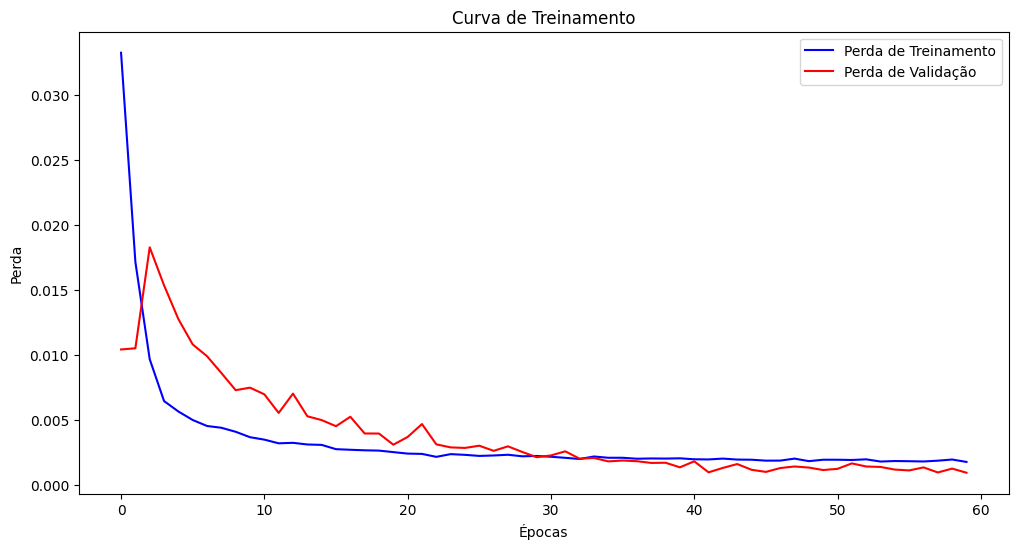

In [ ]:
import matplotlib.pyplot as plt

# O treinamento do modelo já foi concluído e você possui o histórico em "history"
# Certifique-se de que a variável "history" esteja definida após o treinamento

# Exibir a perda de treinamento e validação ao longo das épocas
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda de Treinamento', color='blue')
plt.plot(history.history['val_loss'], label='Perda de Validação', color='red')
plt.title('Curva de Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


In [ ]:
#Testando o modelo
y_pred = model.predict(trim_dataset(x_test_t, BATCH_SIZE), batch_size=BATCH_SIZE)
y_pred = y_pred.flatten()
y_test_t = trim_dataset(y_test_t, BATCH_SIZE)
error = mean_squared_error(y_test_t, y_pred)
print("Error is: ", error, y_pred.shape, y_test_t.shape)
print(y_pred[0:15])
print(y_test_t[0:15])

8/8 [==============================] - 0s 7ms/step
Error is:  0.001471359650715998 (160,) (160,)
[0.46700412 0.48160824 0.4940408  0.5236417  0.5225745  0.51045334
 0.47799328 0.47061515 0.47378352 0.48025486 0.515084   0.51594657
 0.52817774 0.5107666  0.4914699 ]
[0.5218491  0.54364782 0.59103642 0.5242185  0.51284524 0.48299047
 0.50810637 0.51900581 0.55975995 0.56260324 0.55217778 0.55739055
 0.52469239 0.52042741 0.4531356 ]


In [ ]:
y_pred_org = (y_pred * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]
y_test_t_org = (y_test_t * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]
print(y_pred_org[0:15])
print(y_test_t_org[0:15])

[28.442654 28.750832 29.013186 29.637829 29.615307 29.359526 28.67455
 28.518856 28.585714 28.722275 29.457243 29.475445 29.733547 29.366137
 28.958935]
[29.60000038 30.05999947 31.05999947 29.64999962 29.40999985 28.78000069
 29.30999947 29.54000092 30.39999962 30.45999908 30.23999977 30.35000038
 29.65999985 29.56999969 28.14999962]


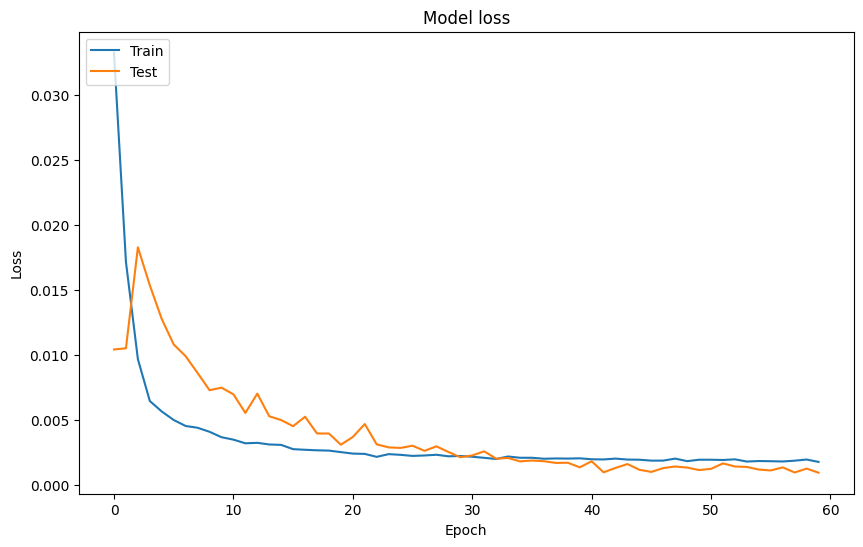

In [ ]:
# Visualize the training data
#if model is None:
 #   from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

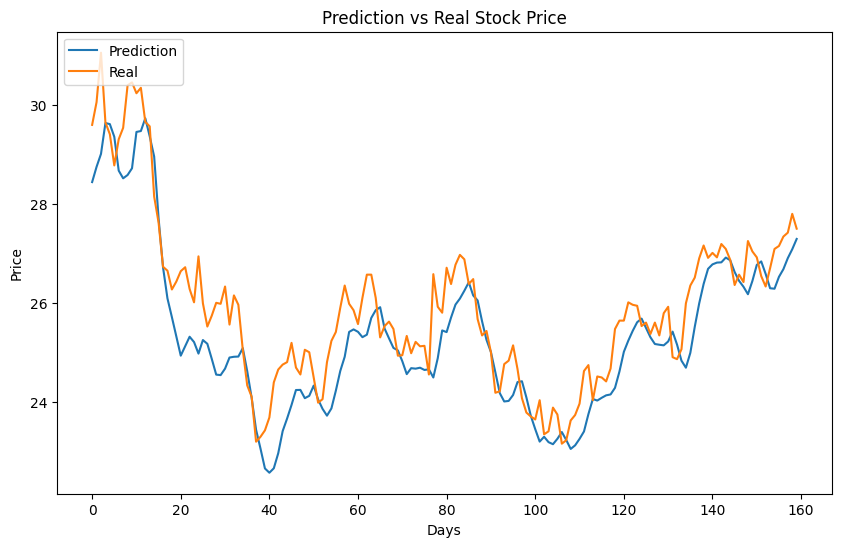

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_pred_org)
plt.plot(y_test_t_org)
plt.title('Prediction vs Real Stock Price')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

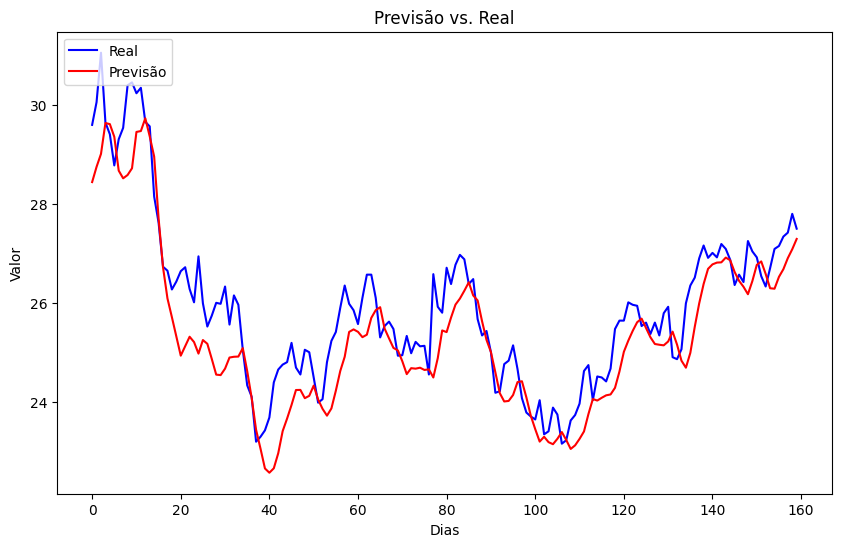

In [ ]:
from matplotlib import pyplot as plt

# Certifique-se de que as variáveis "y_pred_org" e "y_test_t_org" contenham as previsões e os valores reais correspondentes

plt.figure(figsize=(10, 6))
plt.plot(y_test_t_org, label='Real', color='blue')
plt.plot(y_pred_org, label='Previsão', color='red')

plt.title('Previsão vs. Real')
plt.ylabel('Valor')
plt.xlabel('Dias')
plt.legend(loc='upper left')
plt.show()


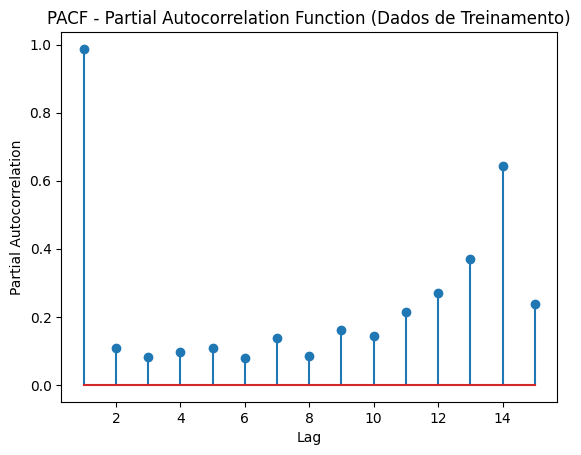

In [ ]:
from statsmodels.tsa.stattools import pacf

# Defina o número de atrasos (lags) para a PACF
num_lags = 15

# Calcula a PACF dos dados de treinamento
pacf_values = pacf(x_t[:, :, 3].flatten(), nlags=num_lags)

# Plote o gráfico da PACF
plt.stem(range(1, num_lags + 1), pacf_values[1:])
plt.title('PACF - Partial Autocorrelation Function (Dados de Treinamento)')
plt.xlabel('Lag')#atraso
plt.ylabel('Partial Autocorrelation')
plt.show()


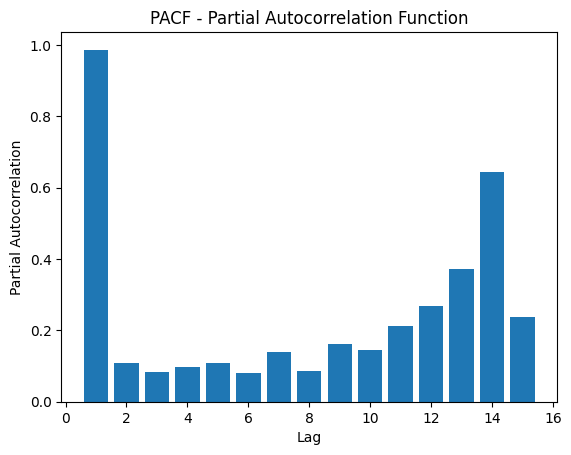

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defina o número de atrasos (lags) para a PACF
num_lags = 5 # para ver o inicio

# Calcula a PACF dos dados de treinamento (coluna "Close")
x_t_close = x_t[:, :, 3].flatten()

# Calcula a PACF
pacf_values = sm.tsa.stattools.pacf(x_t_close, nlags=num_lags)

# Crie um gráfico da PACF em relação aos atrasos
plt.bar(range(1, num_lags + 1), pacf_values[1:])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF - Partial Autocorrelation Function')
plt.show()


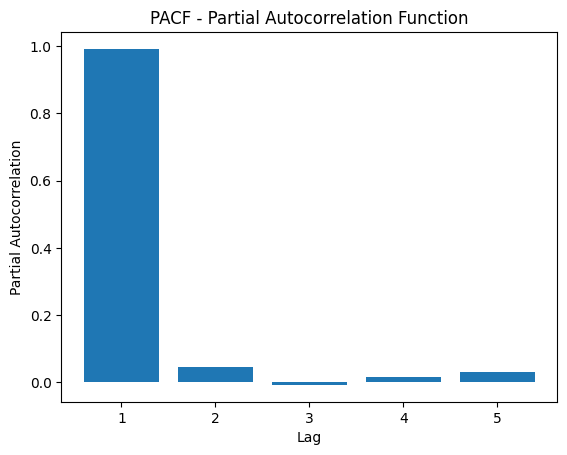

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Calcule a PACF
pacf_values = sm.tsa.stattools.pacf(close_prices, nlags=5)

# Crie um gráfico da PACF em relação aos atrasos
plt.bar(range(1, len(pacf_values)), pacf_values[1:])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF - Partial Autocorrelation Function')
plt.show()


<Figure size 1000x600 with 0 Axes>

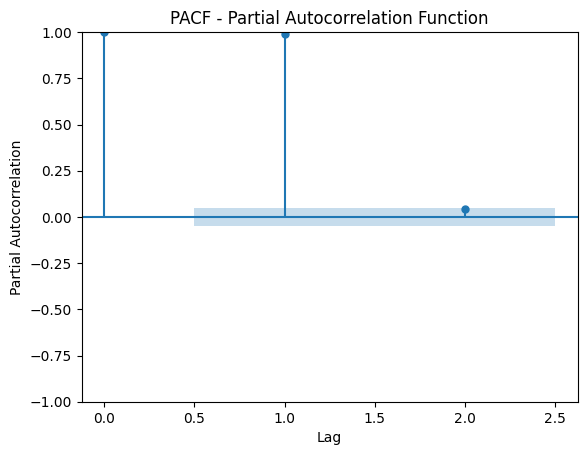

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Calcule a PACF
pacf_values = sm.tsa.stattools.pacf(close_prices, nlags=15)

# Crie um gráfico da PACF em relação aos atrasos
plt.figure(figsize=(10, 6))
plot_pacf(close_prices, lags=2, title='PACF - Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()



In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Calcule a PACF
pacf_values = sm.tsa.stattools.pacf(close_prices, nlags=2)

# Ajuste o modelo AR(2) usando o método dos mínimos quadrados
Xt_1 = close_prices.shift(1)
Xt_2 = close_prices.shift(2)
X = sm.add_constant(pd.DataFrame({'Xt_1': Xt_1, 'Xt_2': Xt_2}).dropna())
Y = close_prices[2:]
model = sm.OLS(Y, X).fit()

# Parâmetros estimados φ0, φ1 e φ2
phi0 = model.params['const']
phi1 = model.params['Xt_1']
phi2 = model.params['Xt_2']

print(f"φ0: {phi0}, φ1: {phi1}, φ2: {phi2}")


φ0: 0.24630058594726859, φ1: 0.9408490381643613, φ2: 0.05062990913145606


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Calcule a PACF
pacf_values = sm.tsa.stattools.pacf(close_prices, nlags=15)

# Ajuste o modelo AR(2) usando o método dos mínimos quadrados
Xt_1 = close_prices.shift(1)
Xt_2 = close_prices.shift(2)
X = sm.add_constant(pd.DataFrame({'Xt_1': Xt_1, 'Xt_2': Xt_2}).dropna())
Y = close_prices[2:]
model = sm.OLS(Y, X).fit()

# Parâmetros estimados φ0, φ1 e φ2
phi0 = model.params['const']
phi1 = model.params['Xt_1']
phi2 = model.params['Xt_2']

print(f"φ0: {phi0}, φ1: {phi1}, φ2: {phi2}")


φ0: 0.24630058594726859, φ1: 0.9408490381643613, φ2: 0.05062990913145606


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Encontre os parâmetros para AR(3) até AR(7) usando o método dos mínimos quadrados
for p in range(3, 8):
    Y = close_prices[p:]
    X = sm.add_constant(pd.DataFrame({'Xt_{}'.format(i): close_prices.shift(i) for i in range(1, p + 1)}).dropna())
    model = sm.OLS(Y, X).fit()

    # Parâmetros estimados φ0, φ1, φ2, ..., φp
    phi0 = model.params['const']
    phis = [model.params['Xt_{}'.format(i)] for i in range(1, p + 1)]

    print(f"AR({p}) - φ0: {phi0}, φ1-{p}: {phis}")


AR(3) - φ0: 0.2487507487502765, φ1-3: [0.9410133710817932, 0.05444965618148101, -0.004067227828467246]
AR(4) - φ0: 0.2462477888488328, φ1-4: [0.941072050856368, 0.0535409834394929, -0.019899299425915874, 0.01677465511752518]
AR(5) - φ0: 0.24056290033910868, φ1-5: [0.940556032972094, 0.0542016637666913, -0.02158301043057525, -0.012369934177007389, 0.030889585146183677]
AR(6) - φ0: 0.24137144484358683, φ1-6: [0.9413806159034024, 0.053937748516224945, -0.022054567958577284, -0.010859948741717822, 0.05861259644756055, -0.029366132153640687]
AR(7) - φ0: 0.2310742478596195, φ1-7: [0.9430250950509645, 0.05052656305390091, -0.02138562783580955, -0.009483388755000322, 0.055368987036439776, -0.08551895812901089, 0.059492864414891156]


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Encontre os modelos AR(3) até AR(7) e calcule a MSE para cada modelo
for p in range(2, 10):
    Y = close_prices[p:]
    X = sm.add_constant(pd.DataFrame({'Xt_{}'.format(i): close_prices.shift(i) for i in range(1, p + 1)}).dropna())
    model = sm.OLS(Y, X).fit()

    # Parâmetros estimados φ0, φ1, φ2, ..., φp
    phi0 = model.params['const']
    phis = [model.params['Xt_{}'.format(i)] for i in range(1, p + 1)]

    # Previsões com o modelo
    predictions = model.predict(X)

    # Calcula a MSE
    mse = mean_squared_error(Y, predictions)

    print(f"AR({p}) - φ0: {phi0}, φ1-{p}: {phis}, MSE: {mse}")


AR(2) - φ0: 0.24630058594726859, φ1-2: [0.9408490381643613, 0.05062990913145606], MSE: 0.3063355123713418
AR(3) - φ0: 0.2487507487502765, φ1-3: [0.9410133710817932, 0.05444965618148101, -0.004067227828467246], MSE: 0.30647839770218094
AR(4) - φ0: 0.2462477888488328, φ1-4: [0.941072050856368, 0.0535409834394929, -0.019899299425915874, 0.01677465511752518], MSE: 0.30656784199554626
AR(5) - φ0: 0.24056290033910868, φ1-5: [0.940556032972094, 0.0542016637666913, -0.02158301043057525, -0.012369934177007389, 0.030889585146183677], MSE: 0.3064446269708211
AR(6) - φ0: 0.24137144484358683, φ1-6: [0.9413806159034024, 0.053937748516224945, -0.022054567958577284, -0.010859948741717822, 0.05861259644756055, -0.029366132153640687], MSE: 0.30624845101228604
AR(7) - φ0: 0.2310742478596195, φ1-7: [0.9430250950509645, 0.05052656305390091, -0.02138562783580955, -0.009483388755000322, 0.055368987036439776, -0.08551895812901089, 0.059492864414891156], MSE: 0.3053276659642311
AR(8) - φ0: 0.24092977834369275,

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Defina a ordem do modelo AR(2)
p = 2

# Ajuste o modelo AR(2)
Y = close_prices[p:]
X = sm.add_constant(pd.DataFrame({'Xt_{}'.format(i): close_prices.shift(i) for i in range(1, p + 1)}).dropna())
model = sm.OLS(Y, X).fit()

# Parâmetros estimados φ0, φ1 e φ2
phi0 = model.params['const']
phis = [model.params['Xt_{}'.format(i)] for i in range(1, p + 1)]

print(f"AR({p}) - φ0: {phi0}, φ1-{p}: {phis}")

# Previsão com o modelo AR(2)
last_observation = close_prices[-1]
second_last_observation = close_prices[-2]

# Faça a previsão para o próximo período
forecast = phi0 + phis[0] * last_observation + phis[1] * second_last_observation

print(f"Previsão para o próximo período: {forecast}")


AR(2) - φ0: 0.24630058594726859, φ1-2: [0.9408490381643613, 0.05062990913145606]
Previsão para o próximo período: 28.427676421926414


AR(2) - φ0: 0.24630058594726859, φ1-2: [0.9408490381643613, 0.05062990913145606]
Previsão para o próximo período: 28.427676421926414


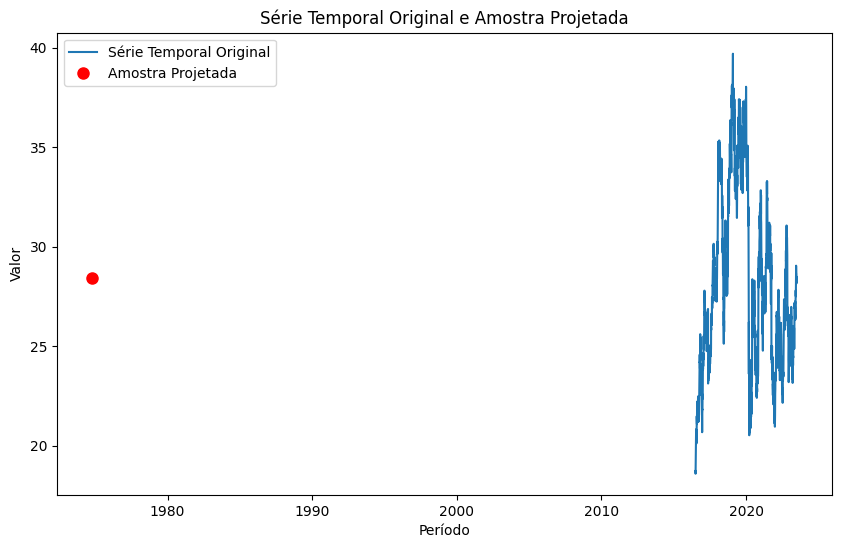

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Defina a ordem do modelo AR(2)
p = 2

# Ajuste o modelo AR(2)
Y = close_prices[p:]
X = sm.add_constant(pd.DataFrame({'Xt_{}'.format(i): close_prices.shift(i) for i in range(1, p + 1)}).dropna())
model = sm.OLS(Y, X).fit()

# Parâmetros estimados φ0, φ1 e φ2
phi0 = model.params['const']
phis = [model.params['Xt_{}'.format(i)] for i in range(1, p + 1)]

print(f"AR({p}) - φ0: {phi0}, φ1-{p}: {phis}")

# Previsão com o modelo AR(2)
last_observation = close_prices[-1]
second_last_observation = close_prices[-2]

# Faça a previsão para o próximo período
forecast = phi0 + phis[0] * last_observation + phis[1] * second_last_observation

print(f"Previsão para o próximo período: {forecast}")

# Plot da série temporal original e da amostra projetada
plt.figure(figsize=(10, 6))
plt.plot(close_prices, label="Série Temporal Original")
plt.plot(len(close_prices), forecast, 'ro', label="Amostra Projetada", markersize=8)
plt.title('Série Temporal Original e Amostra Projetada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Defina a ordem do modelo AR(p)
p = 2

# Divida os dados em uma base de treinamento e uma base de teste
train_data, test_data = train_test_split(close_prices, test_size=0.2, shuffle=False)

# Ajuste o modelo AR(p) aos dados de treinamento
Y = train_data[p:]
X = sm.add_constant(pd.DataFrame({'Xt_{}'.format(i): train_data.shift(i) for i in range(1, p + 1)}).dropna())
model = sm.OLS(Y, X).fit()

# Parâmetros estimados φ0, φ1 e φ2
phi0 = model.params['const']
phis = [model.params['Xt_{}'.format(i)] for i in range(1, p + 1)]

print(f"AR({p}) - φ0: {phi0}, φ1-{p}: {phis}")

# Previsão com o modelo AR(p) na base de teste
last_observation = train_data[-1]
second_last_observation = train_data[-2]
forecast = []
for i in range(len(test_data)):
    predicted_value = phi0 + phis[0] * last_observation + phis[1] * second_last_observation
    forecast.append(predicted_value)
    last_observation = predicted_value
    second_last_observation = last_observation

# Calcule o MSE na base de teste
mse = mean_squared_error(test_data, forecast)

print(f"MSE na base de teste: {mse}")


AR(2) - φ0: 0.24681988586990133, φ1-2: [0.9281060127586006, 0.06350451001883362]
MSE na base de teste: 8.773432371288116


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Suponha que você tenha um DataFrame pandas chamado "data" com sua série temporal na coluna "Close"
# Substitua isso pelos seus próprios dados

# Selecione a coluna "Close" dos seus dados
close_prices = ibov['Close']

# Defina a ordem máxima do modelo AR
max_p = 11

# Divida os dados em uma base de treinamento e uma base de teste
train_data, test_data = train_test_split(close_prices, test_size=0.2, shuffle=False)

mse_results = {}  # Dicionário para armazenar os resultados do MSE para cada ordem AR

for p in range(3, max_p + 1):
    # Ajuste o modelo AR(p) aos dados de treinamento
    Y = train_data[p:]
    X = sm.add_constant(pd.DataFrame({'Xt_{}'.format(i): train_data.shift(i) for i in range(1, p + 1)}).dropna())
    model = sm.OLS(Y, X).fit()

    # Parâmetros estimados φ0, φ1, φ2, ..., φp
    phi0 = model.params['const']
    phis = [model.params['Xt_{}'.format(i)] for i in range(1, p + 1)]

    # Previsão com o modelo AR(p) na base de teste
    last_observation = train_data[-1]
    second_last_observation = train_data[-2]
    forecast = []
    for i in range(len(test_data)):
        predicted_value = phi0
        for j in range(p):
            predicted_value += phis[j] * last_observation
            last_observation = train_data[i + j]
        forecast.append(predicted_value)

    # Calcule o MSE na base de teste
    mse = mean_squared_error(test_data, forecast)

    mse_results[f'AR({p})'] = mse

for order, mse in mse_results.items():
    print(f"{order} - MSE na base de teste: {mse}")


AR(3) - MSE na base de teste: 7.707215517078385
AR(4) - MSE na base de teste: 7.581531571300828
AR(5) - MSE na base de teste: 7.462749269787879
AR(6) - MSE na base de teste: 7.3500948849536885
AR(7) - MSE na base de teste: 7.285065015635994
AR(8) - MSE na base de teste: 7.187968518790114
AR(9) - MSE na base de teste: 7.106191834586922
AR(10) - MSE na base de teste: 7.051956469210462
AR(11) - MSE na base de teste: 7.039412367993365


In [ ]:
import numpy as np

# Dados de treinamento
# Substitua esta lista pelos seus próprios dados


# Ordem do modelo AR(2)
p = 2

# Número de observações
n = len(ibov)

# Inicialize as matrizes X e Y
X = np.zeros((n - p, p))
Y = np.zeros((n - p, 1))

# Preencha as matrizes X e Y com os dados
#for i in range(p, n):
#    Y[i - p] = ibov[i]
#    for j in range(1, p + 1):
#        X[i - p, j - 1] = ibov[i - j]
p=2
# Ajuste o modelo usando o método dos mínimos quadrados
beta = np.linalg.inv(X.T @ X) @ X.T @ Y

# Parâmetros estimados φ0, φ1 e φ2
phi0, phi1, phi2 = beta

# Calcule os valores previstos
valores_previstos = X @ beta

# Calcule o erro quadrático médio (MSE)
erro_quadratico = (Y - valores_previstos)
mse = np.mean(erro_quadratico ** 2)

print("Parâmetros estimados:")
print(f"φ0: {phi0}")
print(f"φ1: {phi1}")
print(f"φ2: {phi2}")
print(f"Erro Quadrático Médio (MSE): {mse}")


LinAlgError: ignored

In [ ]:
ibov_close = ibov['Close']

In [ ]:
import numpy as np
import statsmodels.api as sm

# Substitua pelos seus próprios dados do Índice Bovespa (IBOV)
 # Insira os preços de fechamento do IBOV aqui

# Xt-1 e Xt-2 correspondentes aos preços de fechamento do IBOV
Xt_1 = ibov_close[1:-1]  # Xt-1 (excluindo o primeiro valor)
Xt_2 = ibov_close[:-2]   # Xt-2 (excluindo os dois primeiros valores)

# Xt correspondente aos preços de fechamento do IBOV
Xt = ibov_close[2:]  # Xt (excluindo os dois primeiros valores)

# Crie uma matriz de recursos com Xt-1 e Xt-2
X = sm.add_constant(list(zip(Xt_1, Xt_2)))[1:]  # Xt-1 e Xt-2 com constante

# Ajuste o modelo usando o método dos mínimos quadrados
beta = np.linalg.inv(X.T @ X) @ X.T @ Xt

# Parâmetros estimados φ0, φ1 e φ2
phi0, phi1, phi2 = beta

print(f"φ0: {phi0}, φ1: {phi1}, φ2: {phi2}")


Exception: ignored

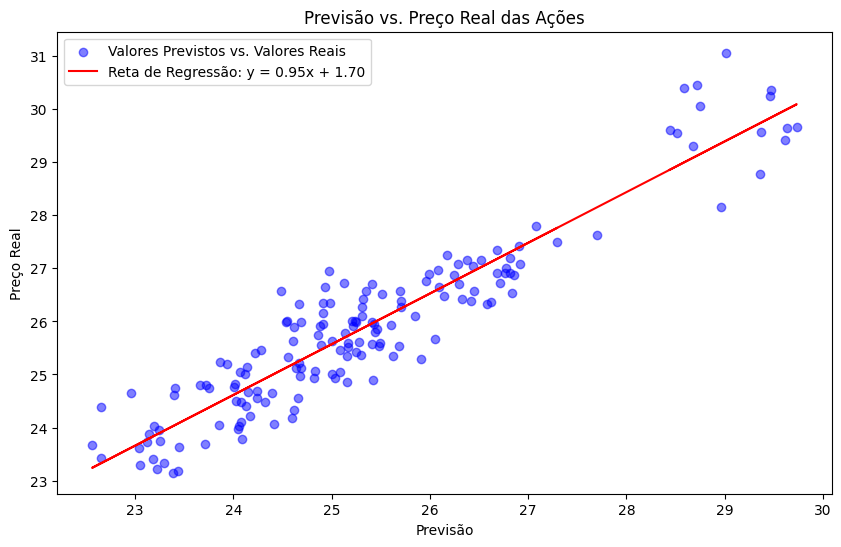

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Suponha que você tenha as séries de valores previstos (y_pred_org) e reais (y_test_t_org)

# Calcule a reta de regressão
coefficients = np.polyfit(y_pred_org, y_test_t_org, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Crie o gráfico de dispersão dos valores previstos e reais
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_org, y_test_t_org, label='Valores Previstos vs. Valores Reais', color='blue', alpha=0.5)

# Plote a reta de regressão
plt.plot(y_pred_org, slope * y_pred_org + intercept, color='red', label=f'Reta de Regressão: y = {slope:.2f}x + {intercept:.2f}')

plt.title('Previsão vs. Preço Real das Ações')
plt.xlabel('Previsão')
plt.ylabel('Preço Real')
plt.legend()
plt.show()


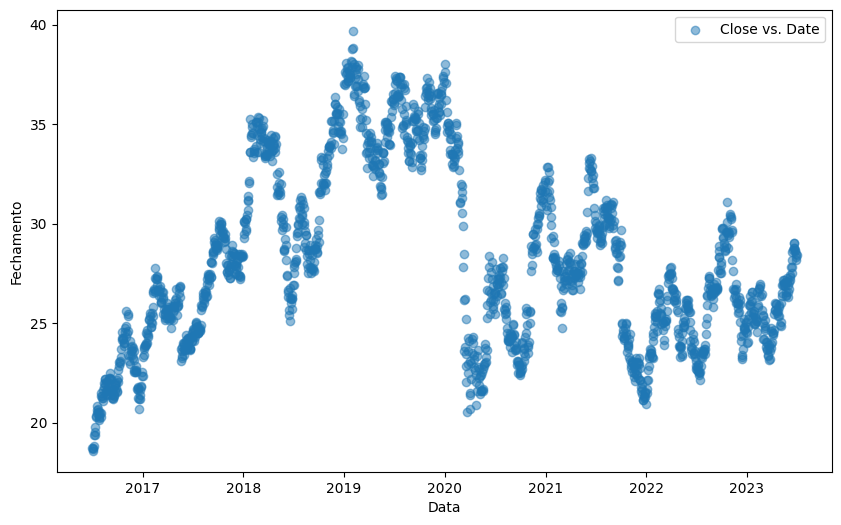

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado "seu_dataframe" com as colunas "Close" e um índice numérico
# Substitua "seu_dataframe" pelo nome correto do seu DataFrame

# Copie o índice atual para uma nova coluna "Date"
ibov['Date'] = ibov.index

# Crie um scatter plot usando a coluna "Date" e a coluna "Close"
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário
plt.scatter(ibov['Date'], ibov['Close'], label="Close vs. Date", alpha=0.5)

# Adicione rótulos aos eixos
plt.xlabel("Data")
plt.ylabel("Fechamento")

# Adicione uma legenda
plt.legend()

# Exiba o gráfico
plt.show()


Erro Quadrático Médio (MSE): 20.2572
Coeficiente de Determinação (R²): 0.0079


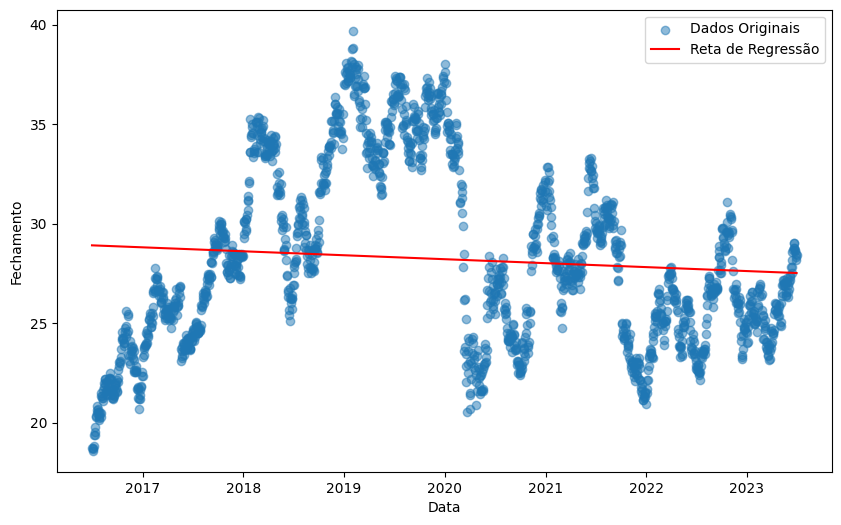

Text(0, 0.5, 'Resíduos')

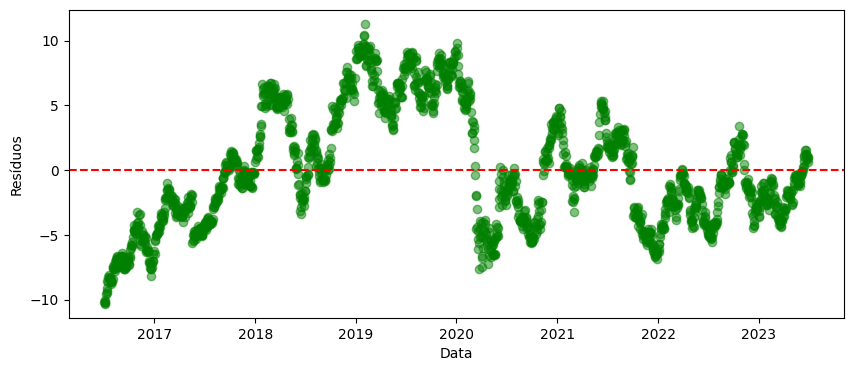

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



# Extraia as datas e os valores de fechamento do DataFrame
dates = ibov['Date']
close_values = ibov['Close']

# Converta as datas em valores numéricos (dias desde a primeira data)
numeric_dates = (dates - dates.min()).dt.days

# Calcule a inclinação (coeficiente angular) e o intercepto da reta de regressão
slope, intercept = np.polyfit(numeric_dates, close_values, 1)

# Crie a função da reta
def linear_regression(date):
    # Converta a data para um valor numérico
    numeric_date = (date - dates.min()).days
    return slope * numeric_date + intercept

# Calcule os valores previstos usando a função da reta
predicted_values = [linear_regression(date) for date in dates]

# Calcule o erro quadrático médio (MSE)
mse = mean_squared_error(close_values, predicted_values)

# Calcule o coeficiente de determinação (R²)
r2 = r2_score(close_values, predicted_values)

# Exiba o erro quadrático médio (MSE) e o coeficiente de determinação (R²)
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# Crie um gráfico de dispersão dos dados originais e a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(dates, close_values, label="Dados Originais", alpha=0.5)
plt.plot(dates, predicted_values, color='red', label="Reta de Regressão")

# Adicione rótulos aos eixos
plt.xlabel("Data")
plt.ylabel("Fechamento")

# Adicione uma legenda
plt.legend()

# Exiba o gráfico de dispersão
plt.show()

# Calcule os resíduos
residuos = close_values - predicted_values

# Crie um gráfico de dispersão dos resíduos
plt.figure(figsize=(10, 4))
plt.scatter(dates, residuos, label="Resíduos", alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--', label="Linha de Zero Resíduo")

# Adicione rótulos aos eixos
plt.xlabel("Data")
plt.ylabel("Resíduos")




In [ ]:
# Função para identificar a ordem de diferenciação (d)
def find_d_order(data):
    result = adfuller(data)
    d = 0
    while result[1] > 0.05:
        data = data.diff().dropna()
        d += 1
        result = adfuller(data)
    return d

d = find_d_order(itub['Close'])
print(f'Ordem de Diferenciação (d): {d}')

Ordem de Diferenciação (d): 1


In [ ]:

# Definir as listas de valores a serem testados para os parâmetros AR (p, d, q)
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

# Variáveis para armazenar os melhores resultados para AR
best_mse_ar = float('inf')
best_r2_ar = -float('inf')
best_params_ar = None
best_model_ar = None

In [ ]:

# Loop para testar diferentes combinações de parâmetros AR
for p in p_values:
    for d in d_values:
        for q in q_values:
            # Ajustar o modelo SARIMA com os parâmetros AR
            P = 0  # Defina o valor de P aqui
            D = 0  # Defina o valor de D aqui
            Q = 0  # Defina o valor de Q aqui
            s = 252  # Defina o valor de s aqui
            model = SARIMAX(itub['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
            results = model.fit()

            # Ajustar o valor de n_forecast para corresponder ao tamanho do conjunto de teste
            n_forecast = len(itub['Close'])

            # Previsões com o modelo SARIMA
            forecast = results.get_forecast(steps=n_forecast)

            # Avaliação do modelo AR (usando o MSE e R²)
            mse_ar = mean_squared_error(itub['Close'], forecast.predicted_mean)
            r2_ar = r2_score(itub['Close'], forecast.predicted_mean)

            # Verifica se este modelo AR tem um MSE e R² melhores
            if mse_ar < best_mse_ar:
                best_mse_ar = mse_ar
                best_r2_ar = r2_ar
                best_params_ar = (p, d, q)
                best_model_ar = model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

In [ ]:
# Imprimir os melhores resultados para AR e MA
print(f'Melhores parâmetros AR (p, d, q): {best_params_ar}')
print(f'Melhor Erro Quadrático Médio AR (MSE): {best_mse_ar:.4f}')
print(f'Melhor Coeficiente de Determinação AR (R²): {best_r2_ar:.4f}')

Melhores parâmetros AR (p, d, q): (0, 1, 2)
Melhor Erro Quadrático Médio AR (MSE): 22.5024
Melhor Coeficiente de Determinação AR (R²): -0.0928


[*********************100%%**********************]  1 of 1 completed


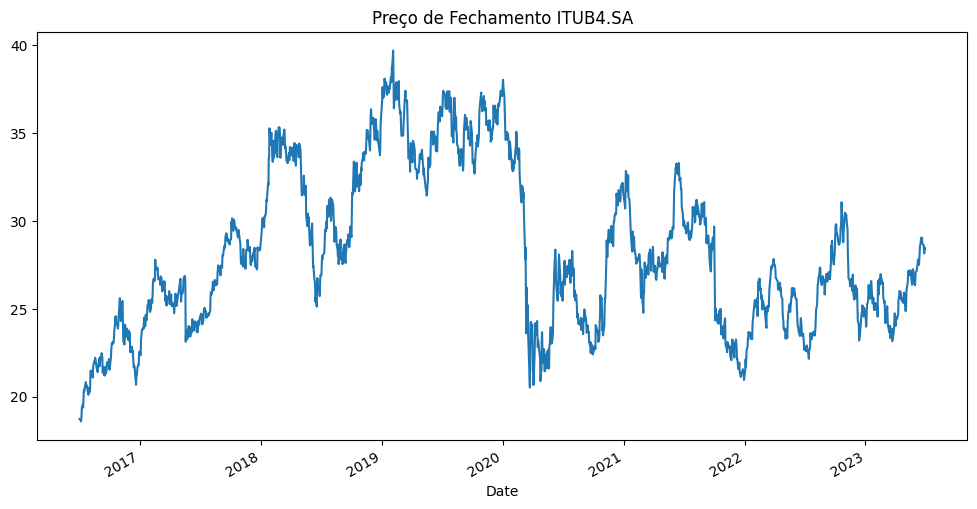

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1743
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1445.125
Date:                Sun, 29 Oct 2023   AIC                           2896.250
Time:                        23:49:21   BIC                           2912.639
Sample:                             0   HQIC                          2902.310
                               - 1743                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0540      0.017     -3.169      0.002      -0.087      -0.021
ma.L2          0.0014      0.018      0.080      0.937      -0.034       0.036
sigma2         0.3077      0.005     59.970      0.0

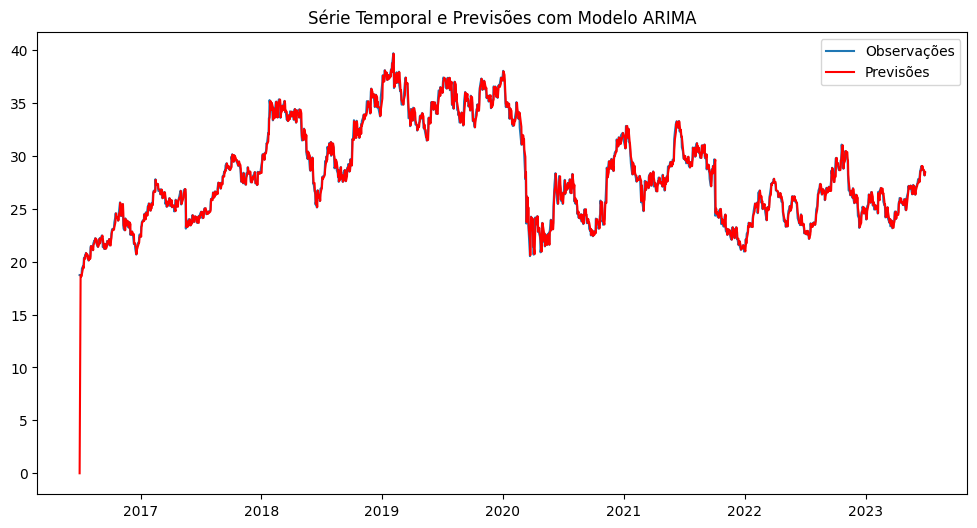

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Baixar as cotações do Yahoo Finance para o ativo ITUB4.SA
import yfinance as yf
itub = yf.download('ITUB4.SA', start='2016-07-01', end='2023-07-01')

# Extrair a coluna "Close" (preço de fechamento)
itub = itub[['Close']]

# Plotar os dados de fechamento
plt.figure(figsize=(12, 6))
itub['Close'].plot(title='Preço de Fechamento ITUB4.SA')
plt.show()

# Ajustar o modelo ARIMA
order = (0, 1, 2)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(itub['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar a série temporal original e as previsões
plt.figure(figsize=(12, 6))
plt.plot(itub.index, itub['Close'], label='Observações')
plt.plot(results.fittedvalues, color='red', label='Previsões')
plt.title('Série Temporal e Previsões com Modelo ARIMA')
plt.legend()
plt.show()


In [ ]:
# apenas para comparar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Baixar as cotações do Yahoo Finance para o ativo ITUB4.SA
import yfinance as yf
itub = yf.download('ITUB4.SA', start='2016-07-01', end='2023-07-01')

# Extrair a coluna "Close" (preço de fechamento)
itub = itub[['Close']]

# Plotar os dados de fechamento
plt.figure(figsize=(12, 6))
itub['Close'].plot(title='Preço de Fechamento ITUB4.SA')
plt.show()

# Ajustar o modelo ARIMA
order = (1, 1, 1)  # Ordem do modelo ARIMA
model = sm.tsa.ARIMA(itub['Close'], order=order)
results = model.fit()

# Resumo do modelo
print(results.summary())

# Plotar a série temporal original e as previsões
plt.figure(figsize=(12, 6))
plt.plot(itub.index, itub['Close'], label='Observações')
plt.plot(results.fittedvalues, color='red', label='Previsões')
plt.title('Série Temporal e Previsões com Modelo ARIMA')
plt.legend()
plt.show()
